In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None) 

In [2]:
data =  pd.read_csv('nike_dunk(model)_higt_low.csv' , index_col = 0)
df = data.copy()
df.head(3)

size   price        date                            product release_date  \
0   235  124000  2021-11-14  (W) Nike Dunk Low SE Primal Black   2021-11-07   
1   255  149000  2021-11-18  (W) Nike Dunk Low SE Primal Black   2021-11-07   
2   240  120000  2021-11-24  (W) Nike Dunk Low SE Primal Black   2021-11-07   

                     color  release_price brand   category   number  wish  \
0  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
1  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
2  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   

   review  transactions type  review_log  wish_log size_target size_type  \
0     4.0            30  Low    1.386295    4.5326      Female         W   
1     4.0            30  Low    1.386295    4.5326      Female         W   
2     4.0            30  Low    1.386295    4.5326      Female         W   

   color_count  multicolor color1       color2 color3 color4  Collabo  \
0            3        True  BLACK  MULTI-COLOR  BLACK    NaN    False   
1            3        True  BLACK  MULTI-COLOR  BLACK    NaN    False   
2            3        True  BLACK  MULTI-COLOR  BLACK    NaN    False   

  Collabo_brand  after_day  after_day_log  date_unix  release_date_unix  
0          None          7       1.945910     738108             738101  
1          None         11       2.397895     738112             738101  
2          None         17       2.833213     738118             738101

In [3]:
# 남성, 여성 , 아동 
df = df.rename(columns = {'size_type':'sex'})
df.loc[(df['sex'].str.contains('W')) | (df['sex'].str.contains("GS")) , 'sex'] =  'W'
df.loc[(df['sex'].str.contains('PS')) | (df['sex'].str.contains("TD")) , 'sex'] =  'KID'
df['sex'] = df['sex'].astype(str)

In [4]:
df = df.drop(['review_log','wish_log','size_target','color_count','multicolor','color1','color2','color3','color4'], axis = 1)

In [5]:
df['Bought for Less Than release'] = df['price'] < df['release_price']
df.head(3)

size   price        date                            product release_date  \
0   235  124000  2021-11-14  (W) Nike Dunk Low SE Primal Black   2021-11-07   
1   255  149000  2021-11-18  (W) Nike Dunk Low SE Primal Black   2021-11-07   
2   240  120000  2021-11-24  (W) Nike Dunk Low SE Primal Black   2021-11-07   

                     color  release_price brand   category   number  wish  \
0  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
1  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
2  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   

   review  transactions type sex  Collabo Collabo_brand  after_day  \
0     4.0            30  Low   W    False          None          7   
1     4.0            30  Low   W    False          None         11   
2     4.0            30  Low   W    False          None         17   

   after_day_log  date_unix  release_date_unix  Bought for Less Than release  
0       1.945910     738108             738101                          True  
1       2.397895     738112             738101                         False  
2       2.833213     738118             738101                          True

In [6]:
df['Bought for More Than release'] = df['price'] > df['release_price']
df.head(3)

size   price        date                            product release_date  \
0   235  124000  2021-11-14  (W) Nike Dunk Low SE Primal Black   2021-11-07   
1   255  149000  2021-11-18  (W) Nike Dunk Low SE Primal Black   2021-11-07   
2   240  120000  2021-11-24  (W) Nike Dunk Low SE Primal Black   2021-11-07   

                     color  release_price brand   category   number  wish  \
0  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
1  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
2  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   

   review  transactions type sex  Collabo Collabo_brand  after_day  \
0     4.0            30  Low   W    False          None          7   
1     4.0            30  Low   W    False          None         11   
2     4.0            30  Low   W    False          None         17   

   after_day_log  date_unix  release_date_unix  Bought for Less Than release  \
0       1.945910     738108             738101                          True   
1       2.397895     738112             738101                         False   
2       2.833213     738118             738101                          True   

   Bought for More Than release  
0                         False  
1                          True  
2                         False

In [7]:
# 발매가와 현재 판매가 차이 퍼센트 
df['Rise'] = (df['price'] / df['release_price'] * 100).round(2)

In [8]:
df.shape

(197162, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197162 entries, 0 to 197161
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   size                          197162 non-null  int64  
 1   price                         197162 non-null  int64  
 2   date                          197162 non-null  object 
 3   product                       197162 non-null  object 
 4   release_date                  197162 non-null  object 
 5   color                         197162 non-null  object 
 6   release_price                 197162 non-null  int64  
 7   brand                         197162 non-null  object 
 8   category                      197162 non-null  object 
 9   number                        197162 non-null  float64
 10  wish                          197162 non-null  float64
 11  review                        197162 non-null  float64
 12  transactions                  197162 non-nul

In [10]:
# null 값 보기 
tot = df.isnull().sum().sort_values(ascending=False)
pct = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([tot, pct], axis=1, keys=['Total', 'Percent'])

# null 값이 존재하는 컬럼만 추출  
missing_data.T

size  price  Bought for More Than release  \
Total     0.0    0.0                           0.0   
Percent   0.0    0.0                           0.0   

         Bought for Less Than release  release_date_unix  date_unix  \
Total                             0.0                0.0        0.0   
Percent                           0.0                0.0        0.0   

         after_day_log  after_day  Collabo_brand  Collabo  sex  type  \
Total              0.0        0.0            0.0      0.0  0.0   0.0   
Percent            0.0        0.0            0.0      0.0  0.0   0.0   

         transactions  review  wish  number  category  brand  release_price  \
Total             0.0     0.0   0.0     0.0       0.0    0.0            0.0   
Percent           0.0     0.0   0.0     0.0       0.0    0.0            0.0   

         color  release_date  product  date  Rise  
Total      0.0           0.0      0.0   0.0   0.0  
Percent    0.0           0.0      0.0   0.0   0.0

In [11]:
# 요약 통계 
df.describe().round(0)

size      price  release_price    number      wish    review  \
count  197162.0   197162.0       197162.0  197162.0  197162.0  197162.0   
mean      255.0   328441.0       130929.0   32671.0   11577.0    1134.0   
std        24.0   258408.0        32850.0    5903.0   13987.0    2037.0   
min        80.0    34000.0        59000.0    3490.0       4.0       0.0   
25%       240.0   183000.0       119000.0   28029.0    2883.0     141.0   
50%       260.0   257000.0       119000.0   32656.0    6665.0     347.0   
75%       270.0   375000.0       129000.0   38282.0   12000.0    1061.0   
max       320.0  3000000.0       227200.0   47901.0   52000.0    7820.0   

       transactions  after_day  after_day_log  date_unix  release_date_unix  \
count      197162.0   197162.0       197162.0   197162.0           197162.0   
mean         3677.0       80.0            3.0   737951.0           737871.0   
std          4553.0      120.0            2.0      137.0              165.0   
min             1.0        1.0            0.0   737454.0           732220.0   
25%          1259.0       10.0            2.0   737861.0           737794.0   
50%          2161.0       46.0            4.0   737953.0           737906.0   
75%          4100.0      103.0            5.0   738066.0           738011.0   
max         18150.0     5573.0            9.0   738162.0           738153.0   

           Rise  
count  197162.0  
mean      247.0  
std       164.0  
min        34.0  
25%       150.0  
50%       209.0  
75%       293.0  
max      2353.0

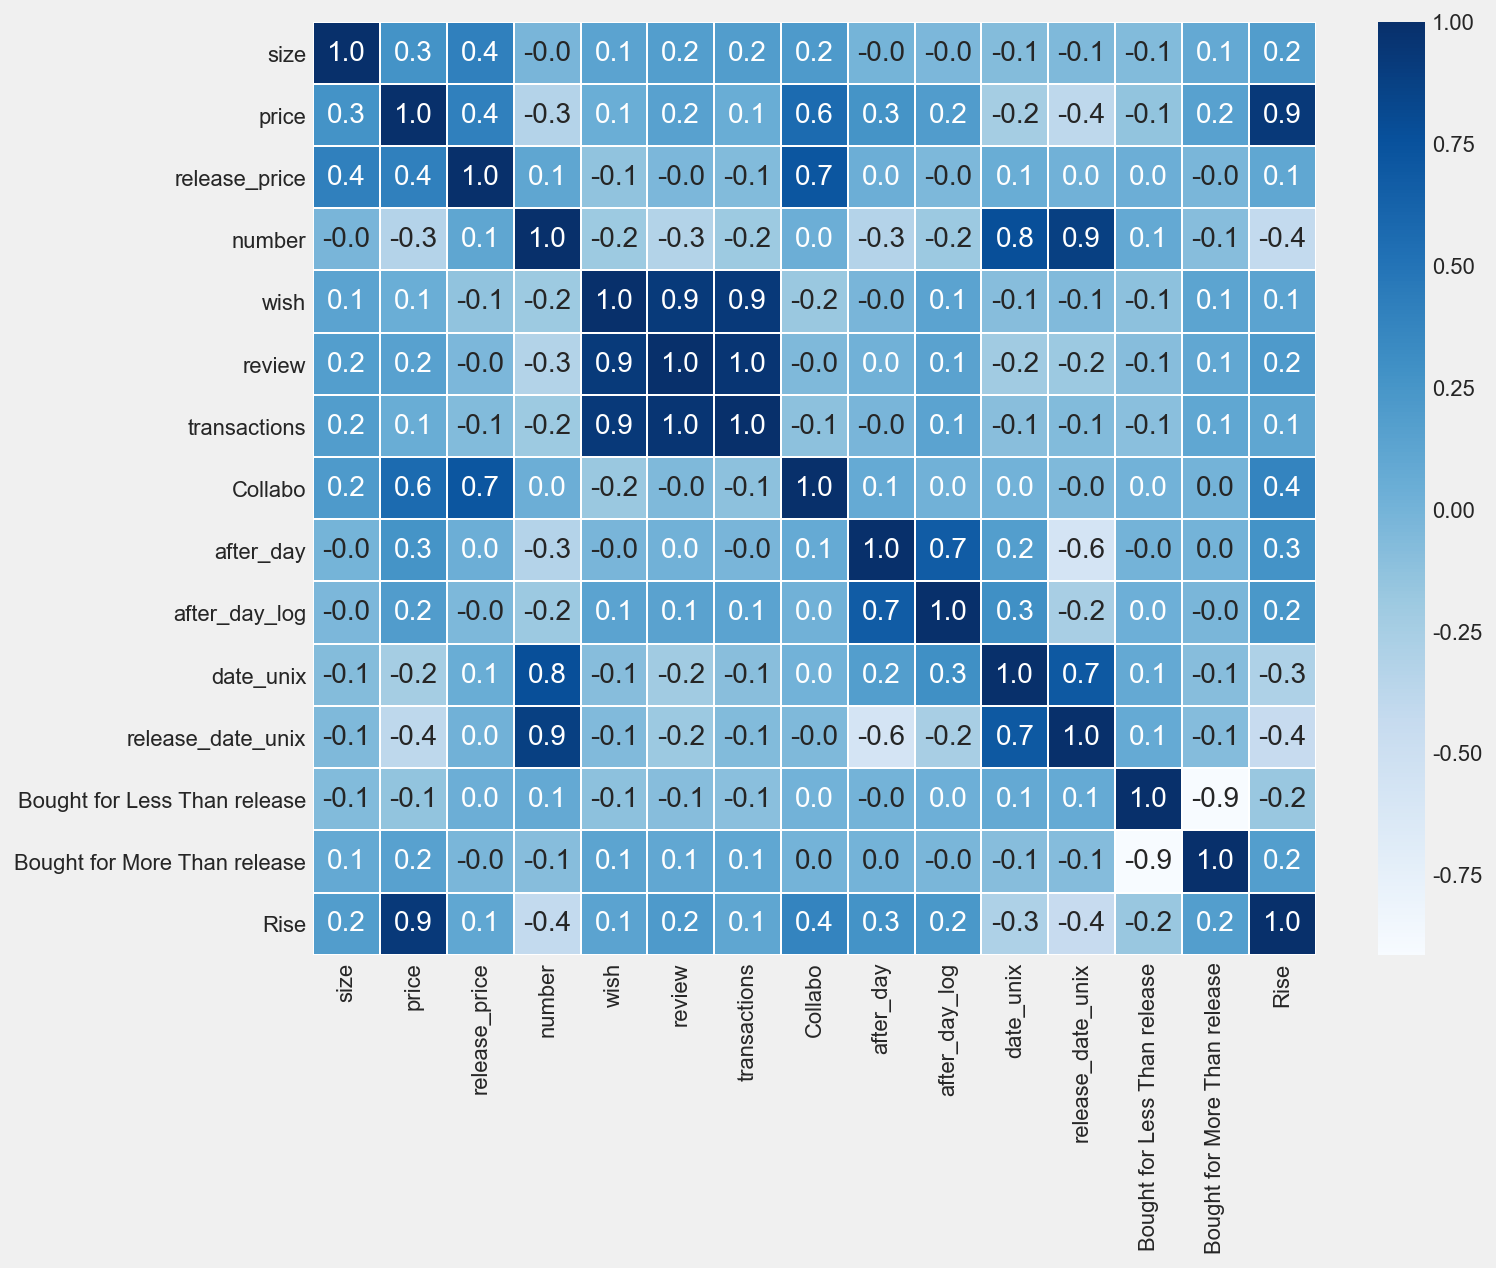

In [12]:
# 전체적인 변수간 상관관계 
# price 와 양의 상관계수 size ,collabo, release_price, review 를 갖고 있는 컬럼들 but 미미한 수준 
fig ,ax  = plt.subplots(figsize = (10,8))
c = df.corr()
sns.heatmap(c , annot = True , fmt ='.1f' , linewidths  = .5 , cmap = 'Blues')
plt.show()

### Price 

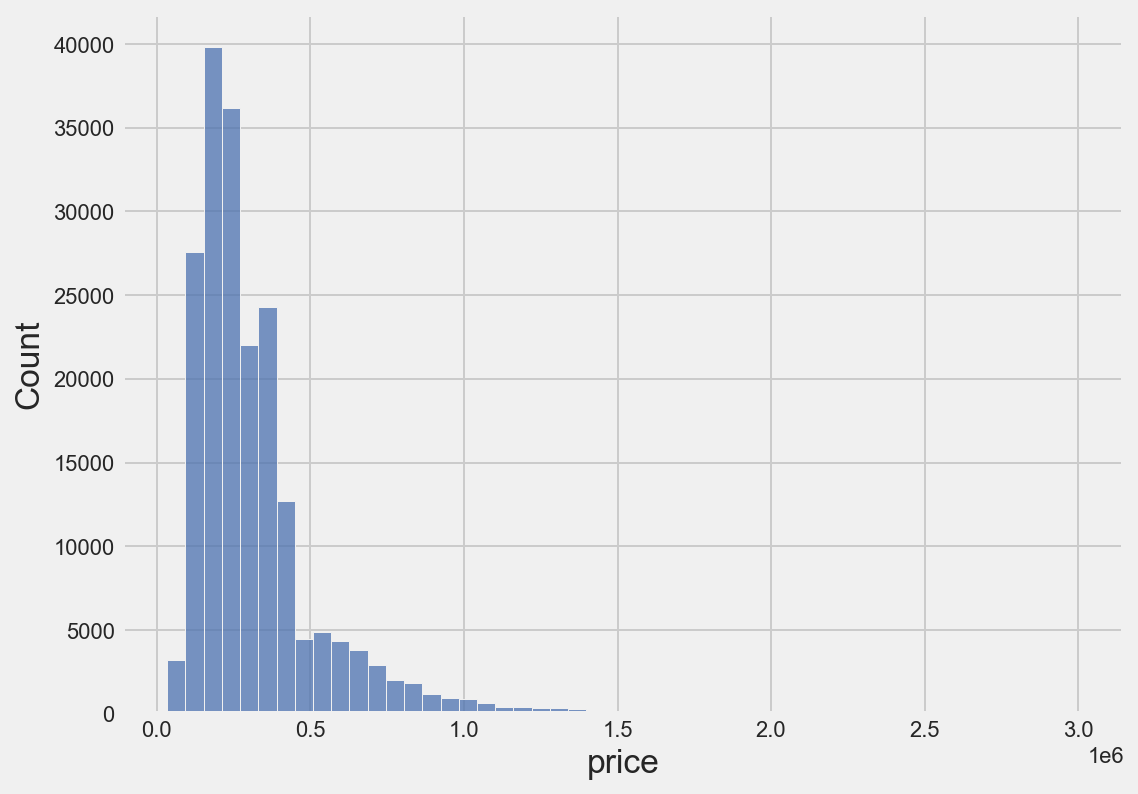

In [13]:
# 가격 형성 분포 
fig, ax =  plt.subplots(figsize = (8,6))
sns.histplot(df['price'] , ax  = ax  , bins = 50)
plt.show()

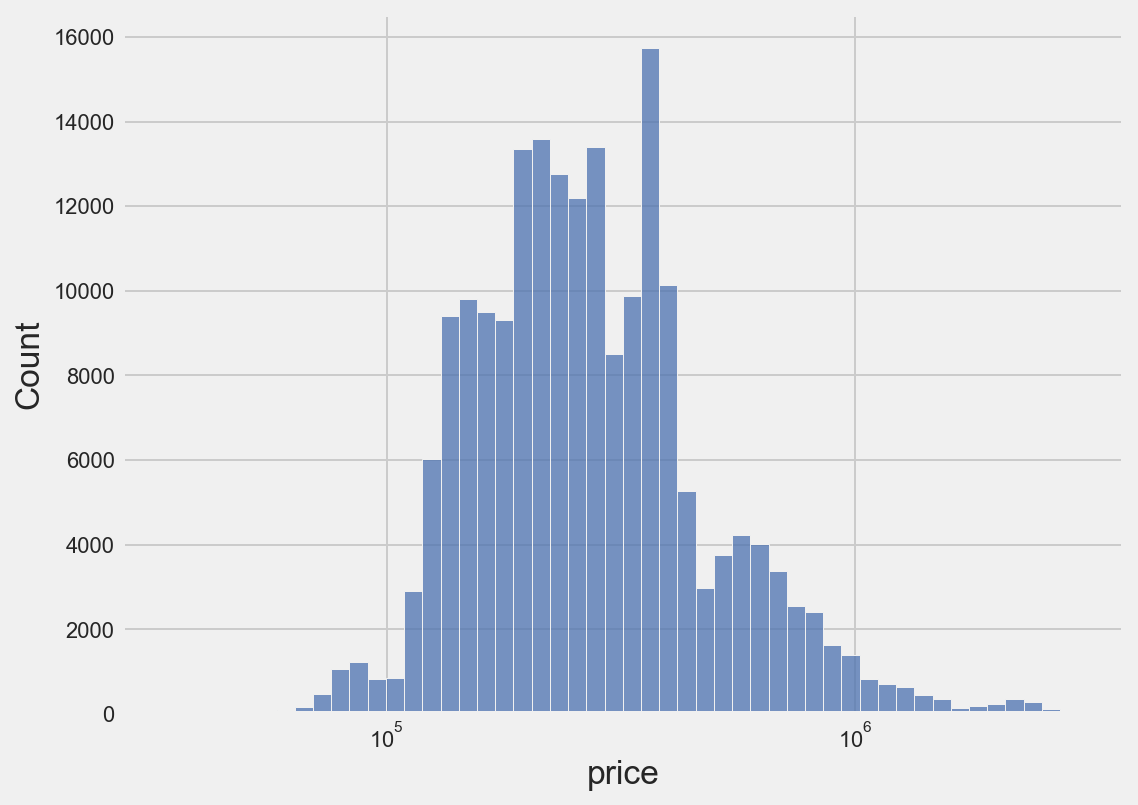

In [14]:
# log를 취한 가격 분포 
fig, ax =  plt.subplots(figsize = (8,6))
sns.histplot(df['price'] , ax  = ax  ,log_scale = True, bins = 50)
plt.show()

### 발매가 , 판매가 도수분포 

In [15]:
# 가격, 발매 가격 도수분포표
#변수의 범위를 동일한 크기의 구간으로 나눈 다음, 각 구간마다 몇 개의 변수의 값이 존재하는지를 보여준다.

binne_release_price = pd.cut(df['release_price'] , 10)
binne_price = pd.cut(df['price'], 10)
display( binne_release_price.value_counts().sort_values(ascending = False) ,binne_price.value_counts().sort_values(ascending =False))

(109460.0, 126280.0]    88371
(126280.0, 143100.0]    58750
(210380.0, 227200.0]    18998
(92640.0, 109460.0]     14685
(75820.0, 92640.0]       6053
(176740.0, 193560.0]     4851
(58831.8, 75820.0]       2163
(159920.0, 176740.0]     1897
(143100.0, 159920.0]     1394
(193560.0, 210380.0]        0
Name: release_price, dtype: int64

(31034.0, 330600.0]       128812
(330600.0, 627200.0]       50652
(627200.0, 923800.0]       11740
(923800.0, 1220400.0]       3150
(1220400.0, 1517000.0]      1218
(2110200.0, 2406800.0]       482
(1813600.0, 2110200.0]       424
(1517000.0, 1813600.0]       414
(2406800.0, 2703400.0]       228
(2703400.0, 3000000.0]        42
Name: price, dtype: int64

#### 사이즈 변수 

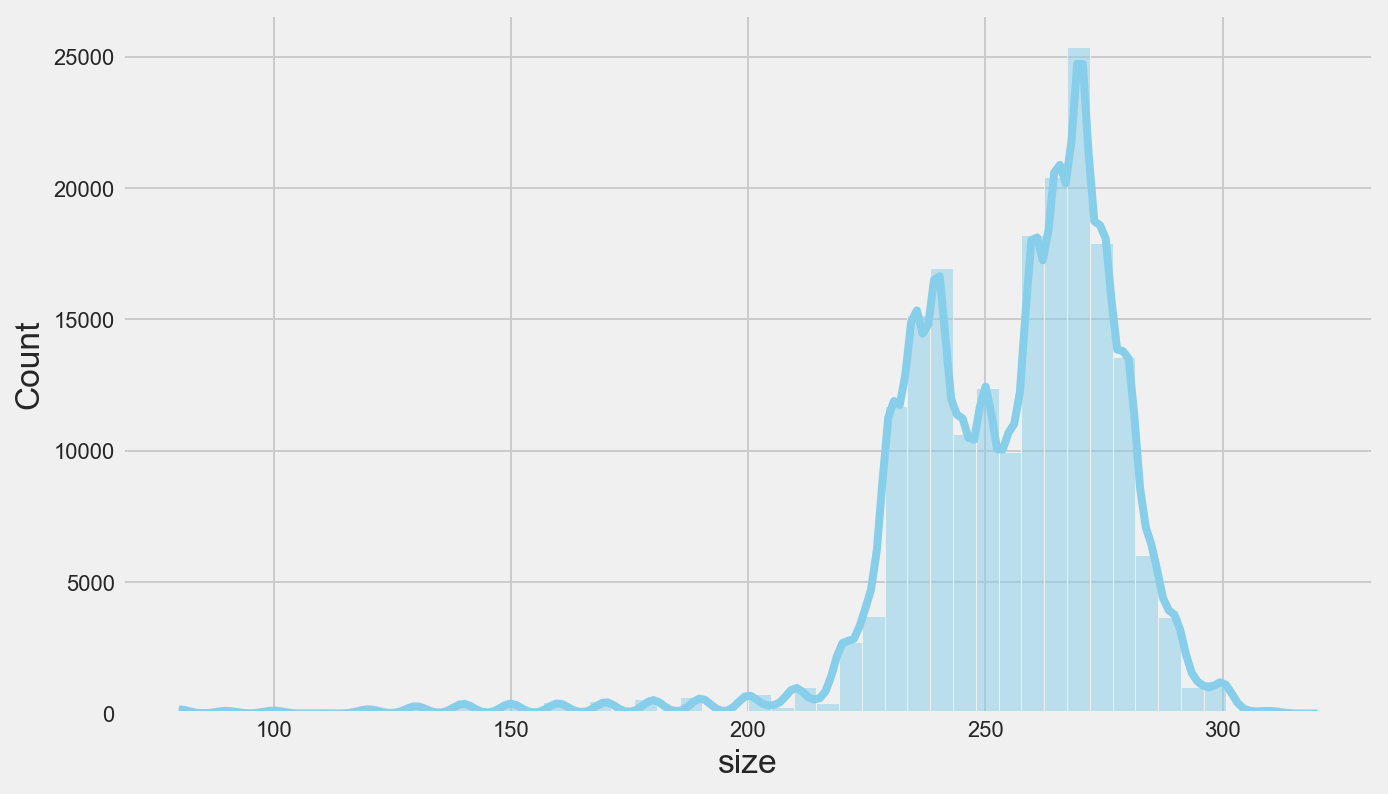

In [16]:
# size 분포 
fig ,ax = plt.subplots(figsize = (10,6))
sns.histplot(df['size'], kde = True, ax = ax, color = 'skyblue', bins = 50)
plt.show()

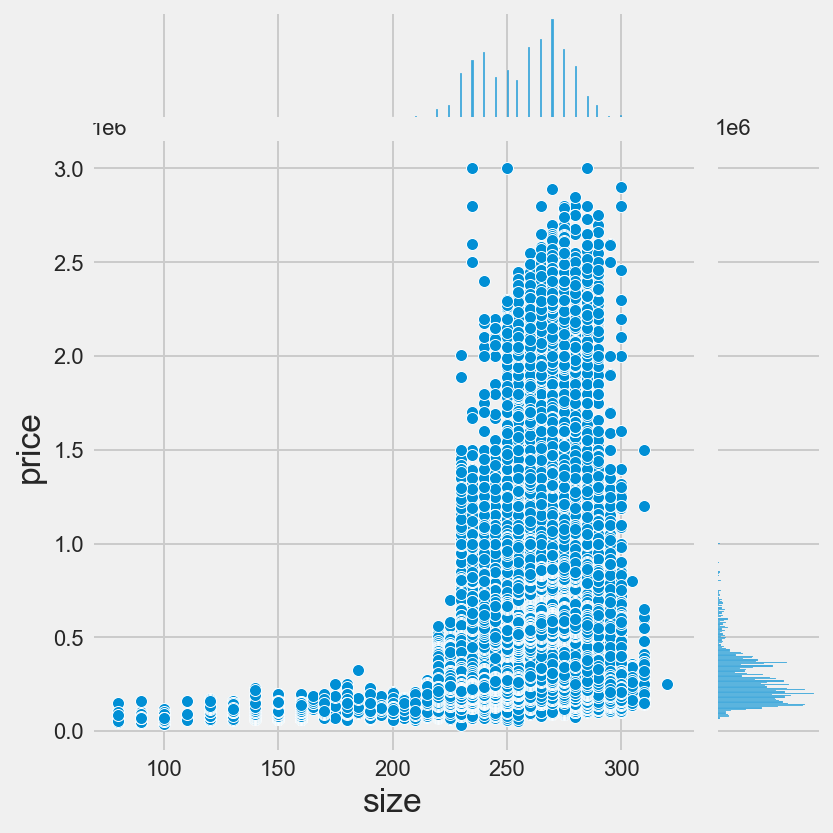

In [17]:
# 사이즈에 따른 가격 분포 
sns.jointplot(df['size'] , df['price'] , height = 6)
plt.show()

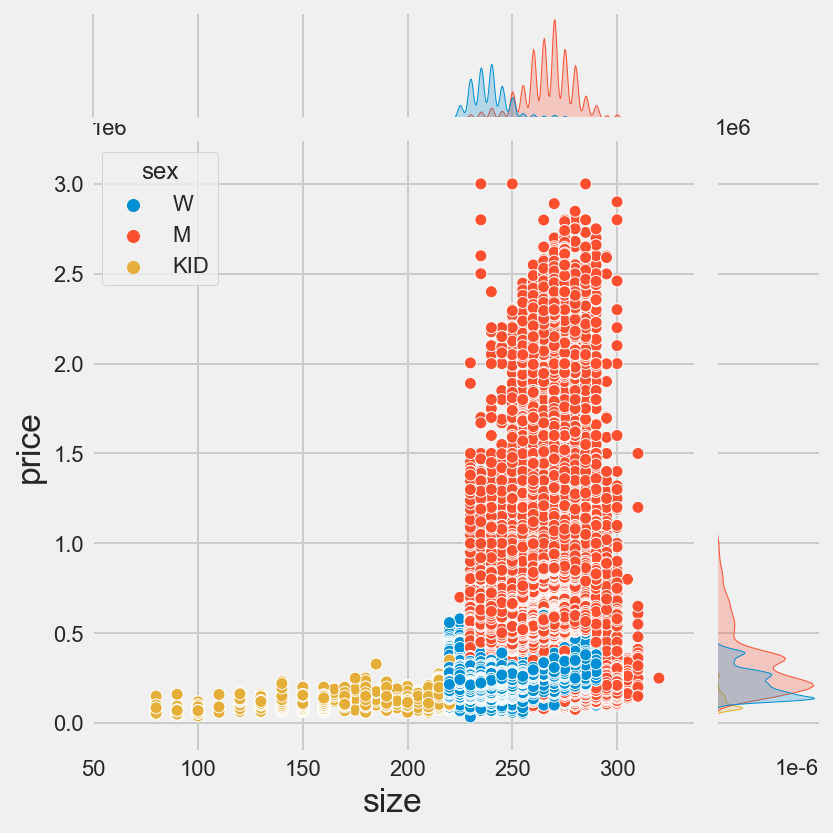

In [18]:
# 성별에 따른 제품 및 사이즈에 따른 가격 분포 
sns.jointplot(df['size'] , df['price'] , height = 6 , hue = df['sex'], )
plt.show()

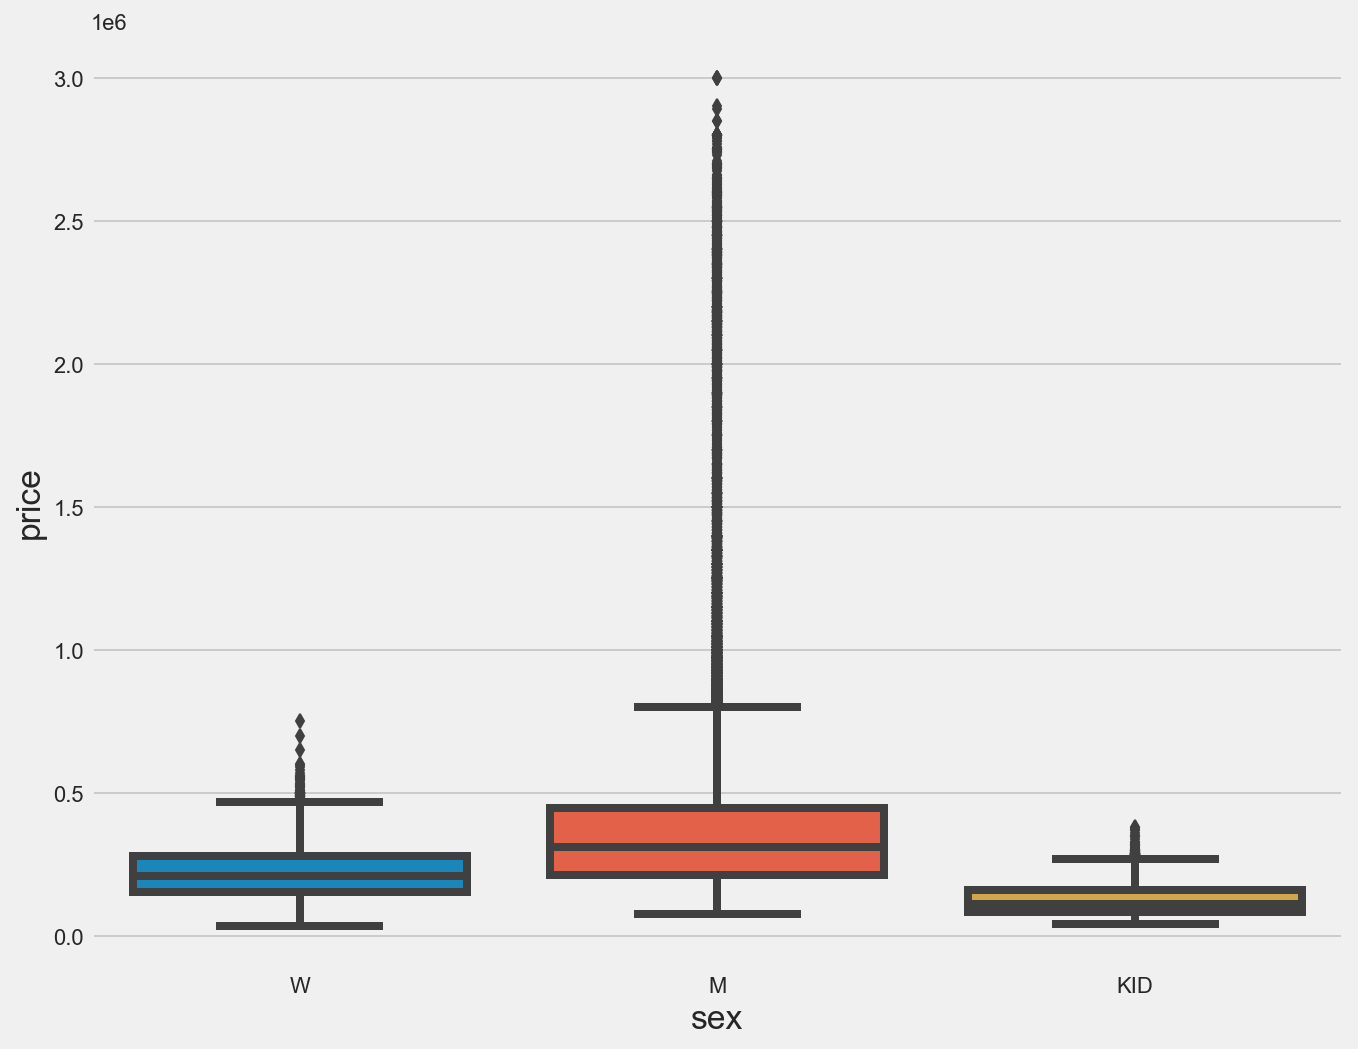

In [19]:
# 상대적으로 남자 제품의 가격이 expensive 할 것 ( 다양한 사이즈 구비 )
# 성별에 따른 제품 가격 분포 

fig , ax = plt.subplots(figsize= (10,8))
sns.boxplot(df['sex'], df['price'])
plt.show()

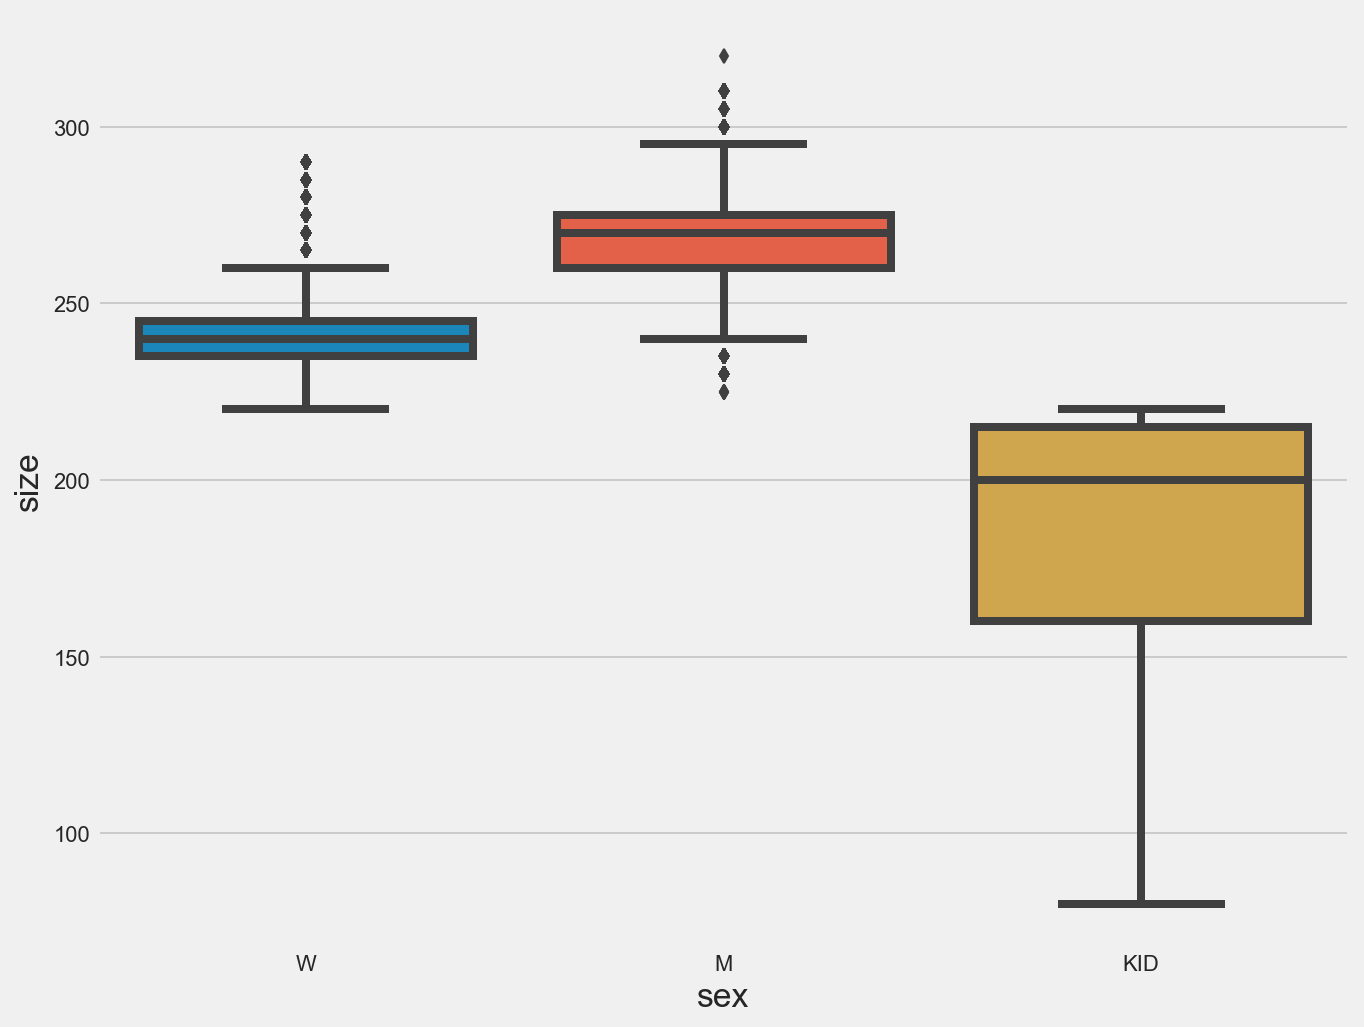

In [20]:
# 판매되는 제품중 남성의 신발 사이즈가 상대적으로 여성과 아동에 비해 클 것 
# 성별에 따른 제품 가격 분포 

fig , ax = plt.subplots(figsize= (10,8))
sns.boxplot(df['sex'], df['size'])
plt.show()

#### 제품 카테고리

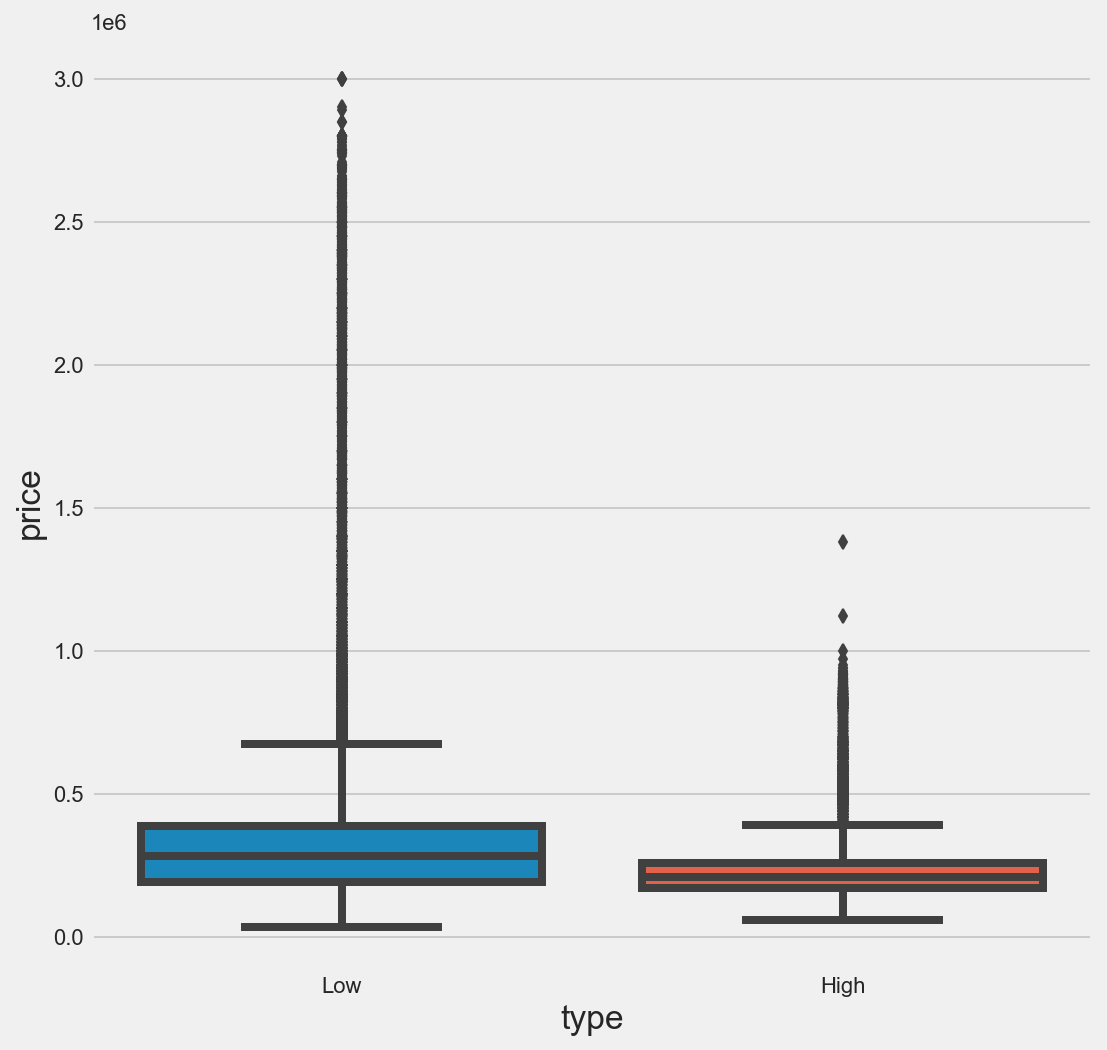

In [21]:
# 제품 카테고리에 따른 가격 차 
fig , ax = plt.subplots(figsize= (8,8))
sns.boxplot(df['type'], df['price'])
plt.show()

#### Collabo 제품 

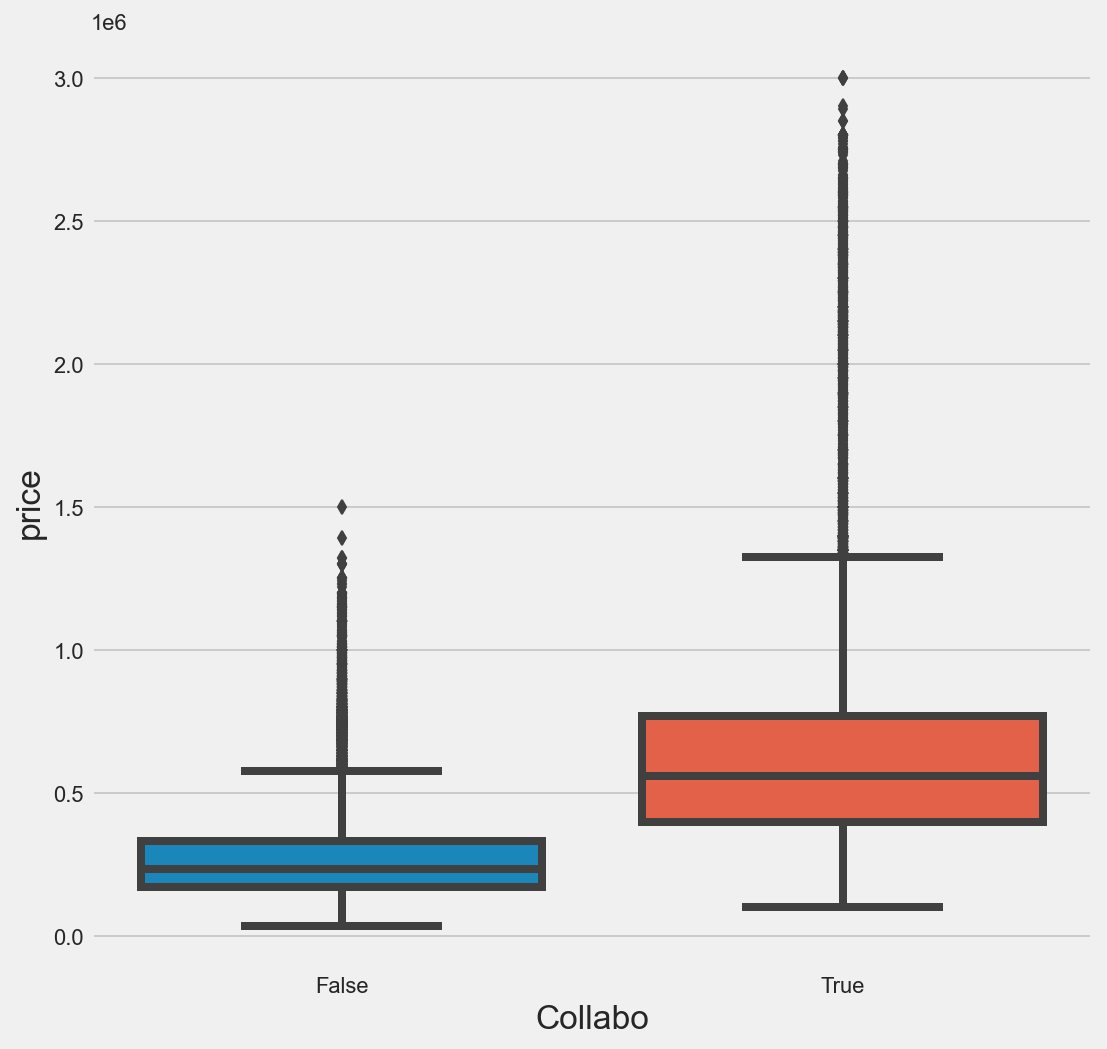

In [22]:
fig , ax = plt.subplots(figsize= (8,8))
sns.boxplot(df['Collabo'], df['price'] )
plt.show()

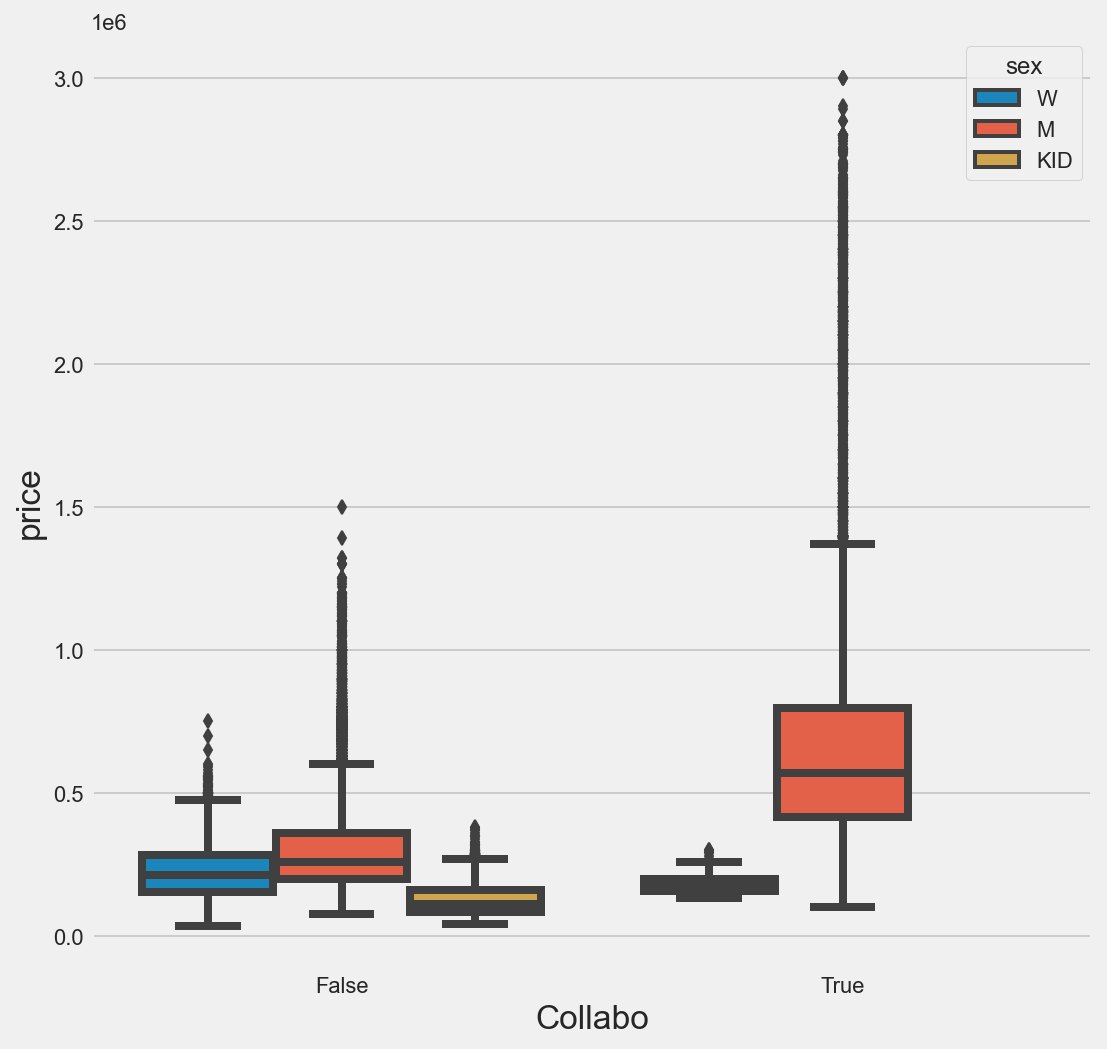

In [23]:
#  콜라보 제품에 따른 가격 차
fig , ax = plt.subplots(figsize= (8,8))
sns.boxplot(df['Collabo'], df['price'], hue= df['sex'])
plt.show()

In [24]:
df_collabo = df[df['Collabo'] == True]

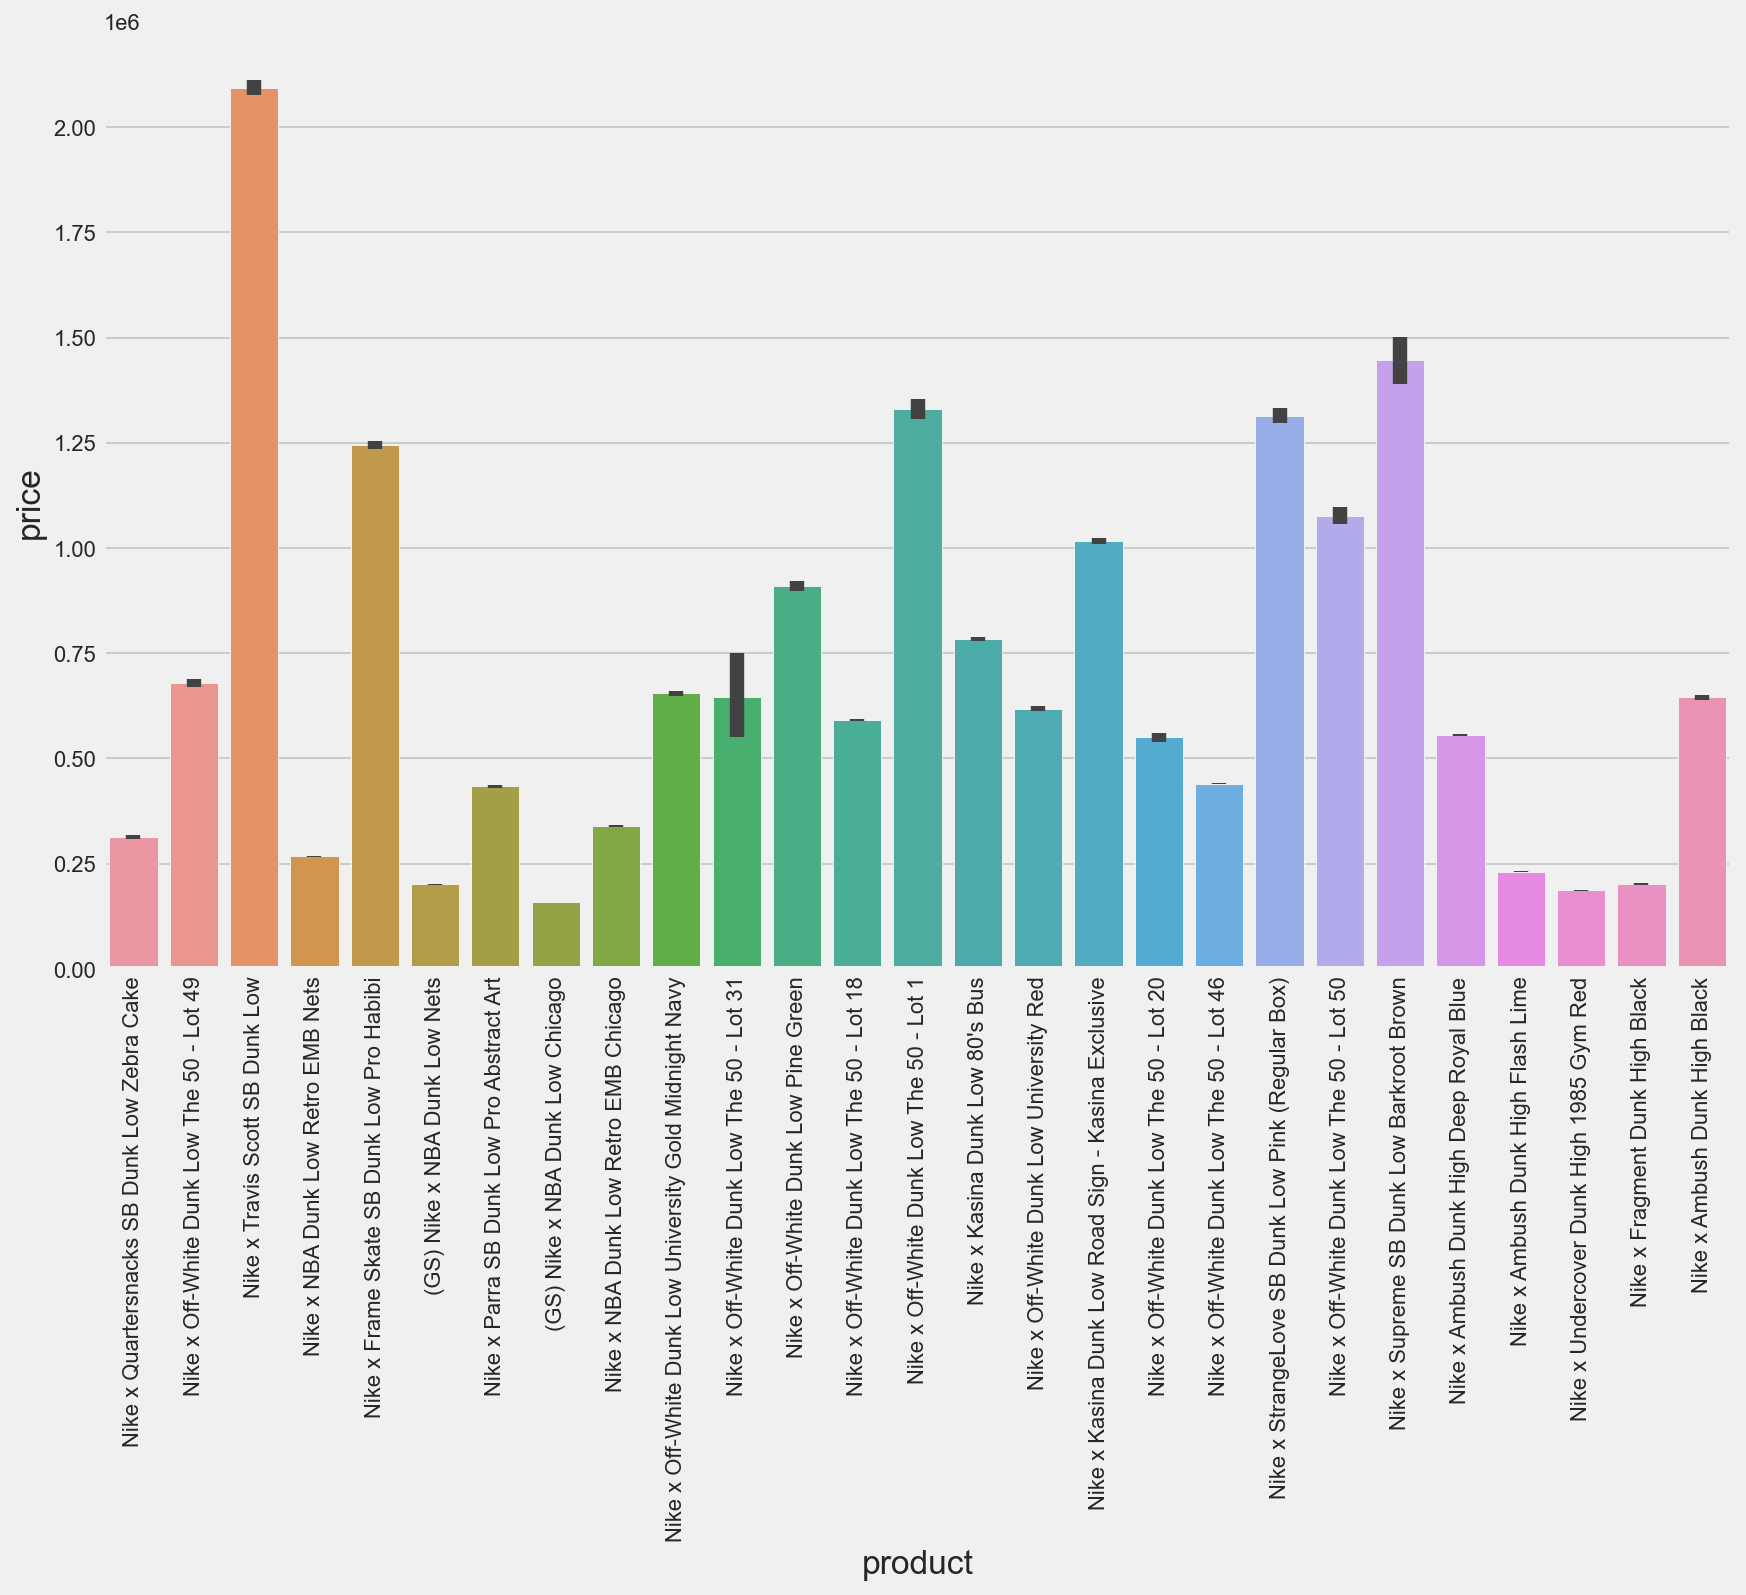

In [25]:
# collabo 제품 가격 
fig , ax = plt.subplots(figsize = (13,8))
sns.barplot(df_collabo['product'], df_collabo['price'])
plt.xticks(rotation = 90)
plt.show()

#### wish(찜)

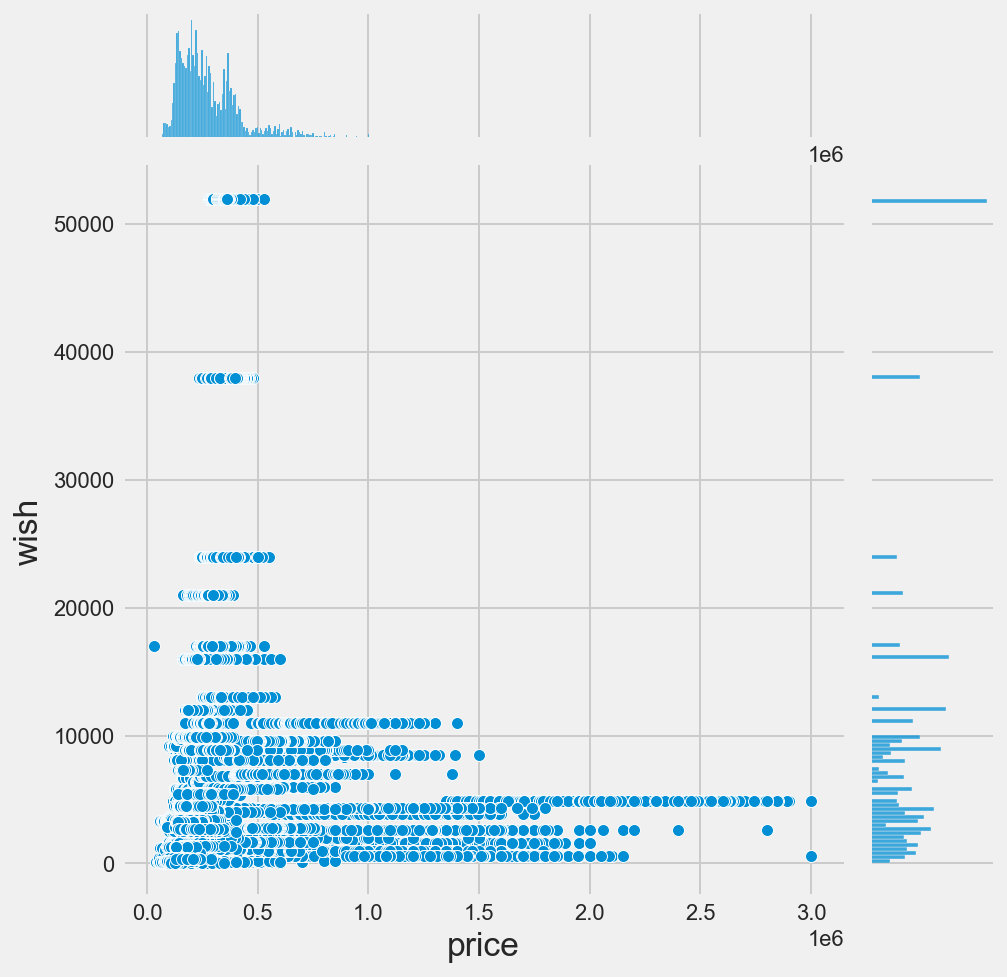

In [26]:
# 접근성이 높은 낮은 가격 제품들이 소비자의 선호도가 높을것이다.
# wish 사용 

sns.jointplot( df['price'], df['wish'] , height = 7)
plt.show()

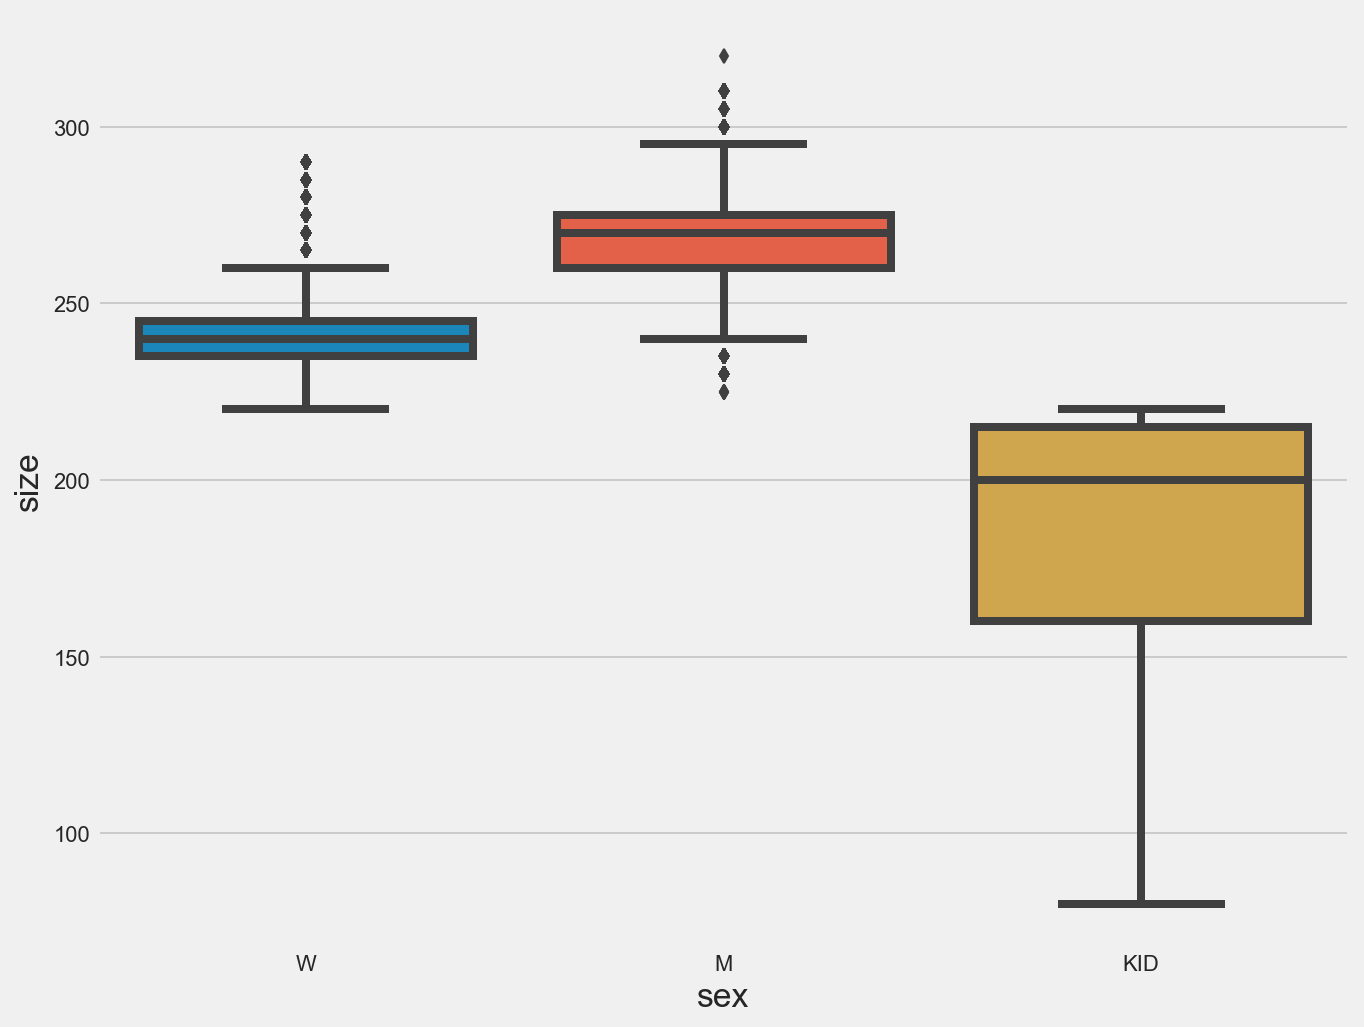

In [27]:
# 판매되는 제품중 남성의 신발 사이즈가 상대적으로 여성과 아동에 비해 클 것 
# 성별에 따른 제품 가격 분포 

fig , ax = plt.subplots(figsize= (10,8))
sns.boxplot(df['sex'], df['size'])
plt.show()

### wish

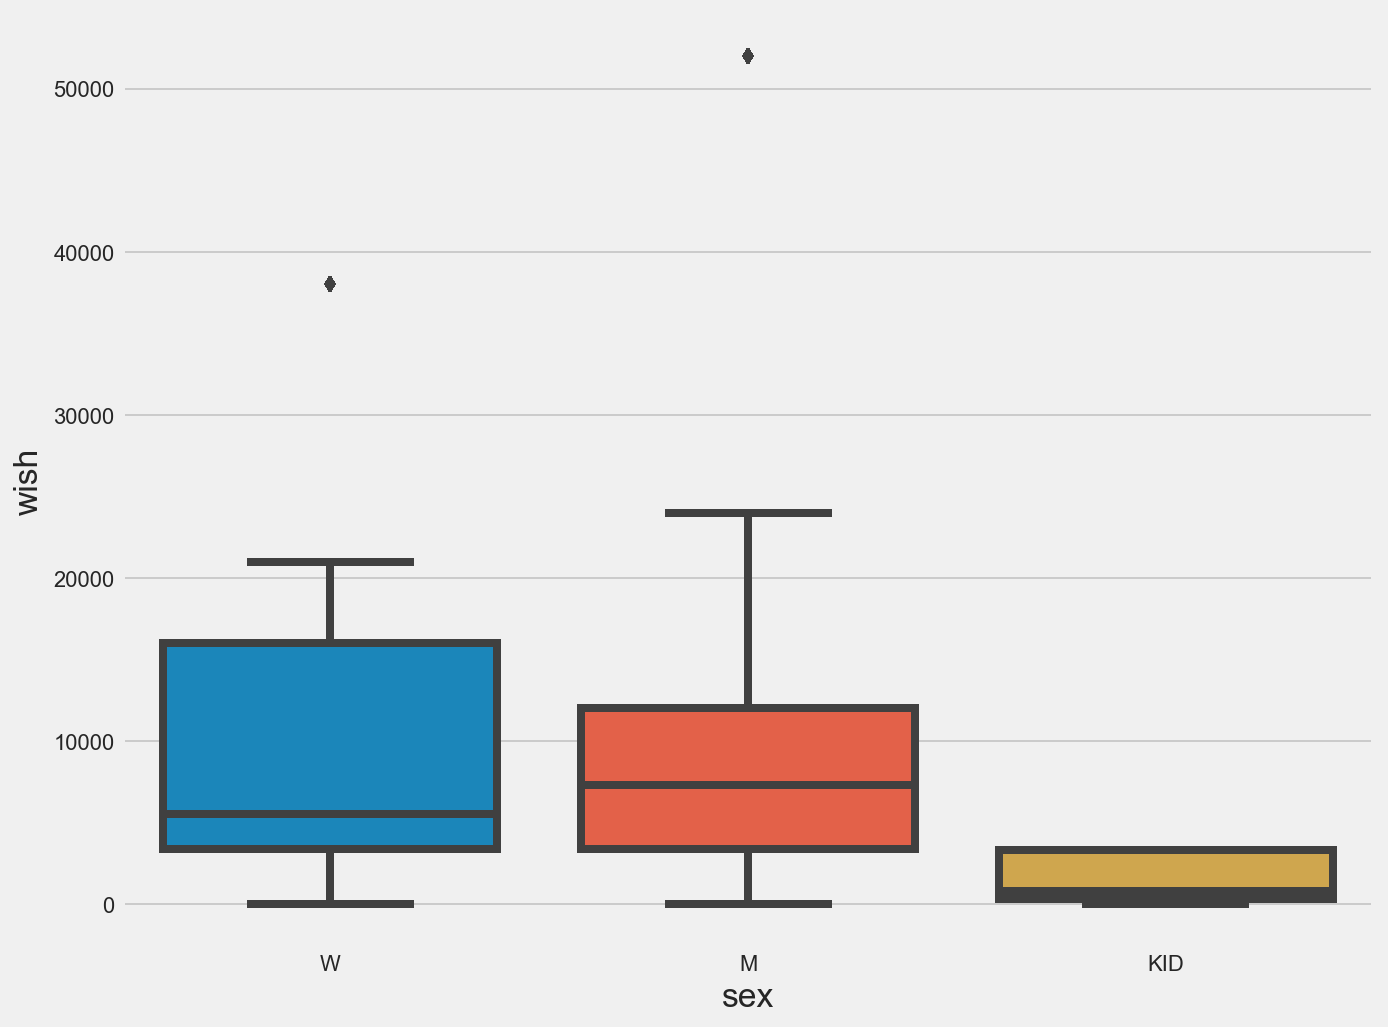

In [28]:
# 제품수와 비례하게 남성의 인기도가 높을것이라고 예상 but 여성 제품의 인기도 중앙값이 가장 높음 
# wish 사용 

fig , ax = plt.subplots(figsize= (10,8))
sns.boxplot(df['sex'], df['wish'])
plt.show()

### review

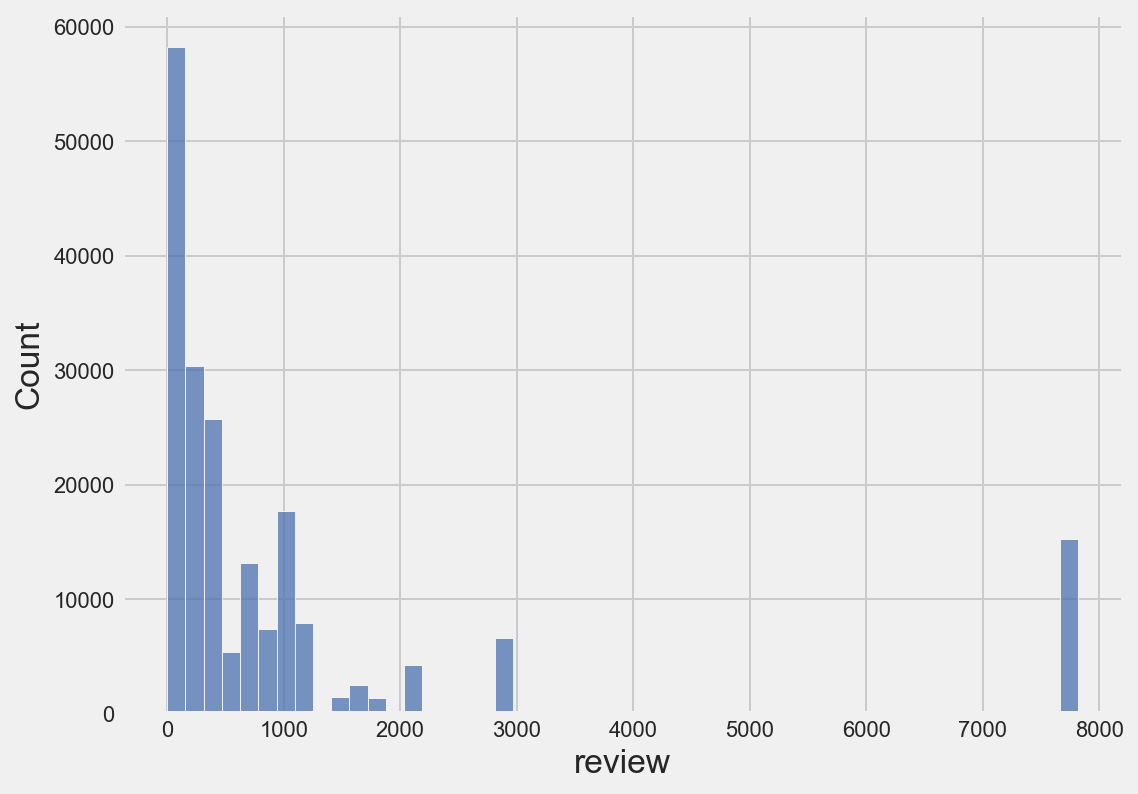

In [29]:
fig, ax =  plt.subplots(figsize = (8,6))
sns.histplot(df['review'] , ax  = ax , bins = 50)
plt.show()

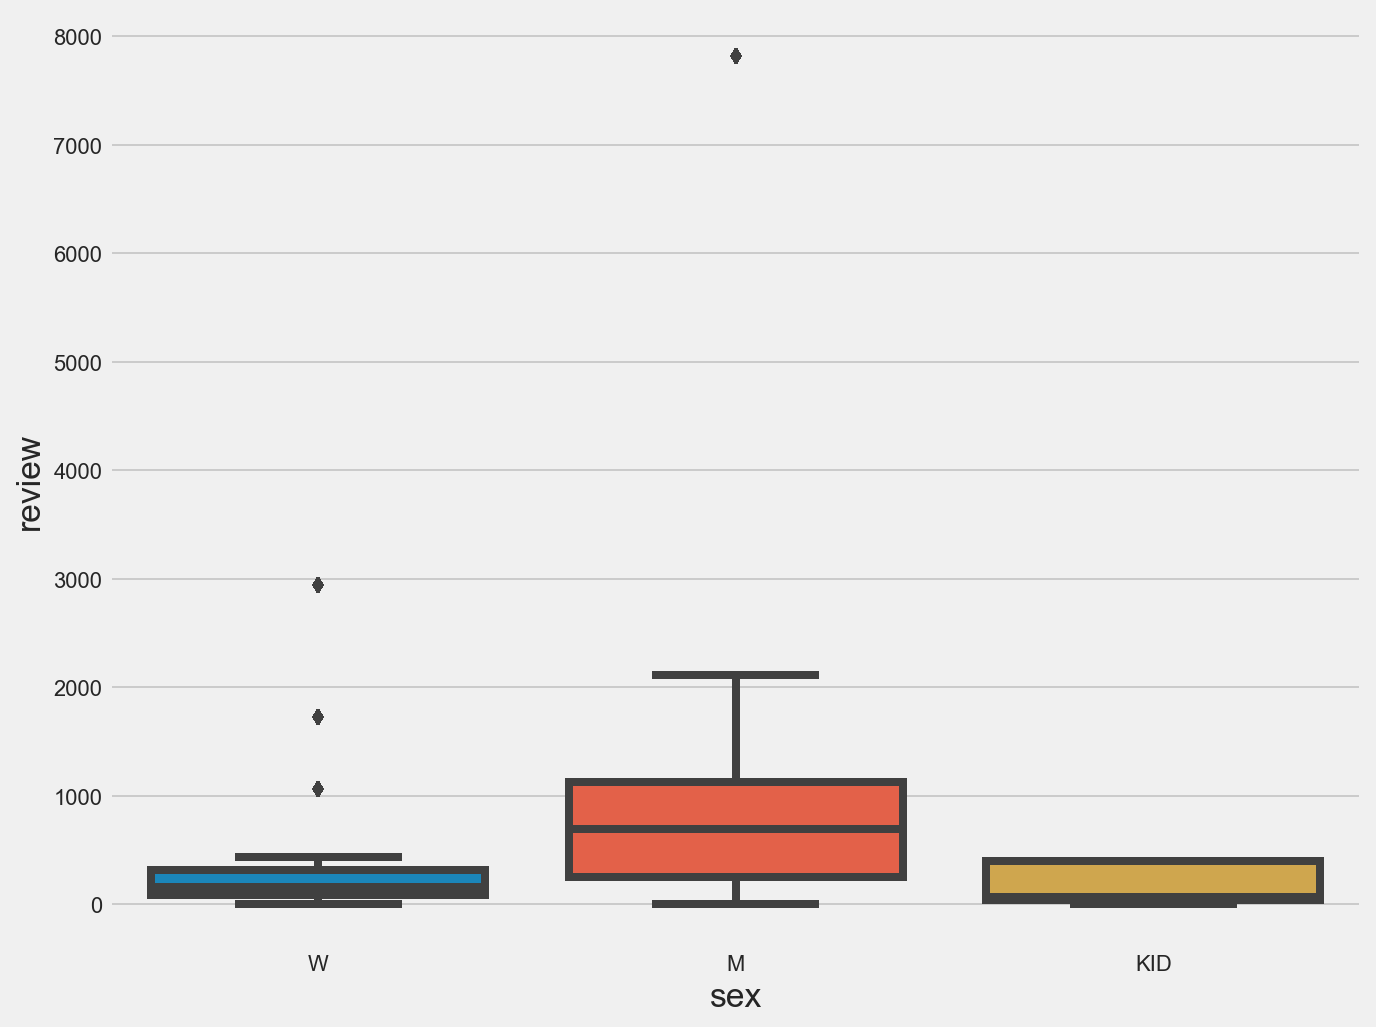

In [30]:
fig , ax = plt.subplots(figsize= (10,8))
sns.boxplot(df['sex'], df['review'])
plt.show()

#### after_day( 판매일 - 발매일)

In [31]:
# 발매 후 시간에 따른 제품 가치 변화 
# 단순 계산으로 500 ~ 700일이 지난 뒤 제품 가격이 최고 상승치에 도달 

df_af =df.groupby('after_day')['price'].mean().round(0)
df_af

after_day
1       304976.0
2       292255.0
3       301145.0
4       276455.0
5       270877.0
          ...   
2744    249000.0
2773    210000.0
2955    210000.0
4600    350000.0
5573    400000.0
Name: price, Length: 978, dtype: float64

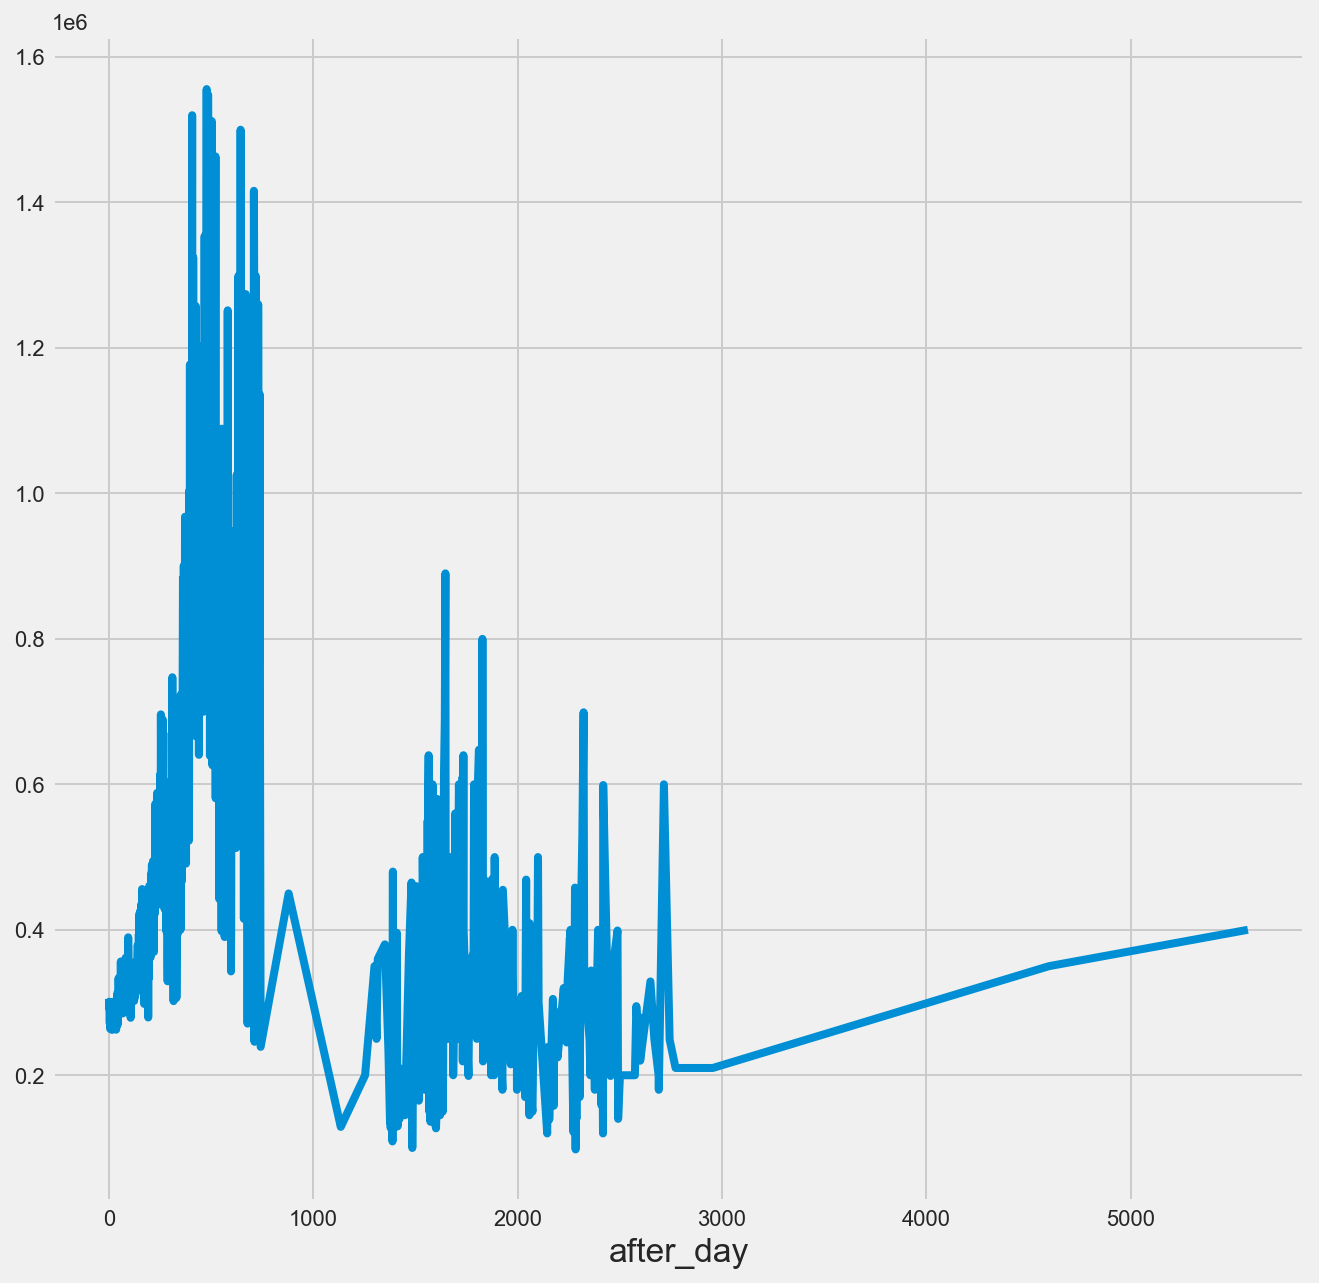

In [32]:
fig ,ax = plt.subplots(figsize = (10,10))
sns.lineplot(df_af.index , df_af.values, ax =ax )
plt.show()

### 남성 , 여성(GS,W) , 아동(PS, TD) 구분

In [33]:
df_men = df[(~df['product'].str.contains('GS')) & (~df['product'].str.contains('PS')) & (~df['product'].str.contains('TD'))&(~df['product'].str.contains('(W)'))]

In [34]:
# 남성
df_men.head()

size   price        date                                      product  \
5951   260  299000  2021-09-02  Nike x Quartersnacks SB Dunk Low Zebra Cake   
5952   280  350000  2021-09-02  Nike x Quartersnacks SB Dunk Low Zebra Cake   
5953   275  340000  2021-09-02  Nike x Quartersnacks SB Dunk Low Zebra Cake   
5954   265  300000  2021-09-02  Nike x Quartersnacks SB Dunk Low Zebra Cake   
5955   275  350000  2021-09-02  Nike x Quartersnacks SB Dunk Low Zebra Cake   

     release_date        color  release_price brand   category   number  \
5951   2021-09-01  BLACK/WHITE         129000  Nike  Nike Dunk  39064.0   
5952   2021-09-01  BLACK/WHITE         129000  Nike  Nike Dunk  39064.0   
5953   2021-09-01  BLACK/WHITE         129000  Nike  Nike Dunk  39064.0   
5954   2021-09-01  BLACK/WHITE         129000  Nike  Nike Dunk  39064.0   
5955   2021-09-01  BLACK/WHITE         129000  Nike  Nike Dunk  39064.0   

       wish  review  transactions type sex  Collabo  Collabo_brand  after_day  \
5951  783.0    26.0           145  Low   M     True  Quartersnacks          1   
5952  783.0    26.0           145  Low   M     True  Quartersnacks          1   
5953  783.0    26.0           145  Low   M     True  Quartersnacks          1   
5954  783.0    26.0           145  Low   M     True  Quartersnacks          1   
5955  783.0    26.0           145  Low   M     True  Quartersnacks          1   

      after_day_log  date_unix  release_date_unix  \
5951   9.999995e-07     738035             738034   
5952   9.999995e-07     738035             738034   
5953   9.999995e-07     738035             738034   
5954   9.999995e-07     738035             738034   
5955   9.999995e-07     738035             738034   

      Bought for Less Than release  Bought for More Than release    Rise  
5951                         False                          True  231.78  
5952                         False                          True  271.32  
5953                         False                          True  263.57  
5954                         False                          True  232.56  
5955                         False                          True  271.32

In [35]:
df_men.describe().round(-1)

size      price  release_price    number      wish    review  \
count  110770.0   110770.0       110770.0  110770.0  110770.0  110770.0   
mean      270.0   374340.0       133750.0   31670.0   13670.0    1610.0   
std        10.0   298800.0        27690.0    5930.0   16170.0    2530.0   
min       220.0    90000.0       106800.0    3490.0      10.0       0.0   
25%       260.0   209000.0       119000.0   26610.0    3450.0     250.0   
50%       270.0   290000.0       129000.0   29220.0    8080.0     680.0   
75%       280.0   395000.0       129000.0   37770.0   16000.0    1160.0   
max       320.0  3000000.0       219000.0   47120.0   52000.0    7820.0   

       transactions  after_day  after_day_log  date_unix  release_date_unix  \
count      110770.0   110770.0       110770.0   110770.0           110770.0   
mean         4810.0       80.0            0.0   737930.0           737850.0   
std          5610.0      120.0            0.0      140.0              170.0   
min             0.0        0.0            0.0   737460.0           732220.0   
25%          1450.0       10.0            0.0   737820.0           737770.0   
50%          2750.0       50.0            0.0   737930.0           737830.0   
75%          4450.0      100.0            0.0   738040.0           738000.0   
max         18150.0     5570.0           10.0   738160.0           738140.0   

           Rise  
count  110770.0  
mean      280.0  
std       200.0  
min        50.0  
25%       160.0  
50%       230.0  
75%       310.0  
max      2350.0

In [36]:
# product (중앙값 1060 , 제품수가 많아 중앙값 이상으로 판매가 이루어진 제품으로 그래프 생성 )
df_men_product_count = pd.DataFrame(df_men['product'].value_counts().sort_values(ascending = True))
df_men_product_count = df_men_product_count[df_men_product_count['product']>= 1060]
df_men_product_count.head()

product
Nike Dunk Low SP Ceramic               1084
Nike x NBA Dunk Low Retro EMB Nets     1145
Nike Dunk Low SP University Red        1227
Nike Dunk High SP Spartan Green        1250
Nike Dunk Low Retro Hyper Cobalt       1250

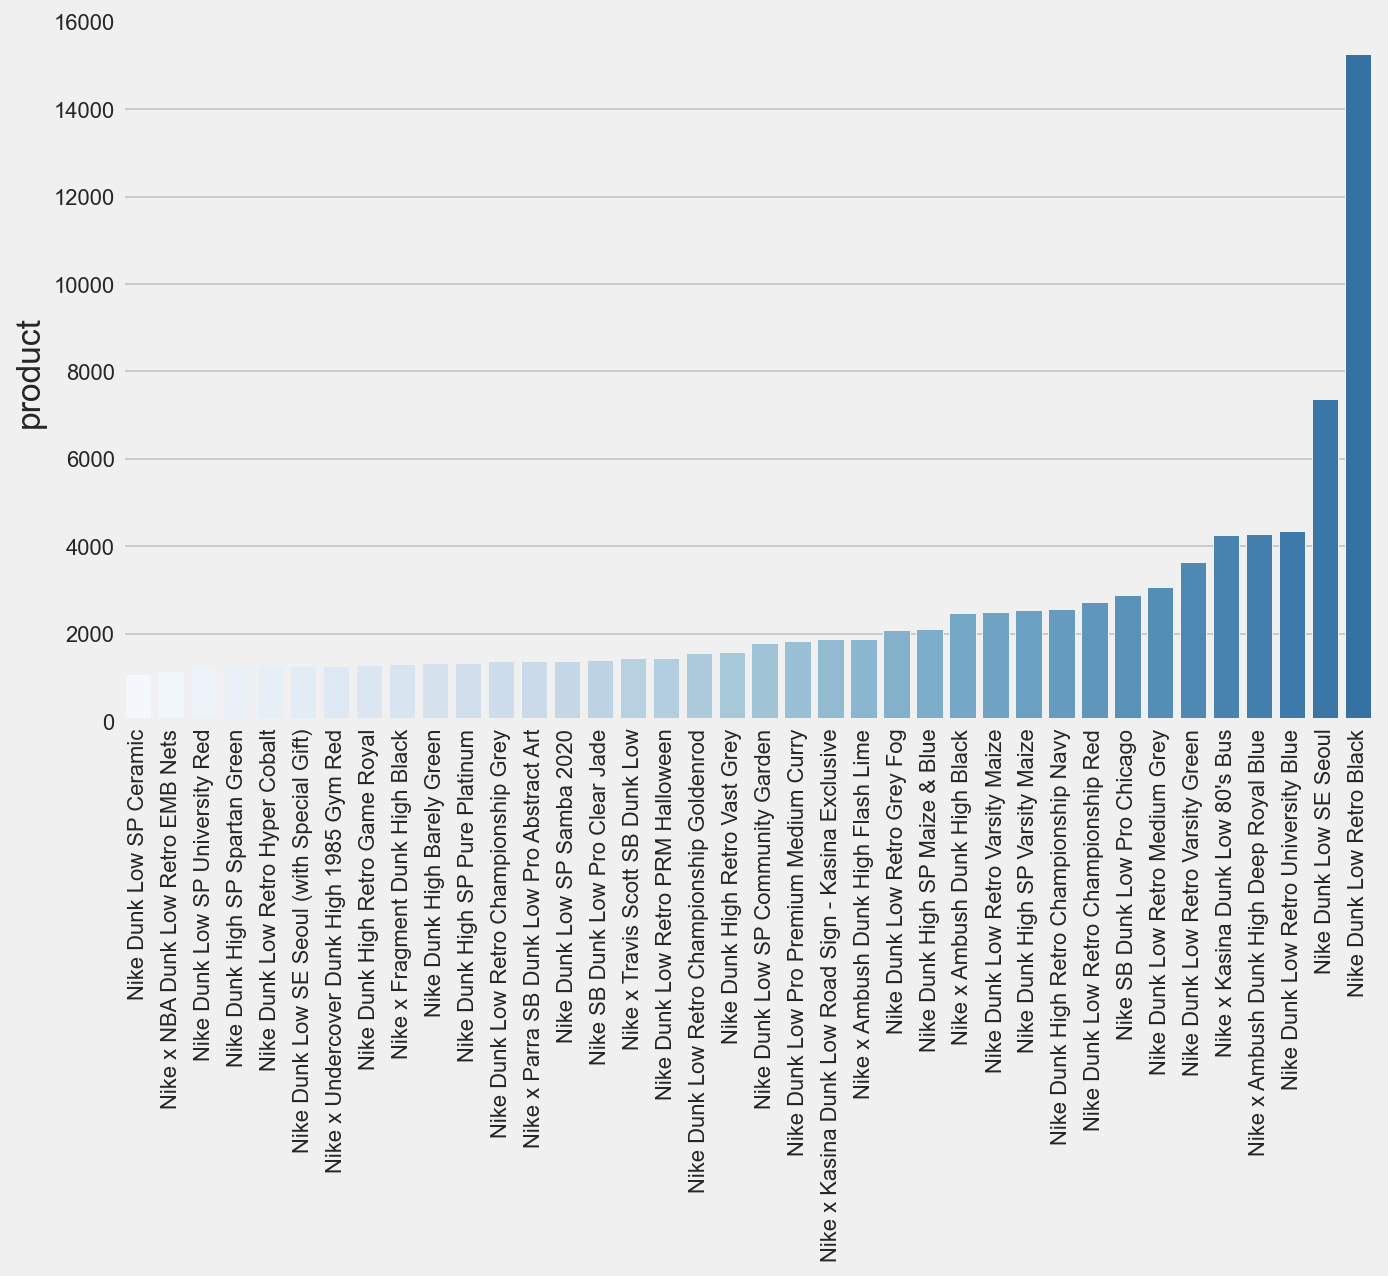

In [37]:
fig ,ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues", 50)
sns.barplot(df_men_product_count.index ,df_men_product_count['product'] ,ax = ax )
plt.xticks(rotation = 90)
plt.show()

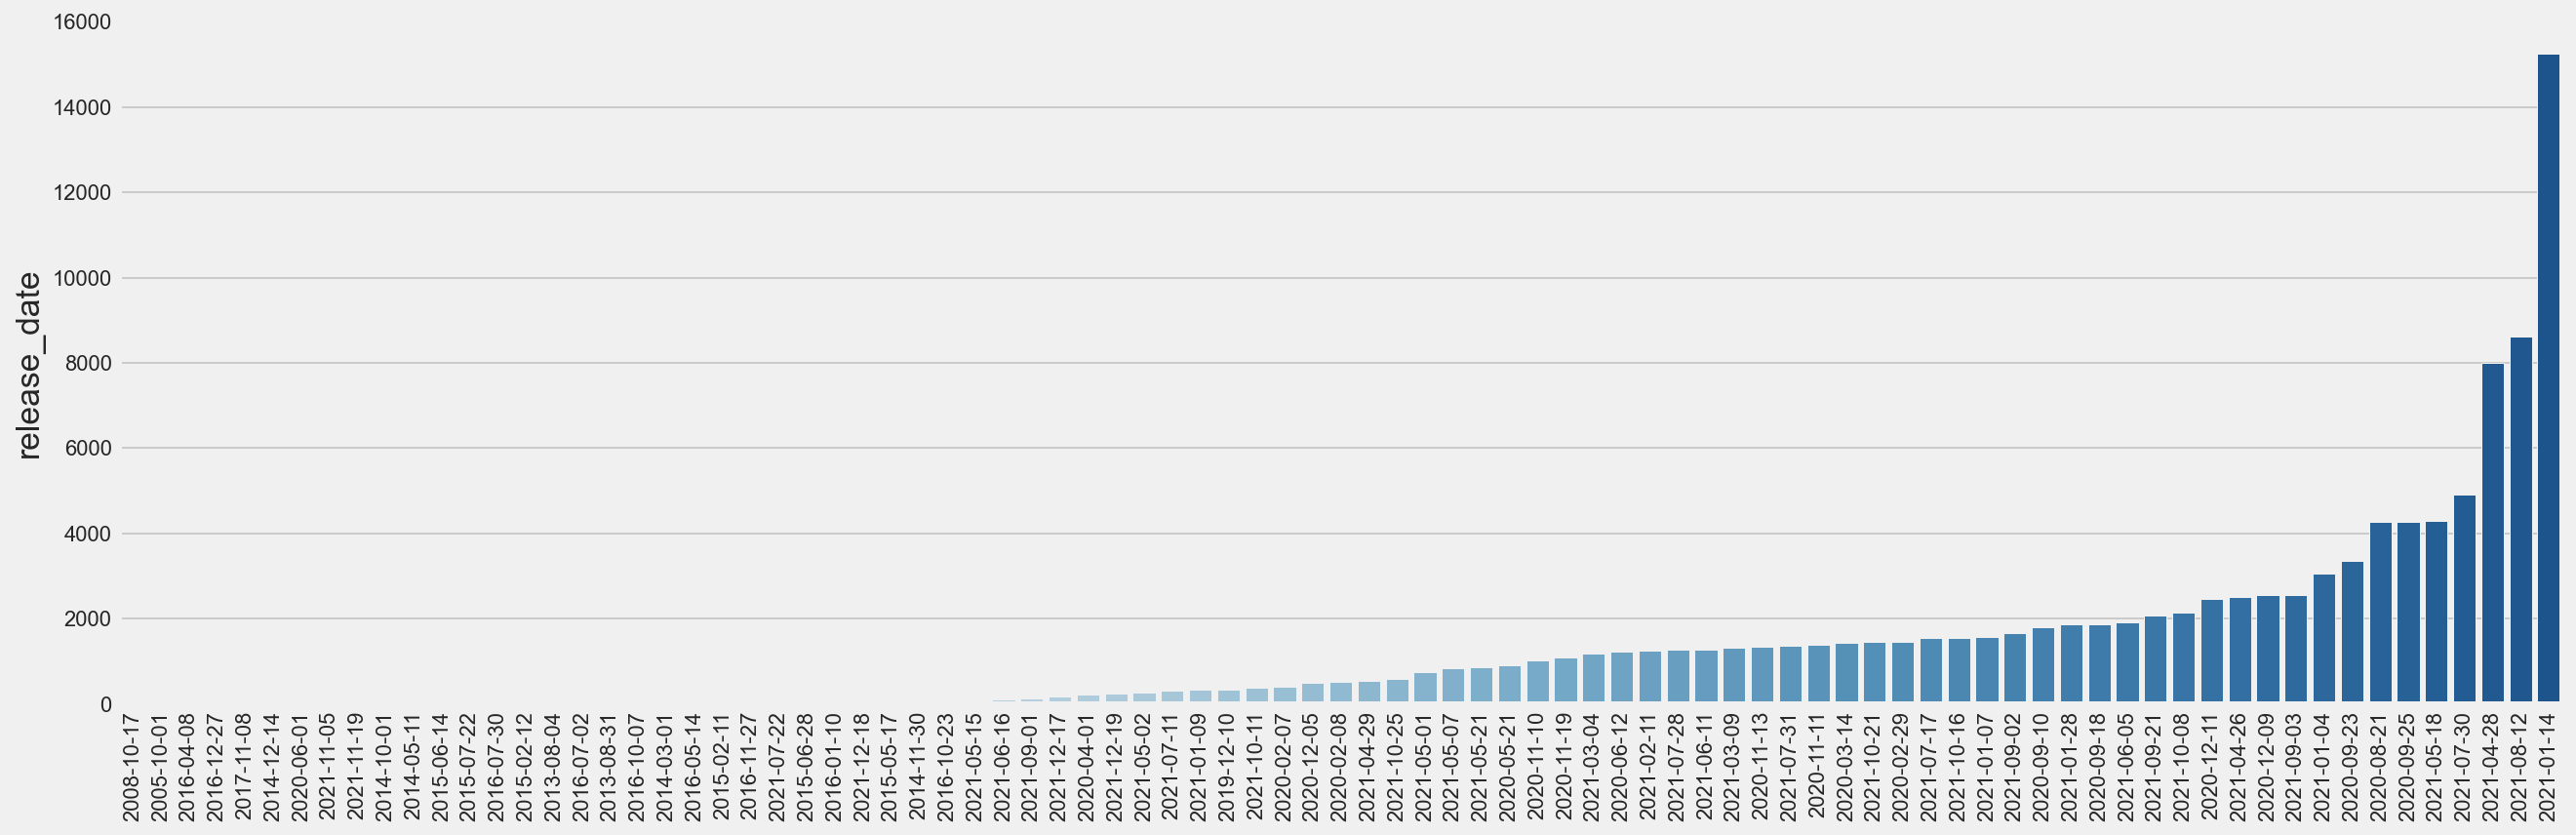

In [38]:
# release date
fig ,ax = plt.subplots(figsize = (20,6))
sns.set_palette("Blues", 100)
sns.barplot(df_men['release_date'].value_counts().sort_values(ascending = True).index, 
            df_men['release_date'].value_counts().sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

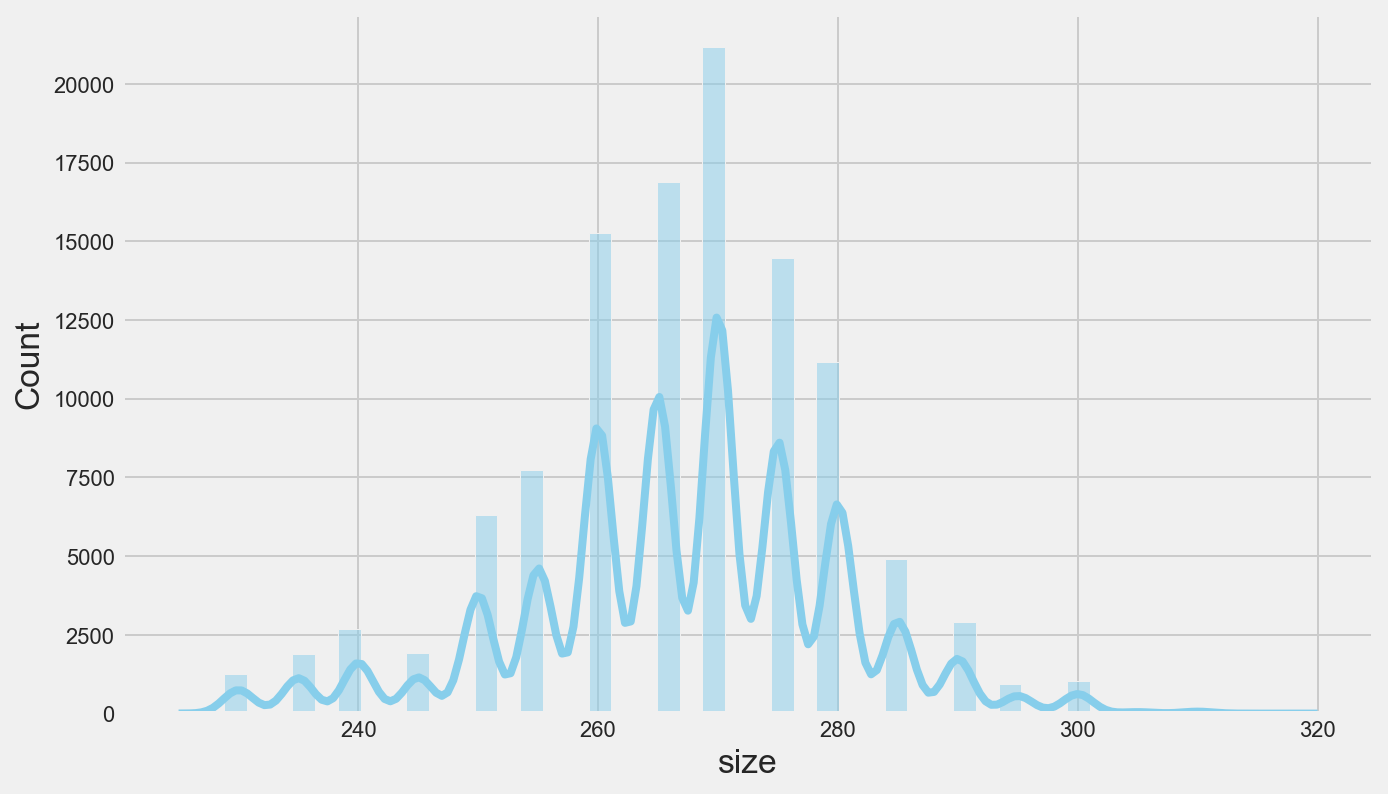

In [39]:
# size 
fig ,ax = plt.subplots(figsize = (10,6))
sns.histplot(df_men['size'], kde = True, ax = ax, color = 'skyblue', bins = 50)
plt.show()

In [40]:
df_men_date = pd.DataFrame(df_men['date'].value_counts())
df_men_date = df_men_date[df_men_date['date'] >=300]

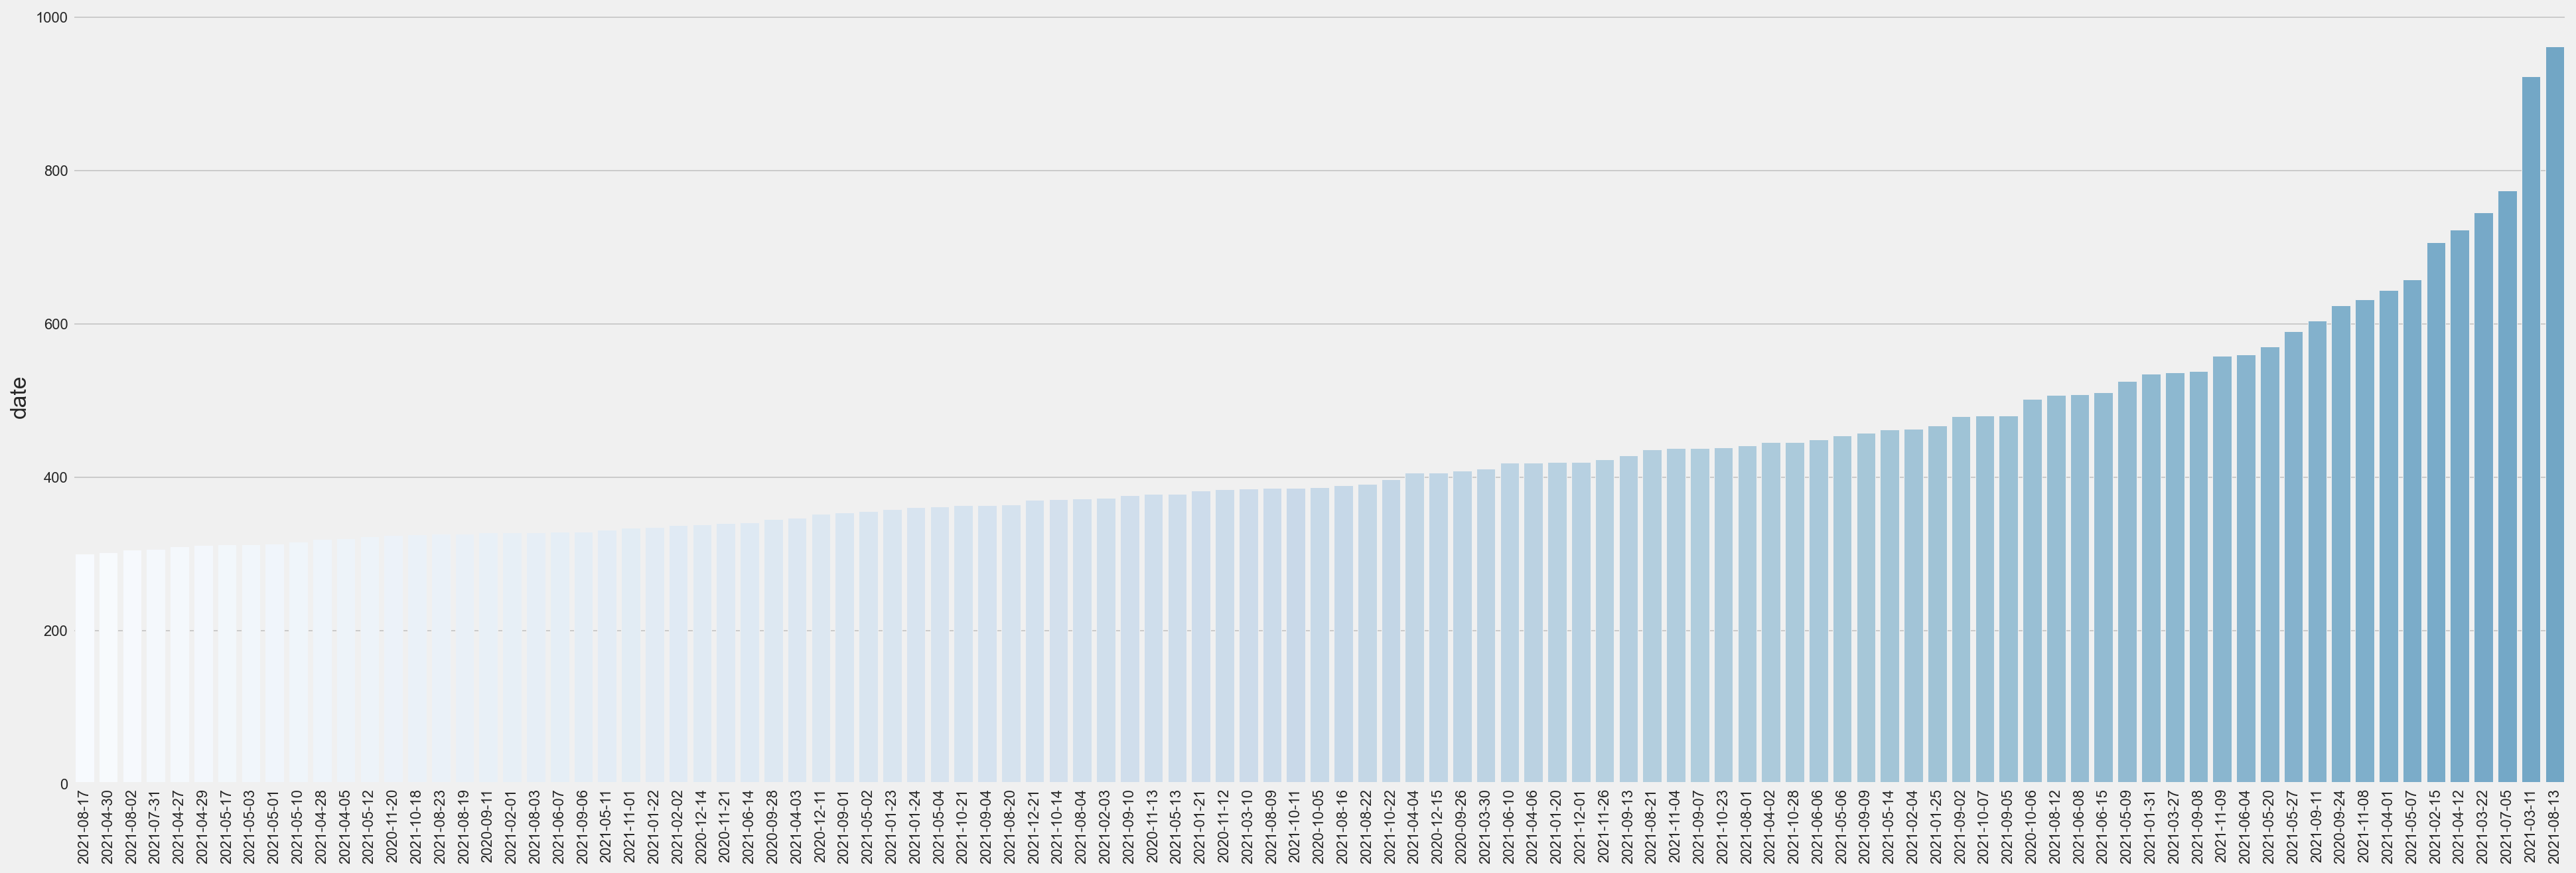

In [41]:
# 판매가 가장 많이 이루어진 날 
fig ,ax = plt.subplots(figsize = (30,10))
sns.set_palette("Blues",200)
sns.barplot(df_men_date.index, 
            df_men_date ['date'].sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

In [42]:
df_men_size_p = df_men.groupby('size')['price'].median().round(0)

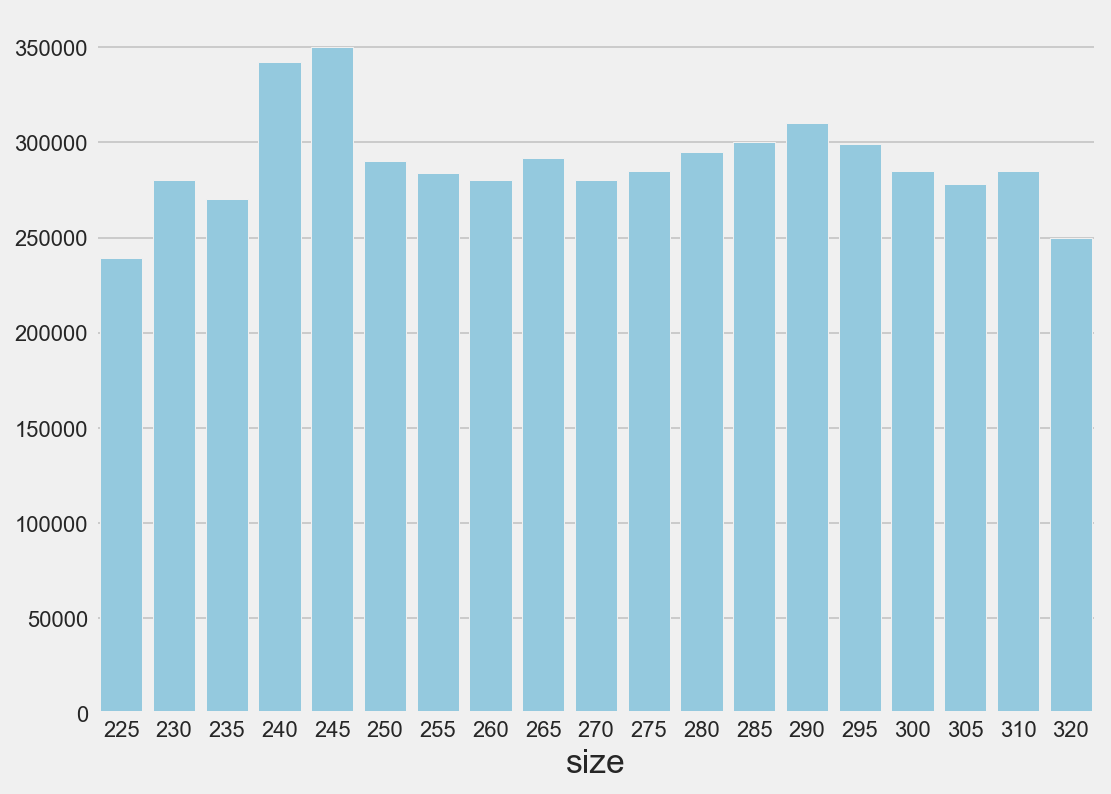

In [43]:
# 사이즈 따른 가격

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(df_men_size_p.index , df_men_size_p.values , ax = ax, color = 'skyblue')
plt.show()

In [44]:
df_men_pp = np.round(df_men.groupby('product')['price'].median(),-1).sort_values(ascending = True)

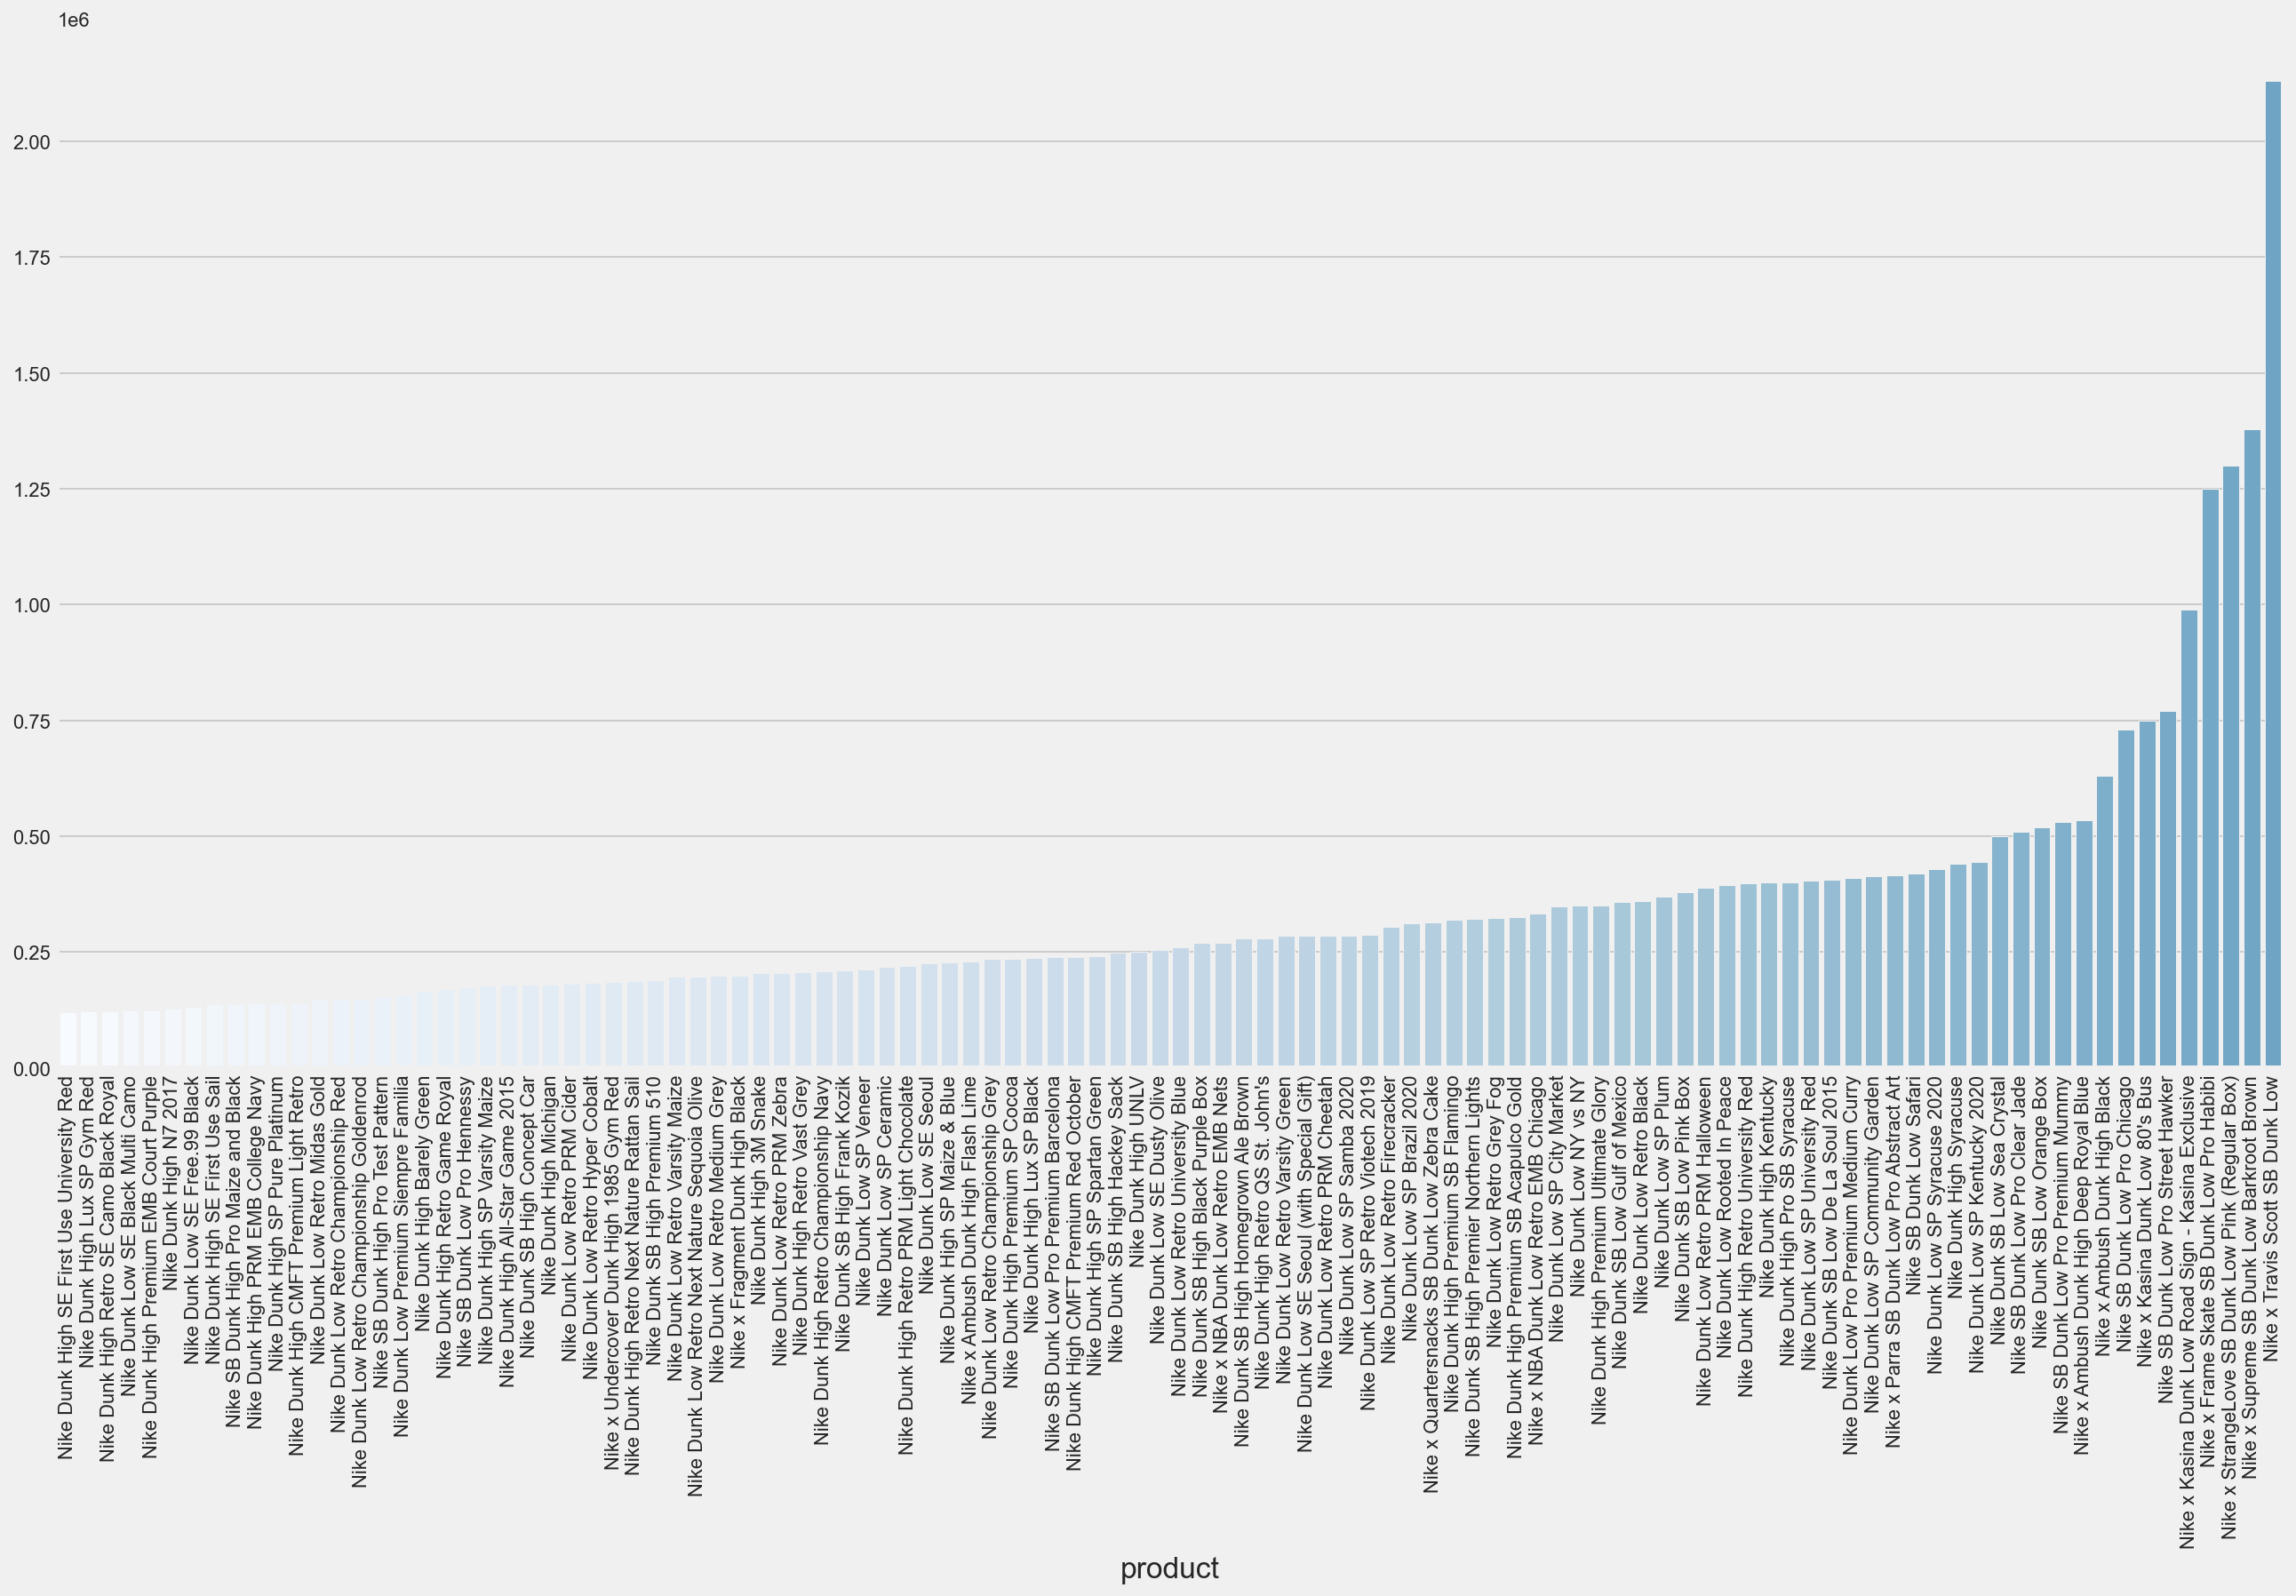

In [45]:
fig ,ax = plt.subplots(figsize = (20,10))
sns.barplot(df_men_pp.index,df_men_pp.values ,ax = ax)
plt.xticks(rotation = 90)
plt.show()

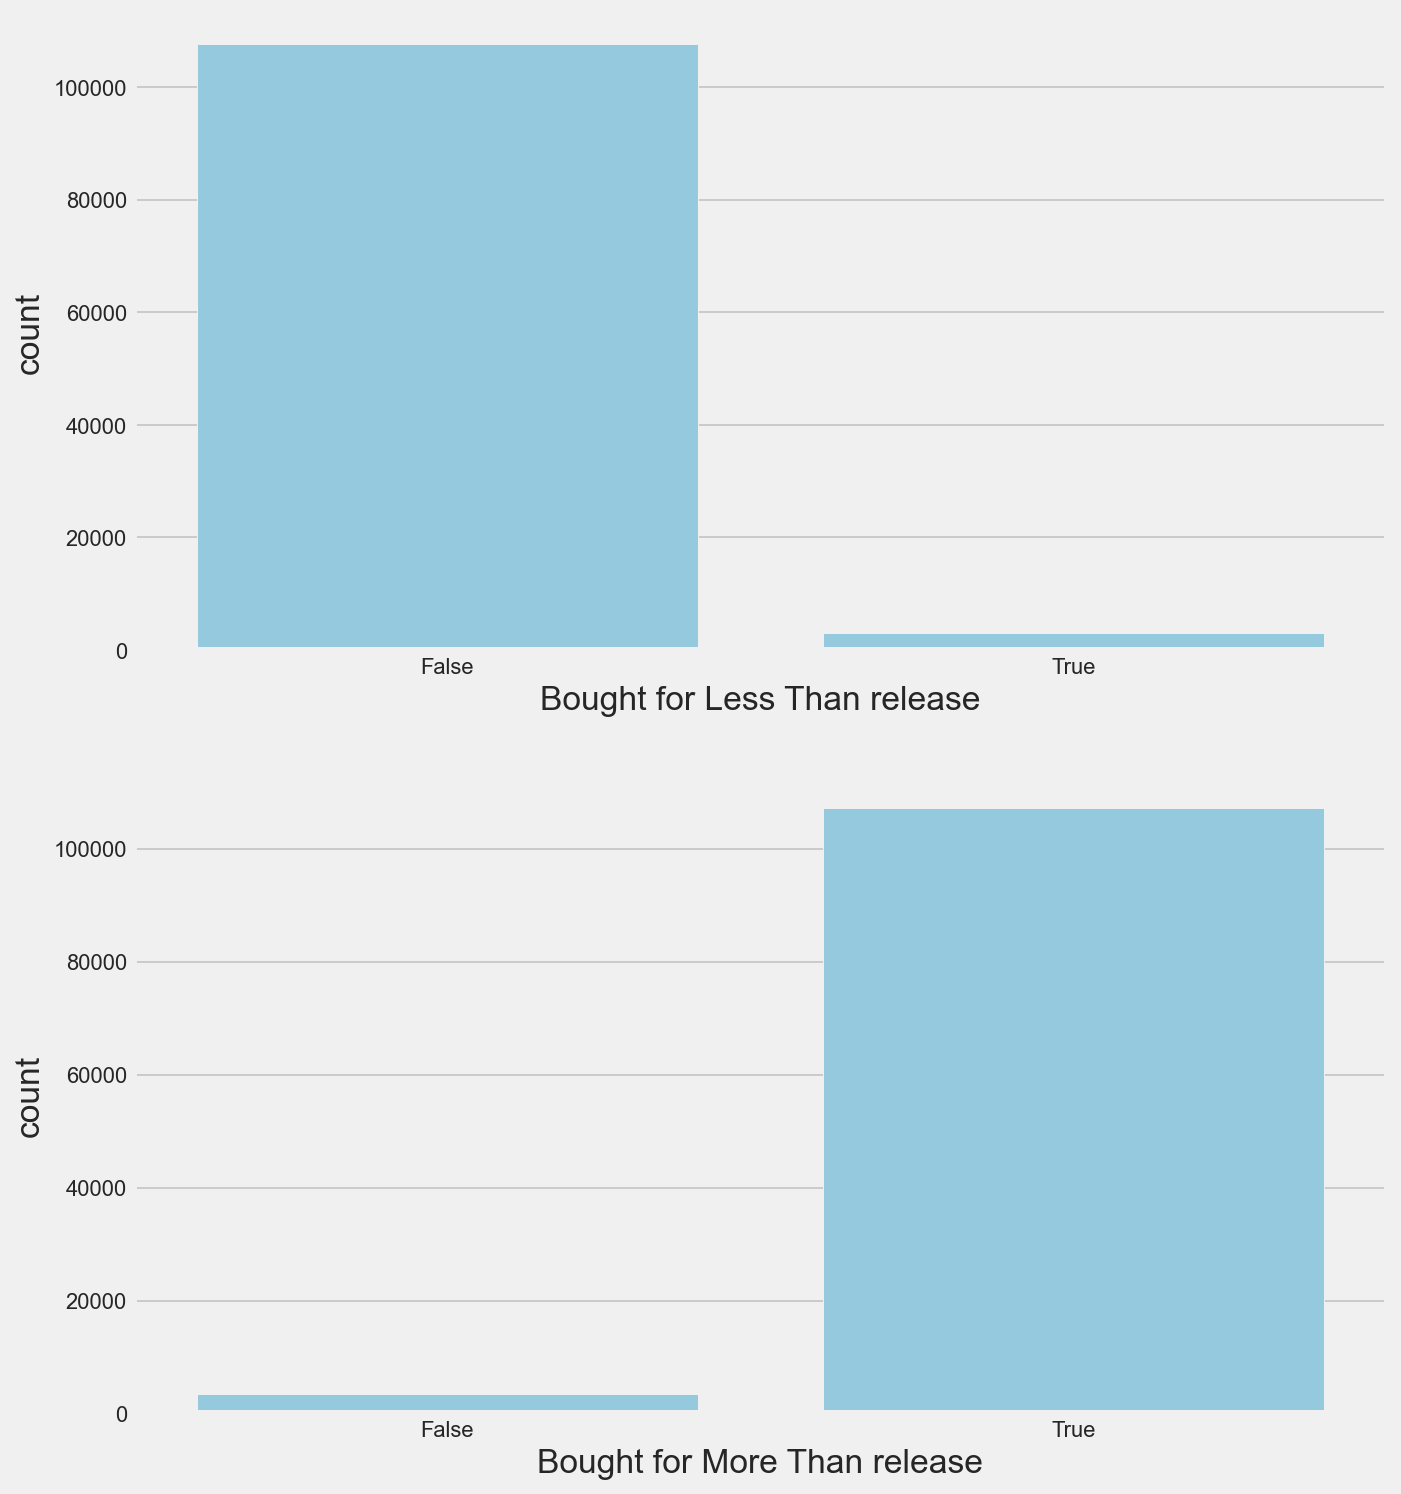

In [46]:
fig , (ax0, ax1) = plt.subplots(2,1 , figsize = (10, 12))

sns.countplot(df_men['Bought for Less Than release'],color = 'skyblue', ax = ax0)
sns.countplot(df_men['Bought for More Than release'],color = 'skyblue', ax = ax1)
plt.show()

In [47]:
# 발매가 보다 낮게 판매된 제품 
set(df_men[df_men['Bought for Less Than release'] == True]['product'])

{'Nike Dunk High All-Star Game 2015',
 'Nike Dunk High Barely Green',
 'Nike Dunk High CMFT Premium Light Retro',
 'Nike Dunk High Lux SP Black',
 'Nike Dunk High Lux SP Gym Red',
 'Nike Dunk High PRM EMB College Navy',
 'Nike Dunk High Premium EMB Court Purple',
 'Nike Dunk High Retro Next Nature Rattan Sail',
 'Nike Dunk High Retro SE Camo Black Royal',
 'Nike Dunk High SE First Use Sail',
 'Nike Dunk High SE First Use University Red',
 'Nike Dunk High SP Pure Platinum',
 'Nike Dunk Low SE Black Multi Camo',
 'Nike Dunk Low SE Free.99 Black',
 'Nike Dunk SB High Premium 510',
 'Nike SB Dunk High Pro Maize and Black',
 'Nike SB Dunk High Pro Test Pattern',
 'Nike x Ambush Dunk High Flash Lime',
 'Nike x Fragment Dunk High Black',
 'Nike x Undercover Dunk High 1985 Gym Red'}

In [48]:
df_men_re_10 = np.round(df_men.groupby('product')['release_price'].mean(),0).sort_values(ascending = False).head(10)
df_men_p_10 =np.round(df_men.groupby('product')['price'].mean(),0).sort_values(ascending = False).head(10)

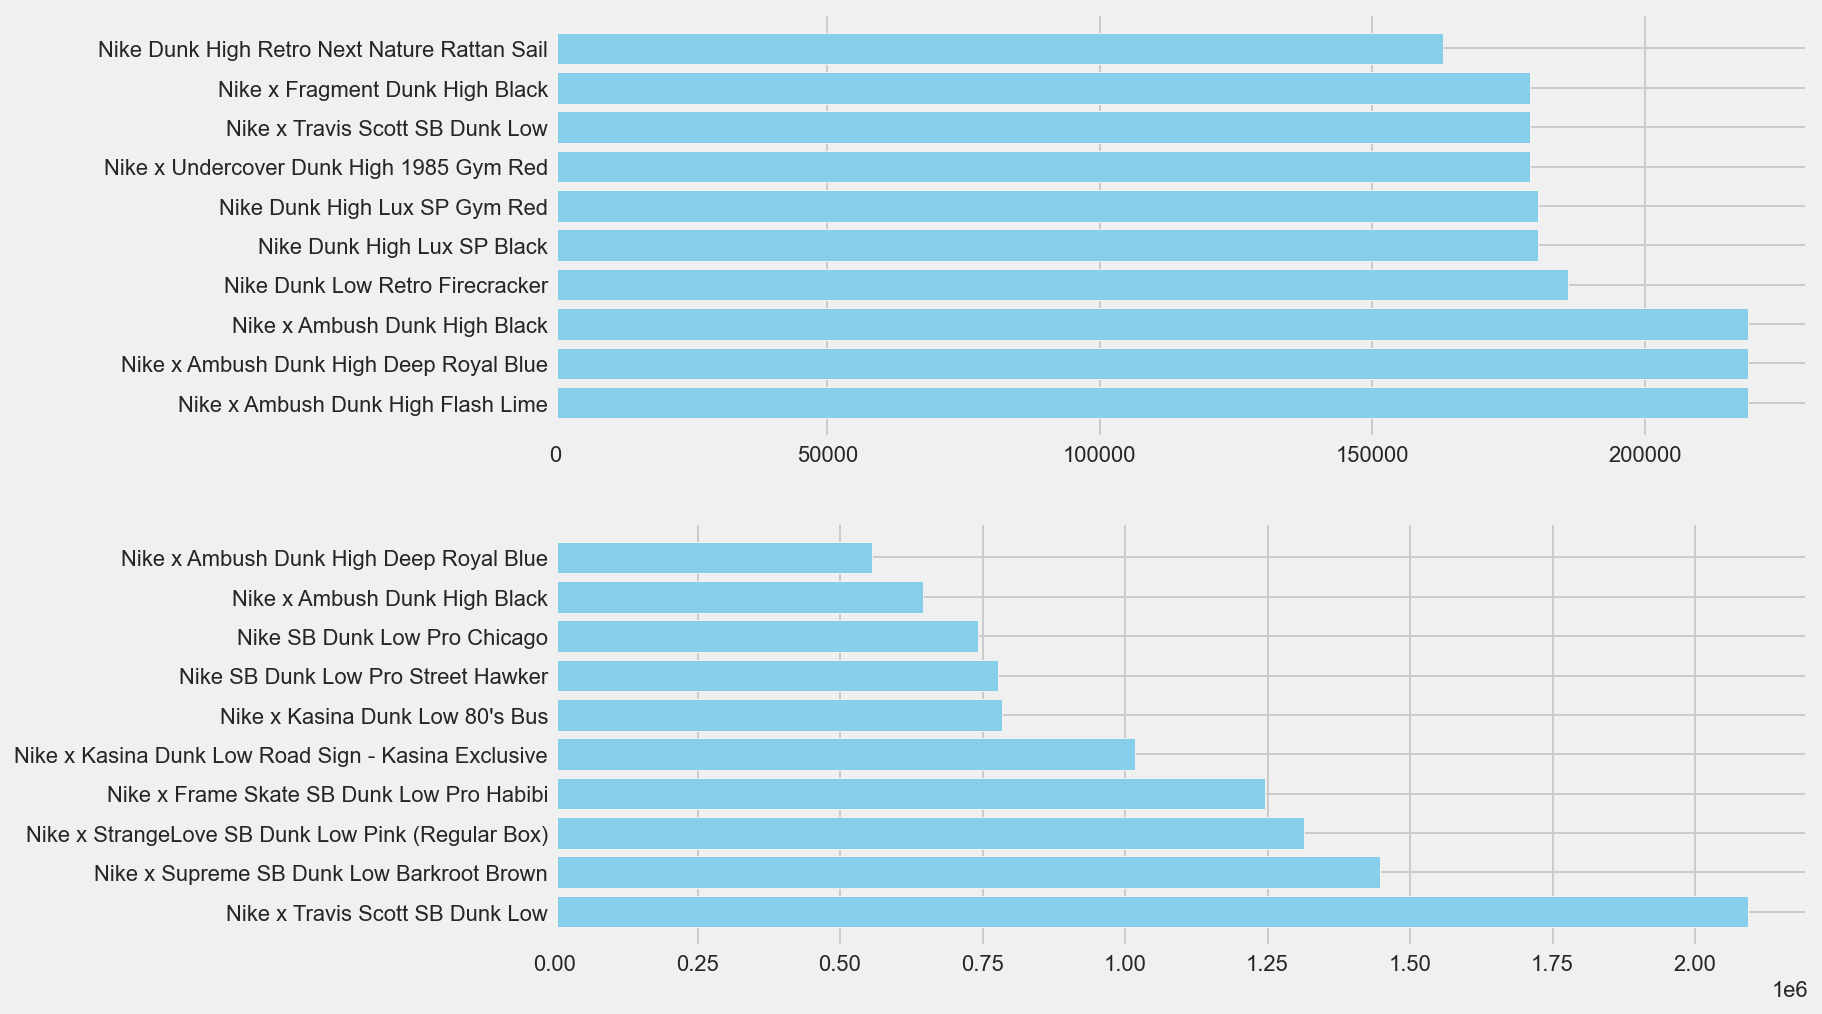

In [49]:
# 남성 신발 기준 발매가 상위품목과 현재 판매가 상위 품목 비교 

fig,axes = plt.subplots(2,1, figsize = (10,8))
axes[0].barh(df_men_re_10.index , df_men_re_10.values   , color = "skyblue")
axes[1].barh(df_men_p_10.index , df_men_p_10.values   , color = "skyblue")
plt.show()

In [50]:
# 가격 상승률이 높은 제품 
df_men_Rise = pd.DataFrame(df_men.groupby('product')['Rise'].mean().round(2).sort_values(ascending = True))
df_men_Rise.head(3)

Rise
product                                        
Nike Dunk High Lux SP Gym Red             68.18
Nike Dunk High Premium EMB Court Purple   89.53
Nike Dunk High Retro SE Camo Black Royal  90.93

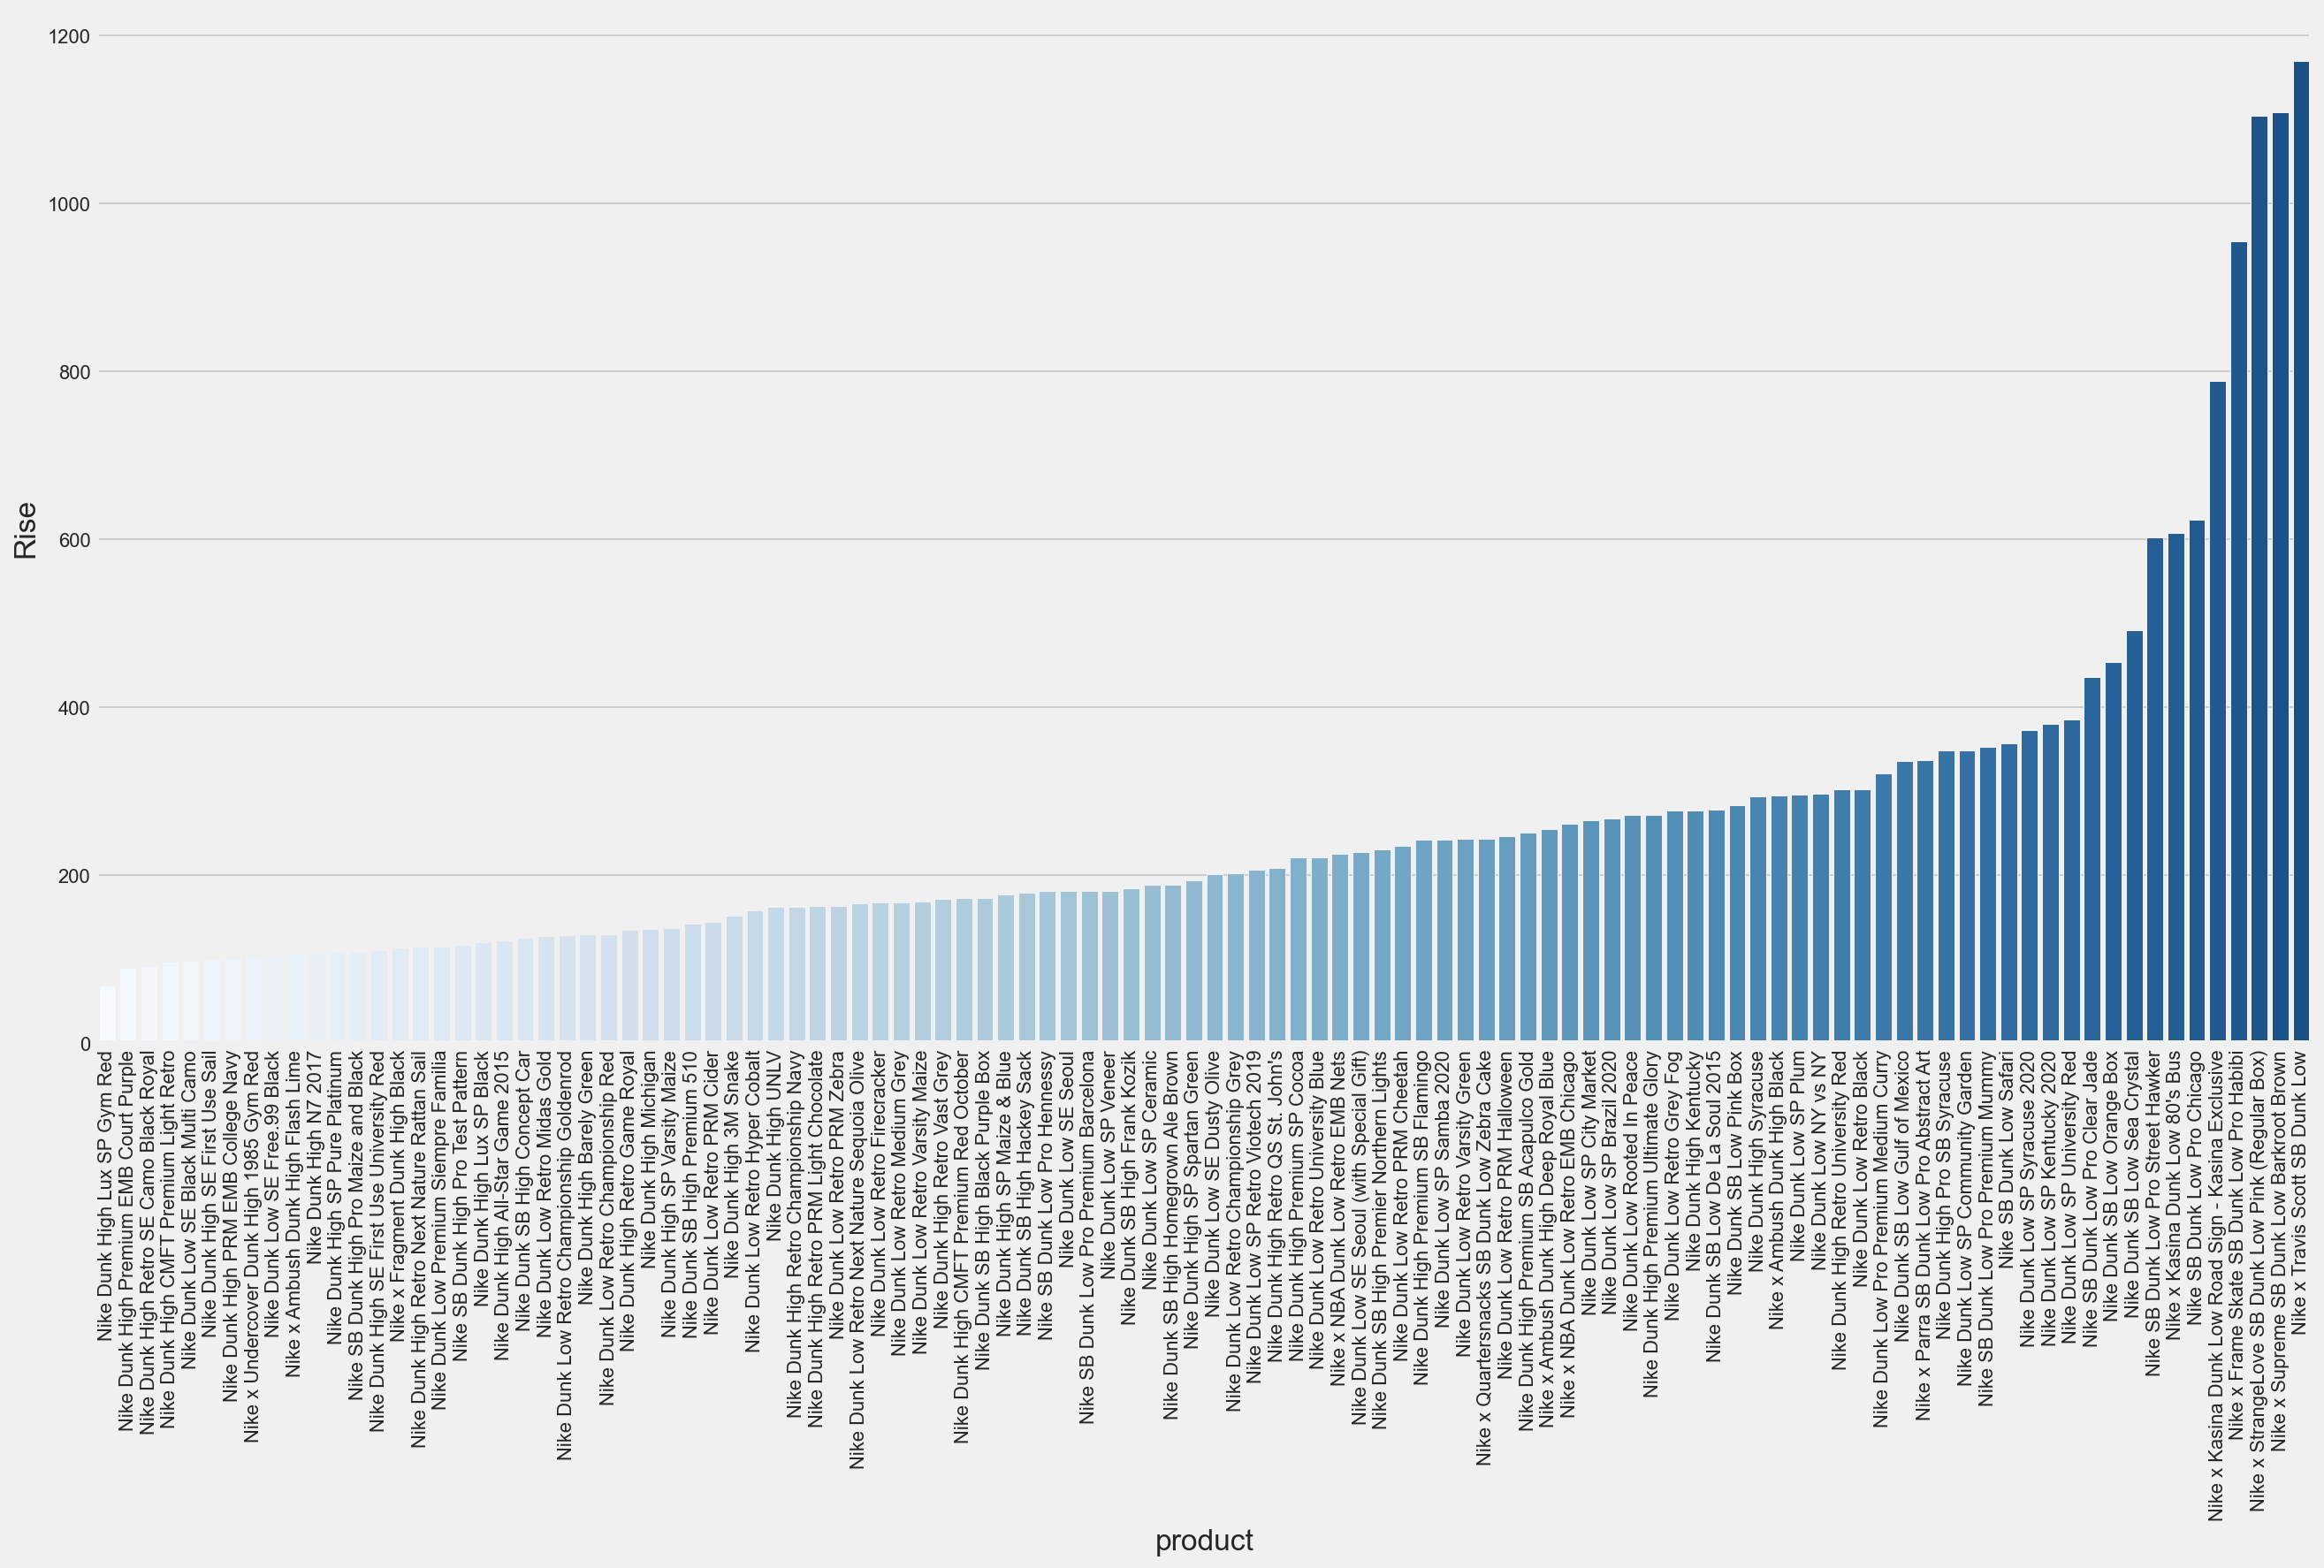

In [51]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.set_palette("Blues",120)
sns.barplot(df_men_Rise.index , df_men_Rise['Rise'], ax =ax )
plt.xticks(rotation = 90)
plt.show()

In [52]:
# 남성 제품 중 소비자들이 사고 싶은 신발 top 10
df_men.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10)

product
Nike Dunk Low Retro Black                  52000.0
Nike Dunk Low Retro Varsity Green          24000.0
Nike Dunk High Retro Championship Navy     16000.0
Nike Dunk Low Retro University Blue        16000.0
Nike Dunk Low Retro Grey Fog               16000.0
Nike Dunk Low SE Seoul                     12000.0
Nike Dunk Low Retro Varsity Maize          12000.0
Nike x Kasina Dunk Low 80's Bus            11000.0
Nike Dunk Low Retro Championship Grey      11000.0
Nike x Ambush Dunk High Deep Royal Blue     9610.0
Name: wish, dtype: float64

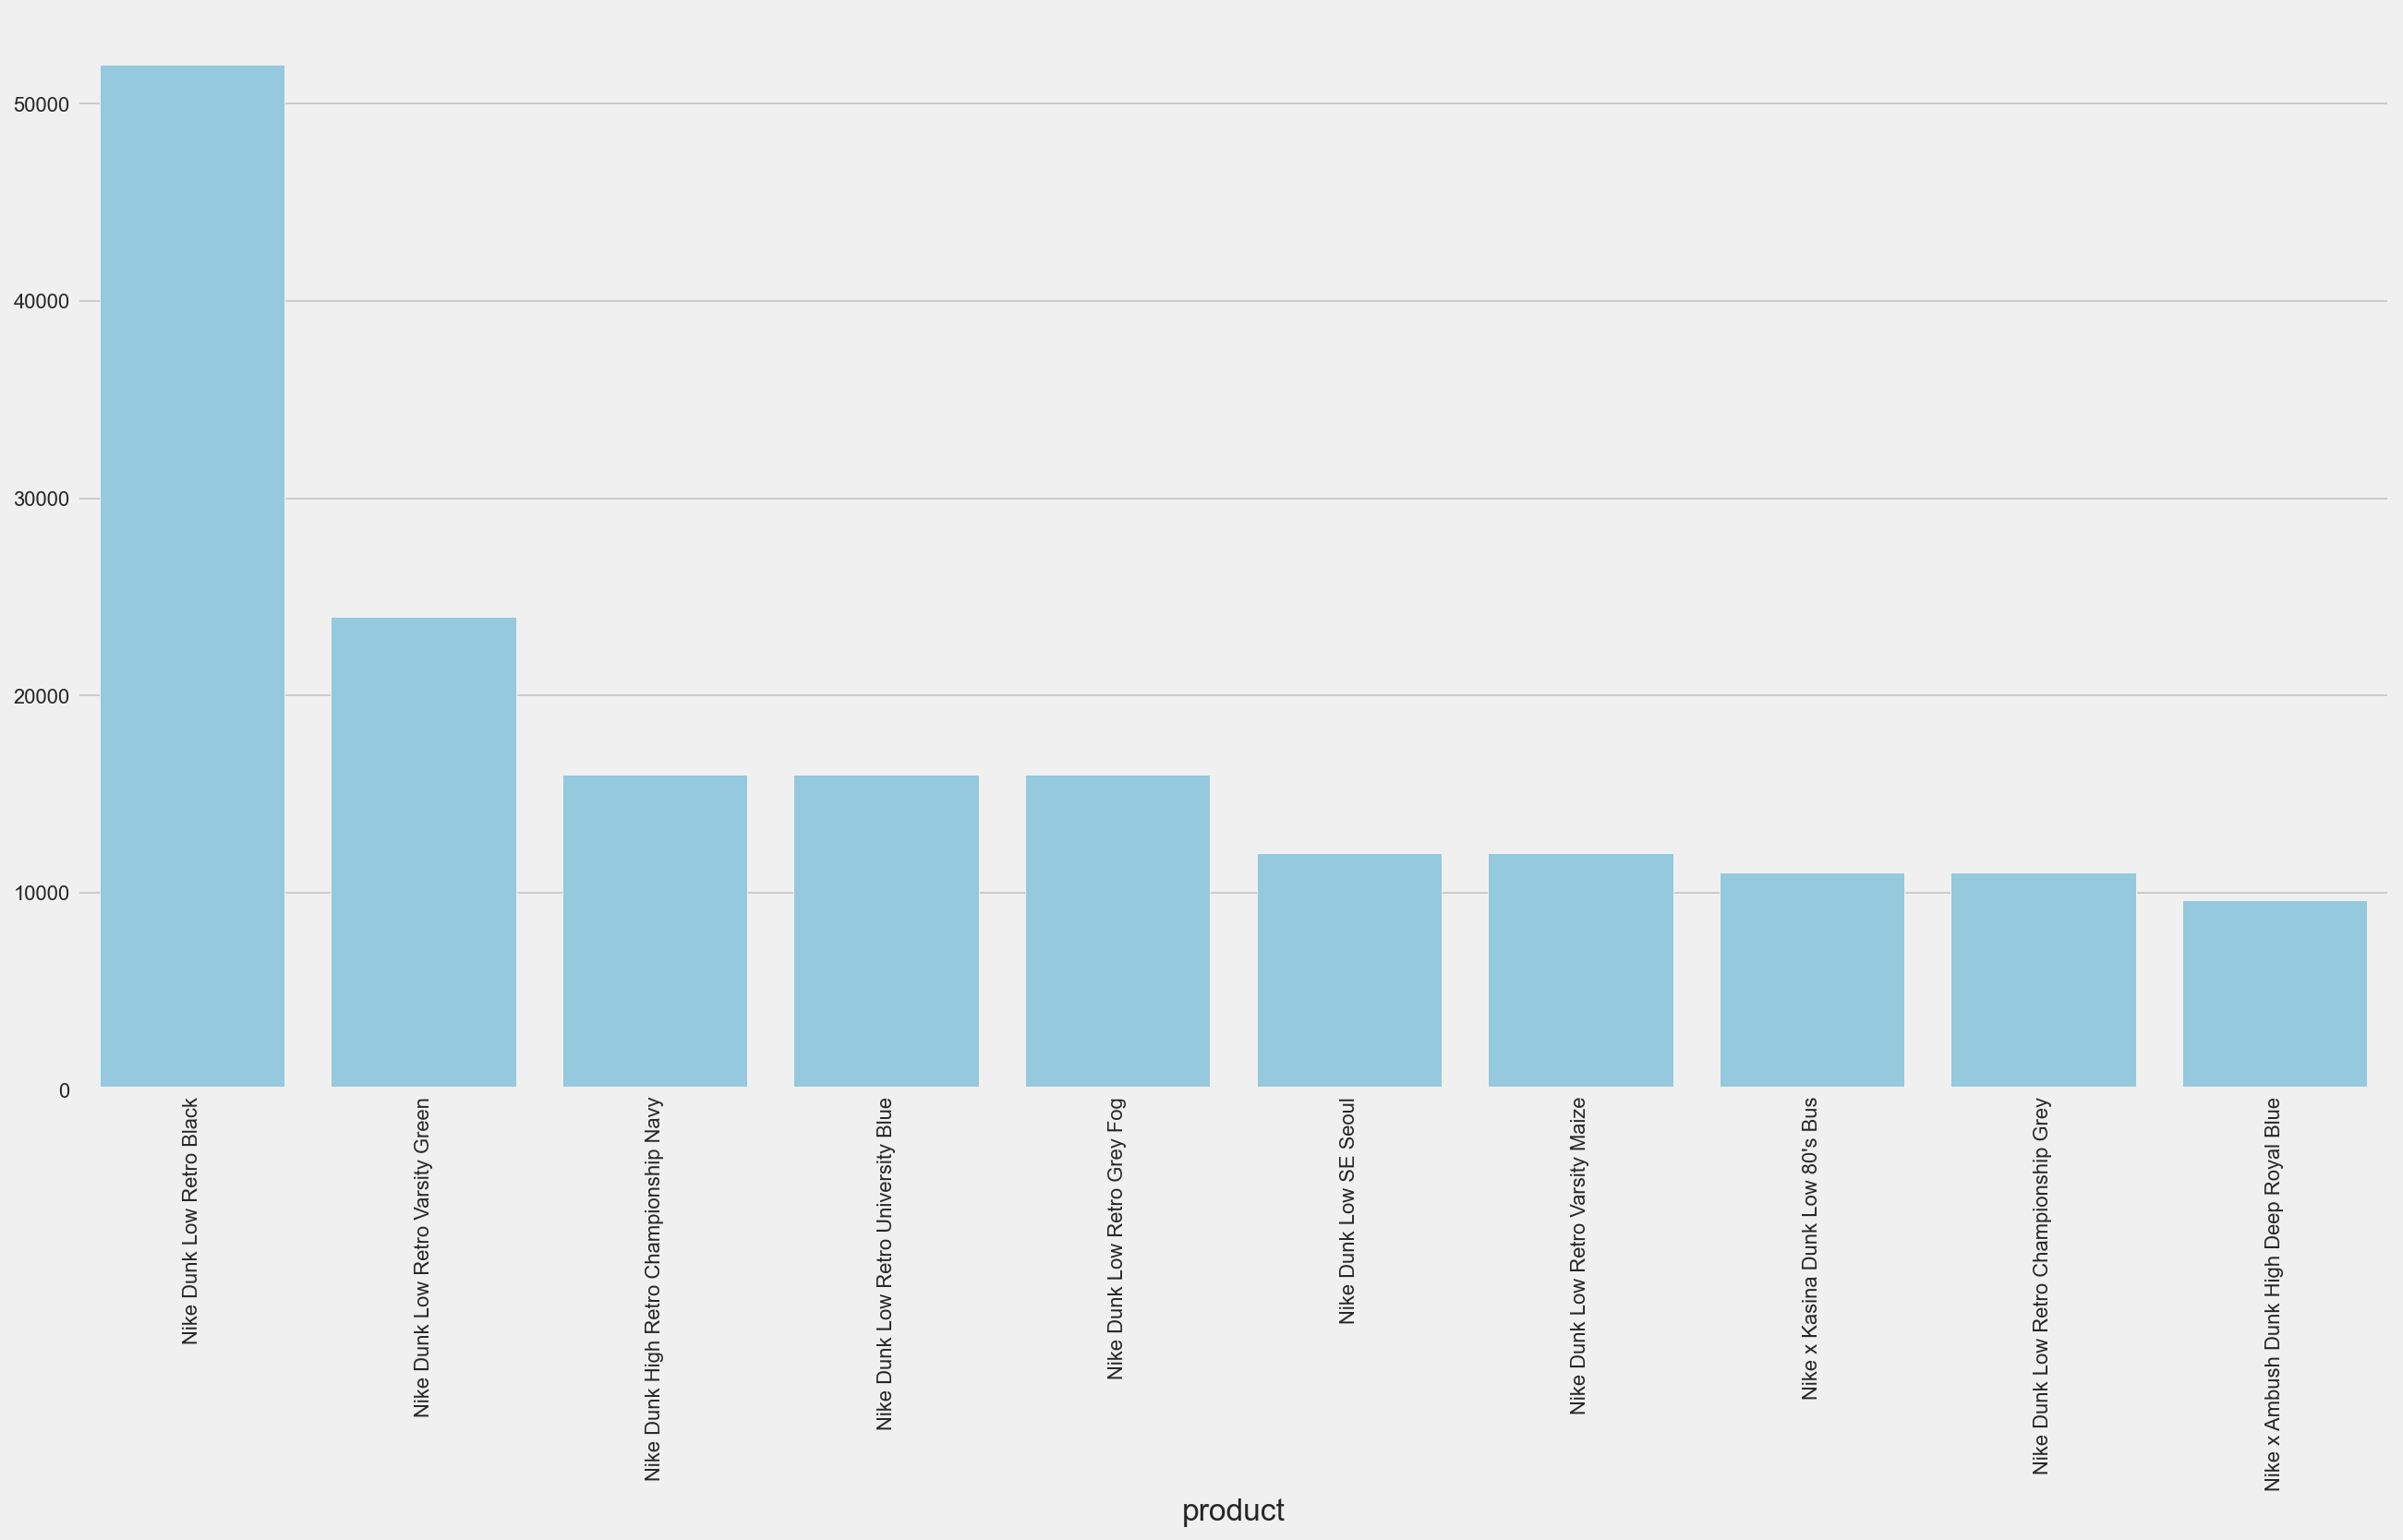

In [53]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.barplot(df_men.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).index,
            df_men.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).values , color = 'skyblue')
plt.xticks(rotation = 90 )
plt.show()

In [54]:
# 여성
df_women = df.loc[(df['product'].str.contains('(GS)')) | (df['product'].str[:3] == '(W)')]
df_women.head()

size   price        date                            product release_date  \
0   235  124000  2021-11-14  (W) Nike Dunk Low SE Primal Black   2021-11-07   
1   255  149000  2021-11-18  (W) Nike Dunk Low SE Primal Black   2021-11-07   
2   240  120000  2021-11-24  (W) Nike Dunk Low SE Primal Black   2021-11-07   
3   240  124000  2021-11-29  (W) Nike Dunk Low SE Primal Black   2021-11-07   
4   225   90000  2021-12-03  (W) Nike Dunk Low SE Primal Black   2021-11-07   

                     color  release_price brand   category   number  wish  \
0  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
1  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
2  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
3  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   
4  BLACK/MULTI-COLOR/BLACK         129000  Nike  Nike Dunk  41947.0  93.0   

   review  transactions type sex  Collabo Collabo_brand  after_day  \
0     4.0            30  Low   W    False          None          7   
1     4.0            30  Low   W    False          None         11   
2     4.0            30  Low   W    False          None         17   
3     4.0            30  Low   W    False          None         22   
4     4.0            30  Low   W    False          None         26   

   after_day_log  date_unix  release_date_unix  Bought for Less Than release  \
0       1.945910     738108             738101                          True   
1       2.397895     738112             738101                         False   
2       2.833213     738118             738101                          True   
3       3.091042     738123             738101                          True   
4       3.258097     738127             738101                          True   

   Bought for More Than release    Rise  
0                         False   96.12  
1                          True  115.50  
2                         False   93.02  
3                         False   96.12  
4                         False   69.77

In [55]:
# product 
df_women_product_count = pd.DataFrame(df_women['product'].value_counts().sort_values(ascending = True))
df_women_product_count = df_women_product_count[df_women_product_count['product']>= 1060]
df_women_product_count.head()

product
(W) Nike Dunk Low Disrupt Black White     1176
(W) Nike Dunk High Football Grey          1179
(W) Nike Dunk High Orange Blaze           1208
(W) Nike Dunk Low Archeo Pink             1233
(W) Nike Dunk Low SE Candy                1319

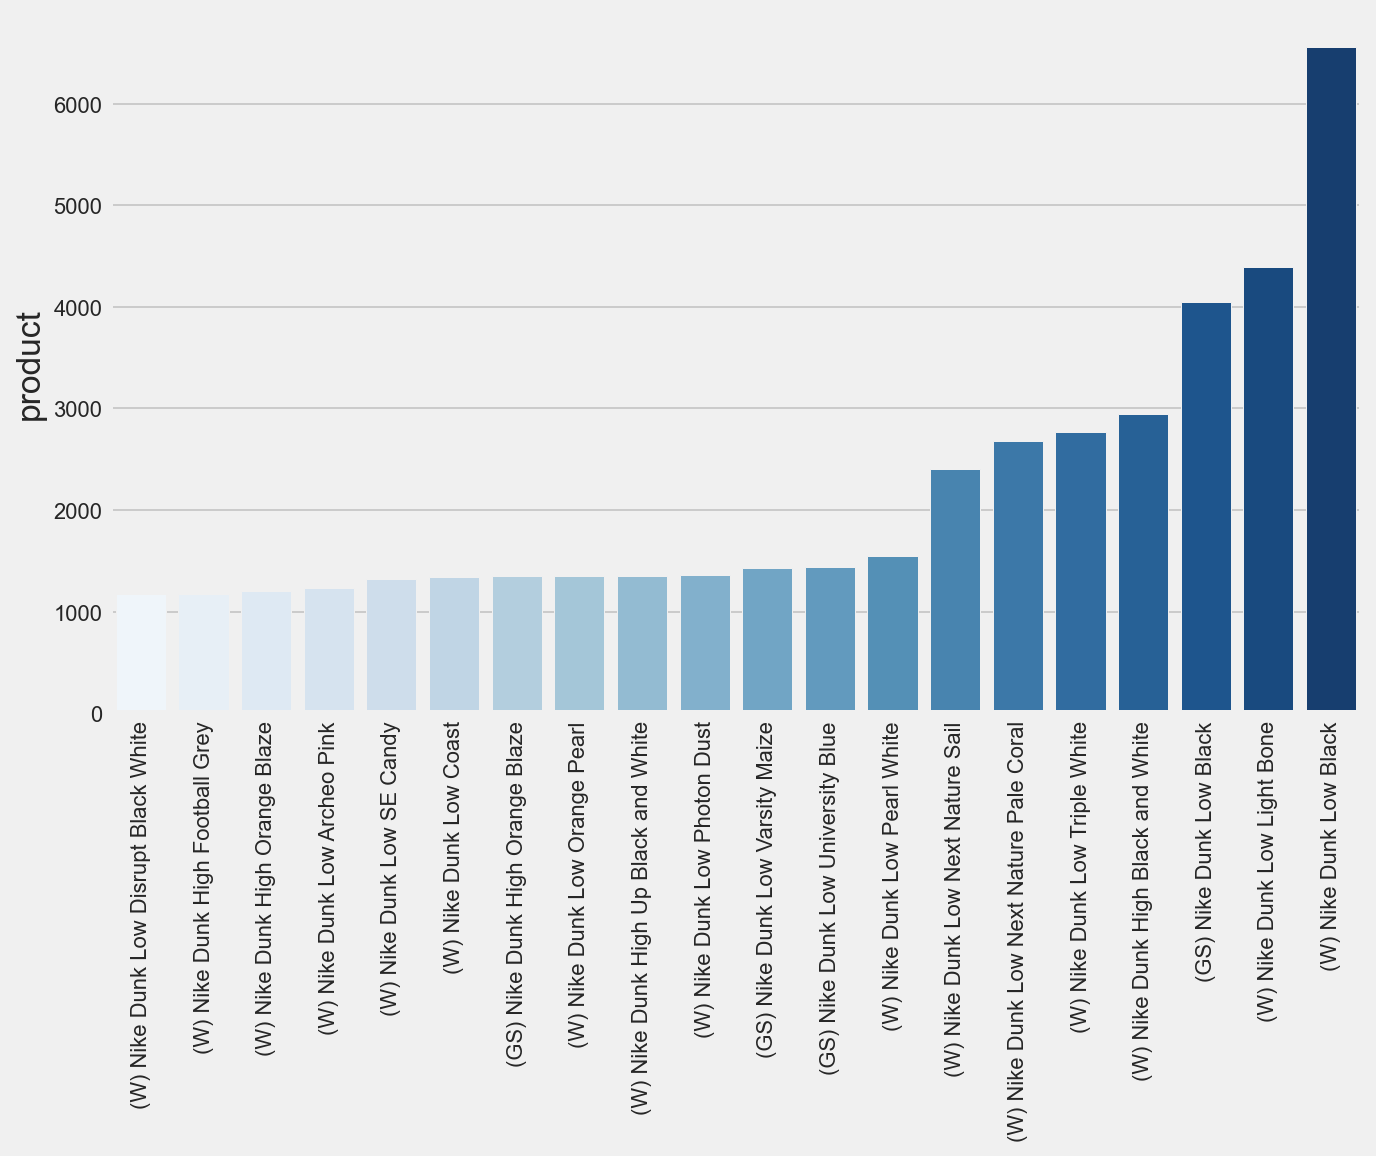

In [56]:
fig ,ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues", 20)
sns.barplot(df_women_product_count.index ,df_women_product_count['product'] ,ax = ax )
plt.xticks(rotation = 90)
plt.show()

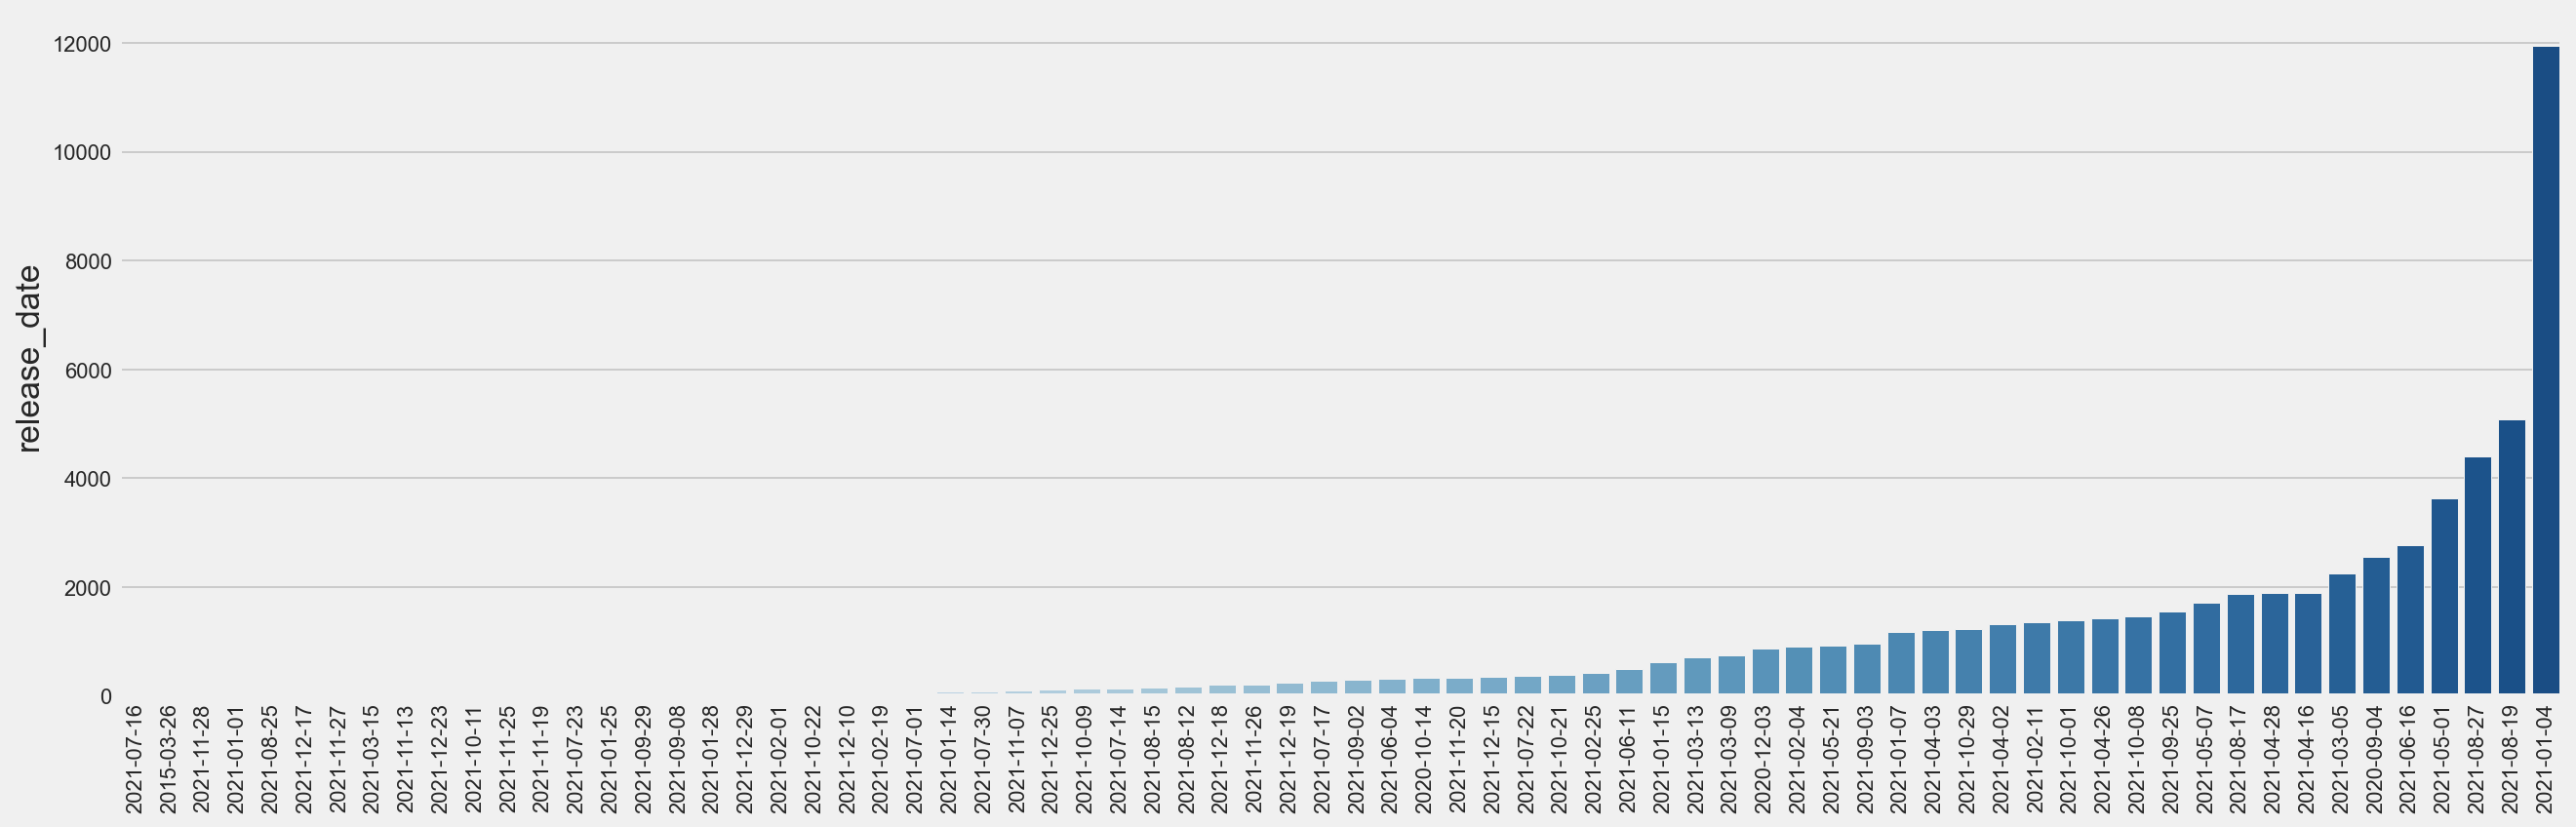

In [74]:
# release date
fig ,ax = plt.subplots(figsize = (20,6))
sns.set_palette("Blues", 80)
sns.barplot(df_women['release_date'].value_counts().sort_values(ascending = True).index, 
            df_women['release_date'].value_counts().sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

In [58]:
df_women_date = pd.DataFrame(df_women['date'].value_counts())
df_women_date = df_women_date[df_women_date['date'] >=300]

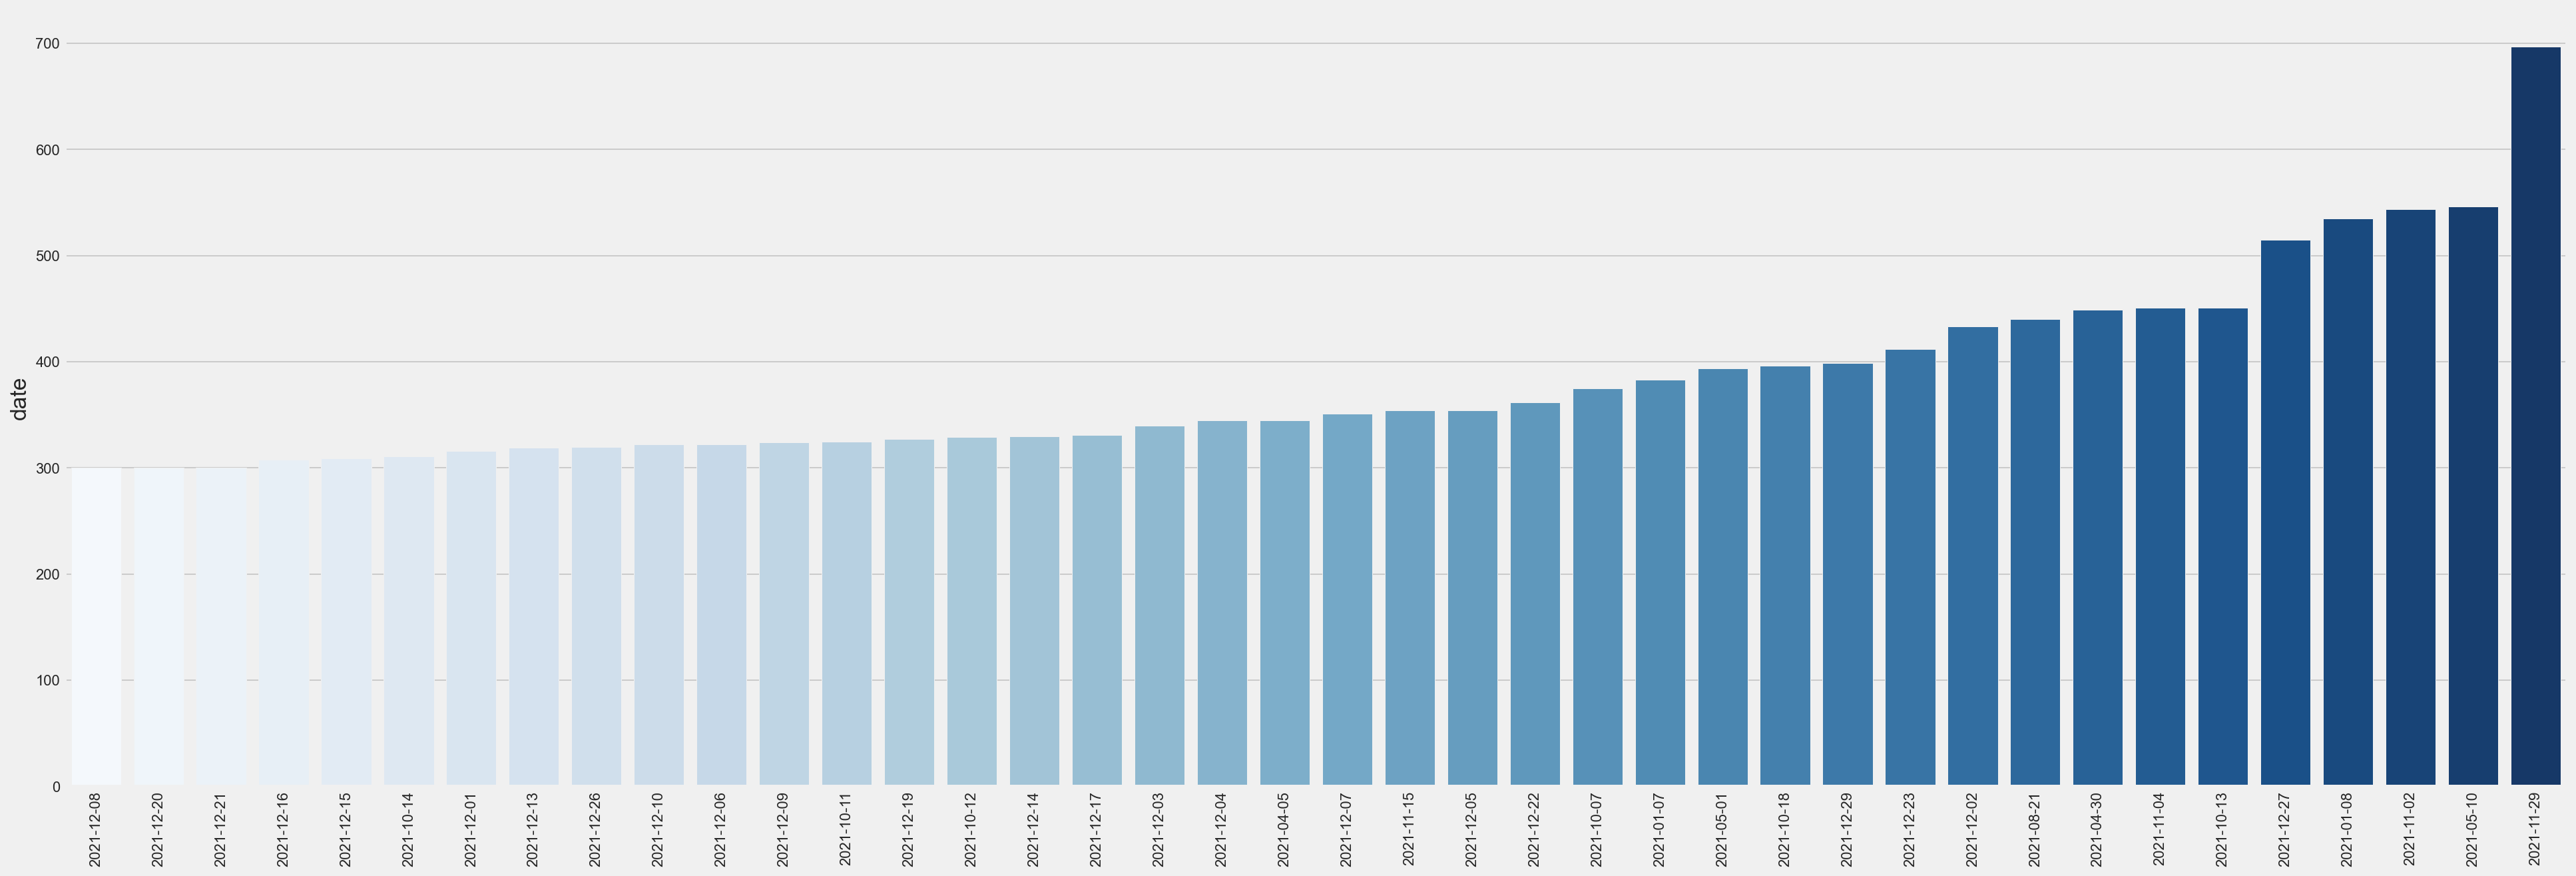

In [72]:
# 판매가 가장 많이 이루어진 날 
fig ,ax = plt.subplots(figsize = (30,10))
sns.set_palette("Blues",40)
sns.barplot(df_women_date.index, 
            df_women_date ['date'].sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

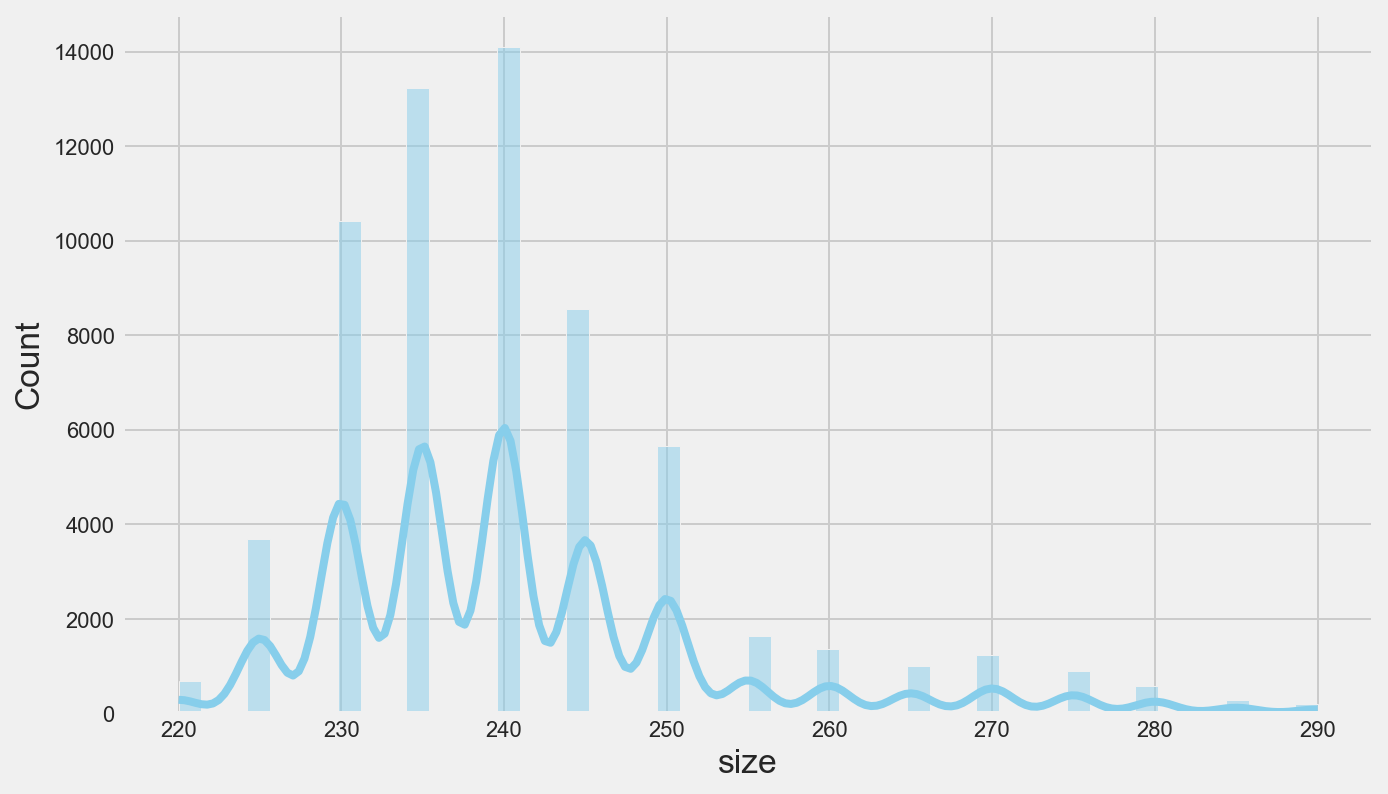

In [60]:
# size 
fig ,ax = plt.subplots(figsize = (10,6))
sns.histplot(df_women['size'], kde = True, ax = ax, color = 'skyblue',bins=  50)
plt.show()

In [61]:
df_women_size_p = df_women.groupby('size')['price'].median().round(0)

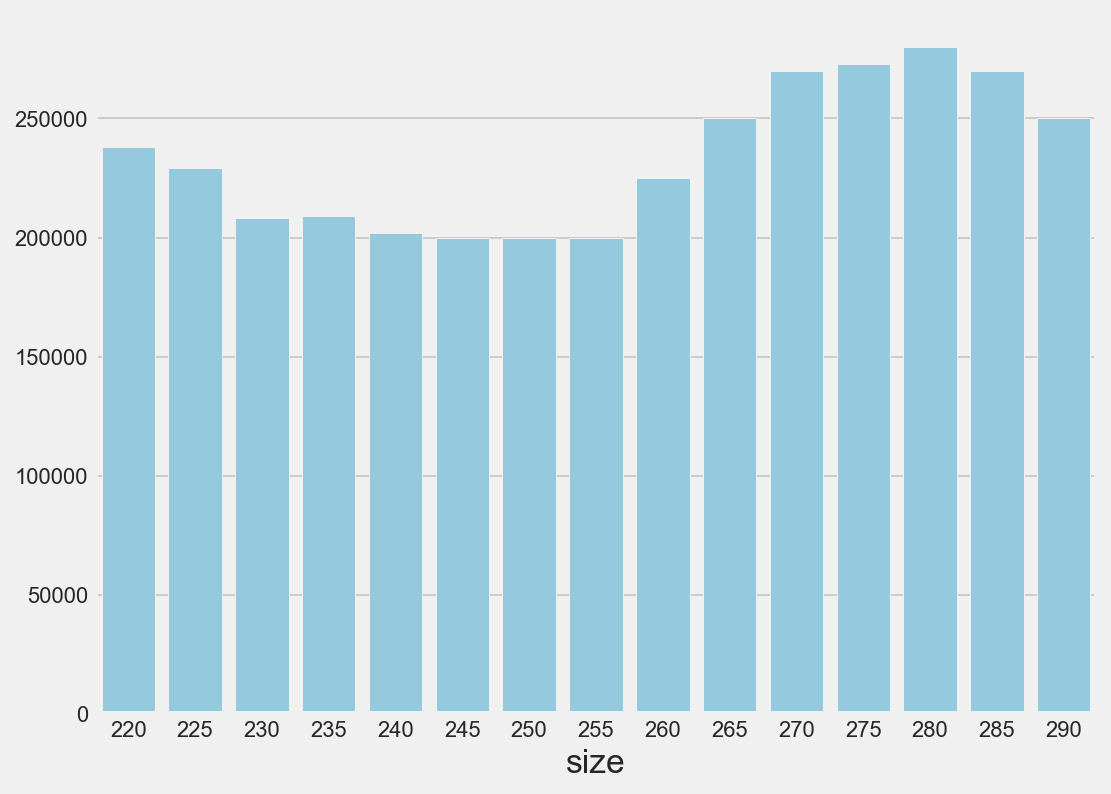

In [62]:
# 사이즈 따른 가격

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(df_women_size_p.index , df_women_size_p.values , ax = ax, color = 'skyblue')
plt.show()

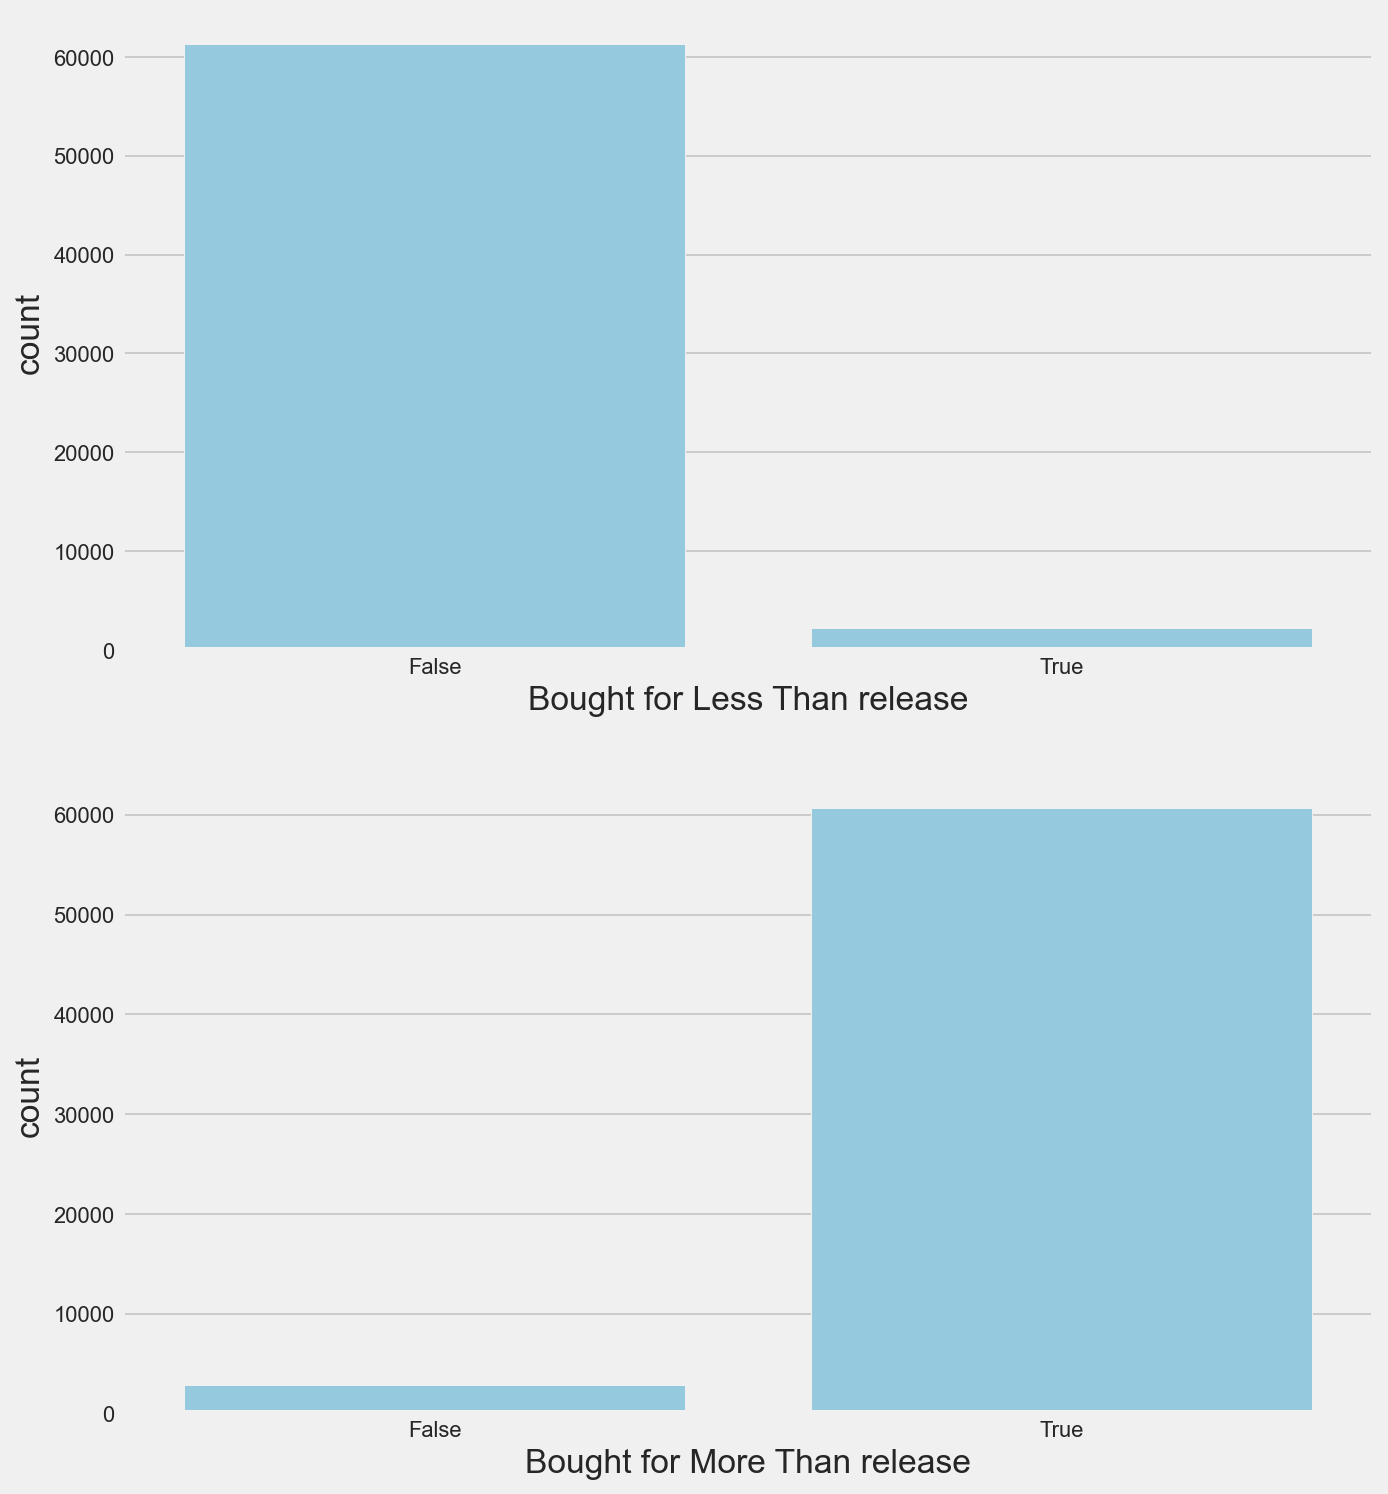

In [63]:
fig , (ax0, ax1) = plt.subplots(2,1 , figsize = (10, 12))

sns.countplot(df_women['Bought for Less Than release'],color = 'skyblue', ax = ax0)
sns.countplot(df_women['Bought for More Than release'],color = 'skyblue', ax = ax1)
plt.show()

In [64]:
# 발매가 보다 낮게 판매된 제품 수 
len(set(df_women[df_women['Bought for Less Than release'] == True]['product']))

47

In [65]:
df_women_re_10 = np.round(df_women.groupby('product')['release_price'].mean(),0).sort_values(ascending = False).head(10)
df_women_p_10 =np.round(df_women.groupby('product')['price'].mean(),0).sort_values(ascending = False).head(10)

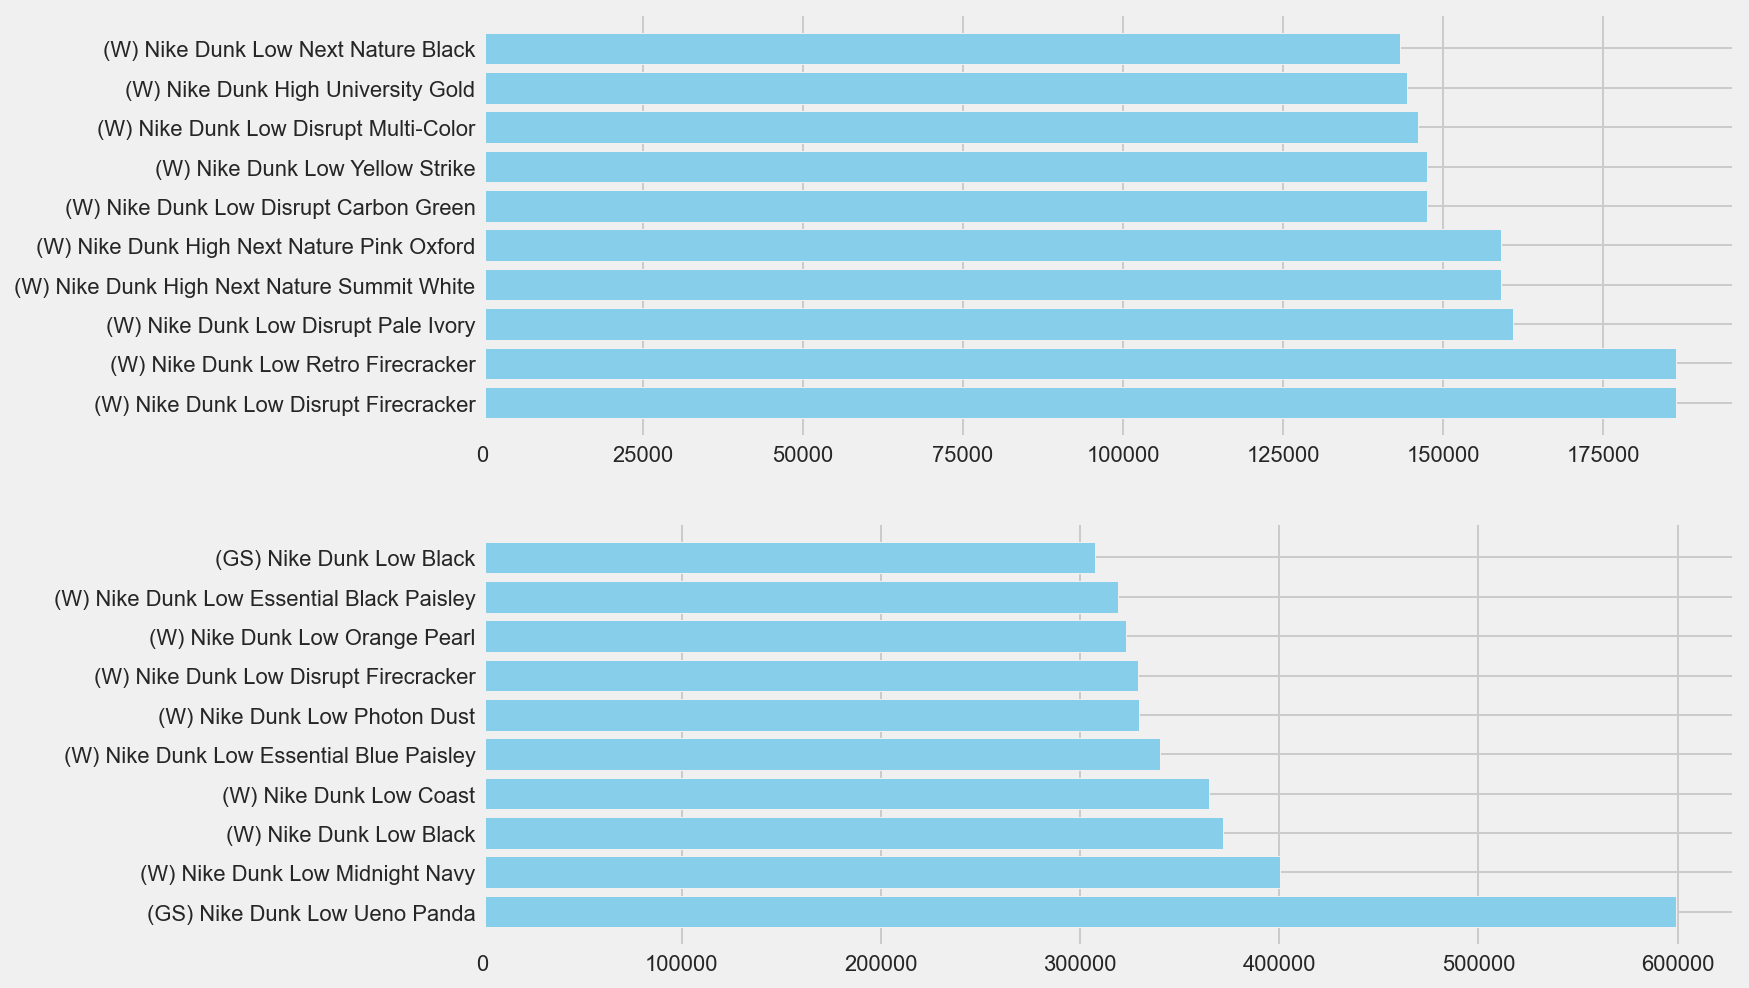

In [66]:
# 남성 신발 기준 발매가 상위품목과 현재 판매가 상위 품목 비교 

fig,axes = plt.subplots(2,1, figsize = (10,8))
axes[0].barh(df_women_re_10.index , df_women_re_10.values   , color = "skyblue")
axes[1].barh(df_women_p_10.index , df_women_p_10.values   , color = "skyblue")
plt.show()

In [67]:
# 가격 상승률이 높은 제품 
df_women_Rise = pd.DataFrame(df_women.groupby('product')['Rise'].mean().round(2).sort_values(ascending = True))
df_women_Rise.head(3)

Rise
product                                               
(W) Nike Dunk High Cashmere                      78.90
(W) Nike Dunk Low Disrupt University Red         83.07
(W) Nike Dunk High SE First Use University Gold  83.40

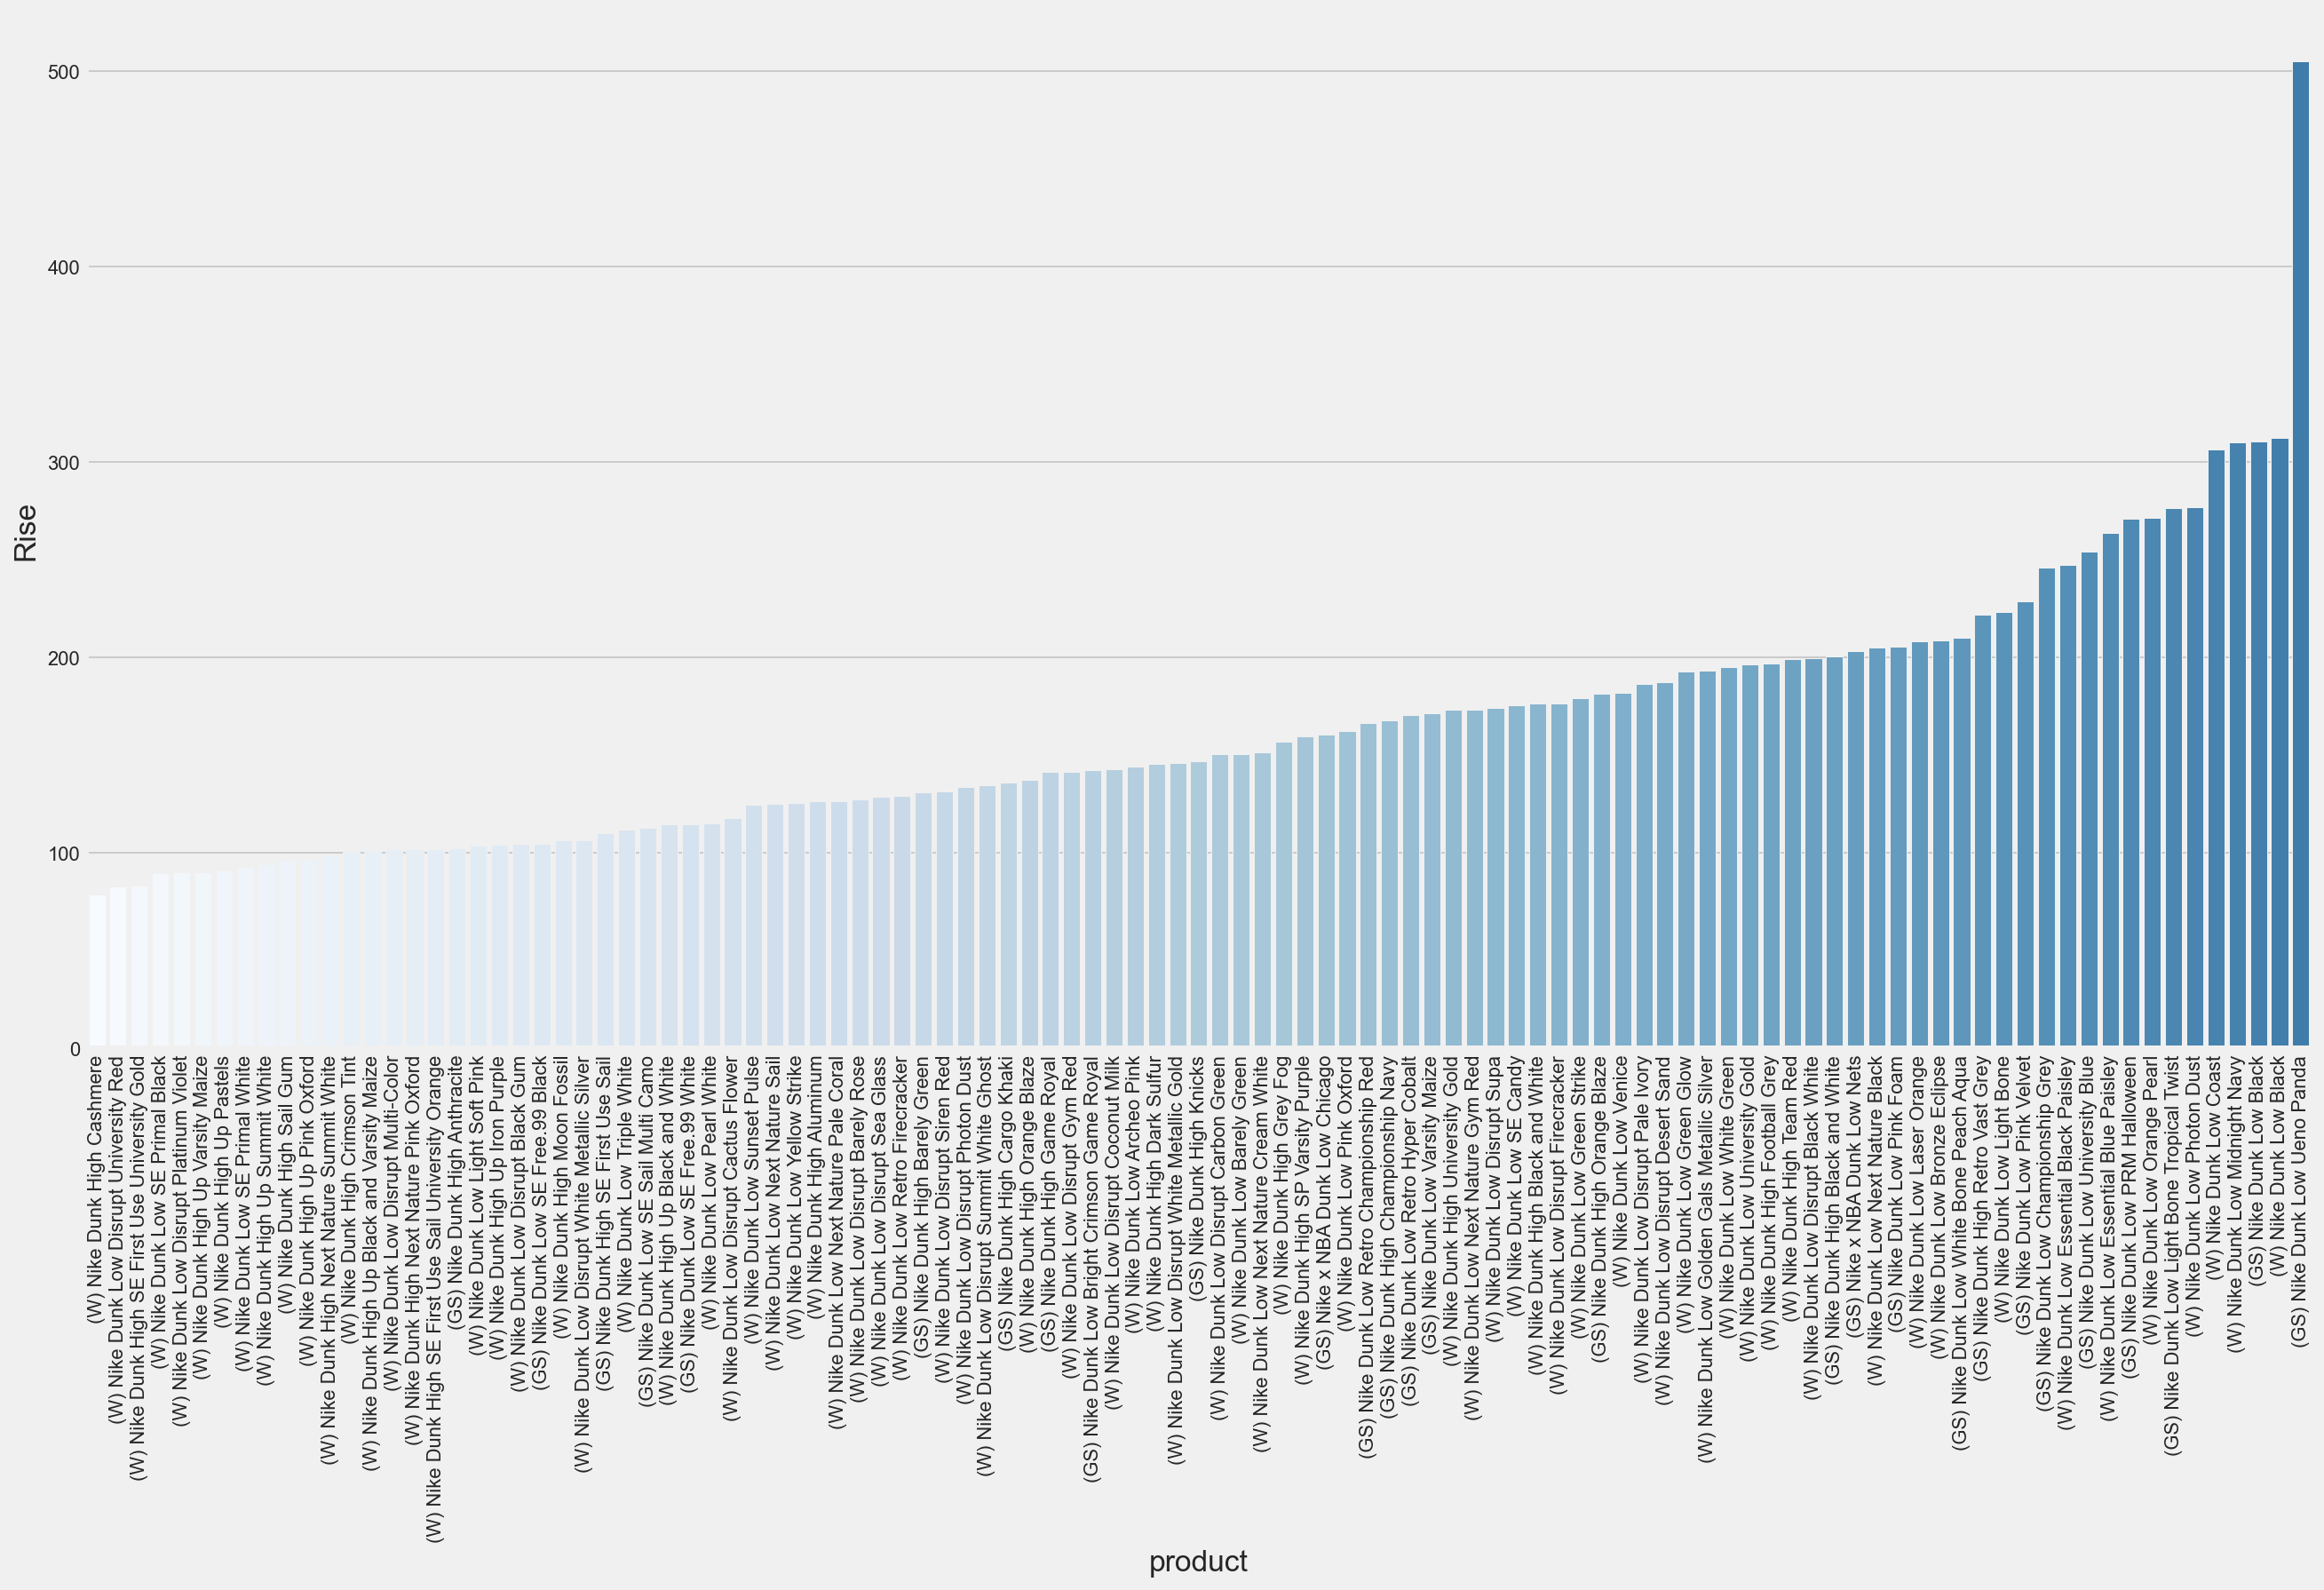

In [71]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.set_palette("Blues",150)
sns.barplot(df_women_Rise.index , df_women_Rise['Rise'], ax =ax )
plt.xticks(rotation = 90)
plt.show()

In [69]:
# 여성 제품 중 소비자들이 사고 싶은 신발 top 10
df_women.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10)

product
(W) Nike Dunk Low Black                     38000.0
(W) Nike Dunk Low Light Bone                21000.0
(GS) Nike Dunk Low Black                    17000.0
(W) Nike Dunk Low Coast                     16000.0
(W) Nike Dunk Low Photon Dust               13000.0
(W) Nike Dunk Low Next Nature Sail          10000.0
(W) Nike Dunk High Black and White           9875.0
(W) Nike Dunk Low Archeo Pink                9742.0
(W) Nike Dunk Low Triple White               9150.0
(W) Nike Dunk Low Next Nature Pale Coral     8941.0
Name: wish, dtype: float64

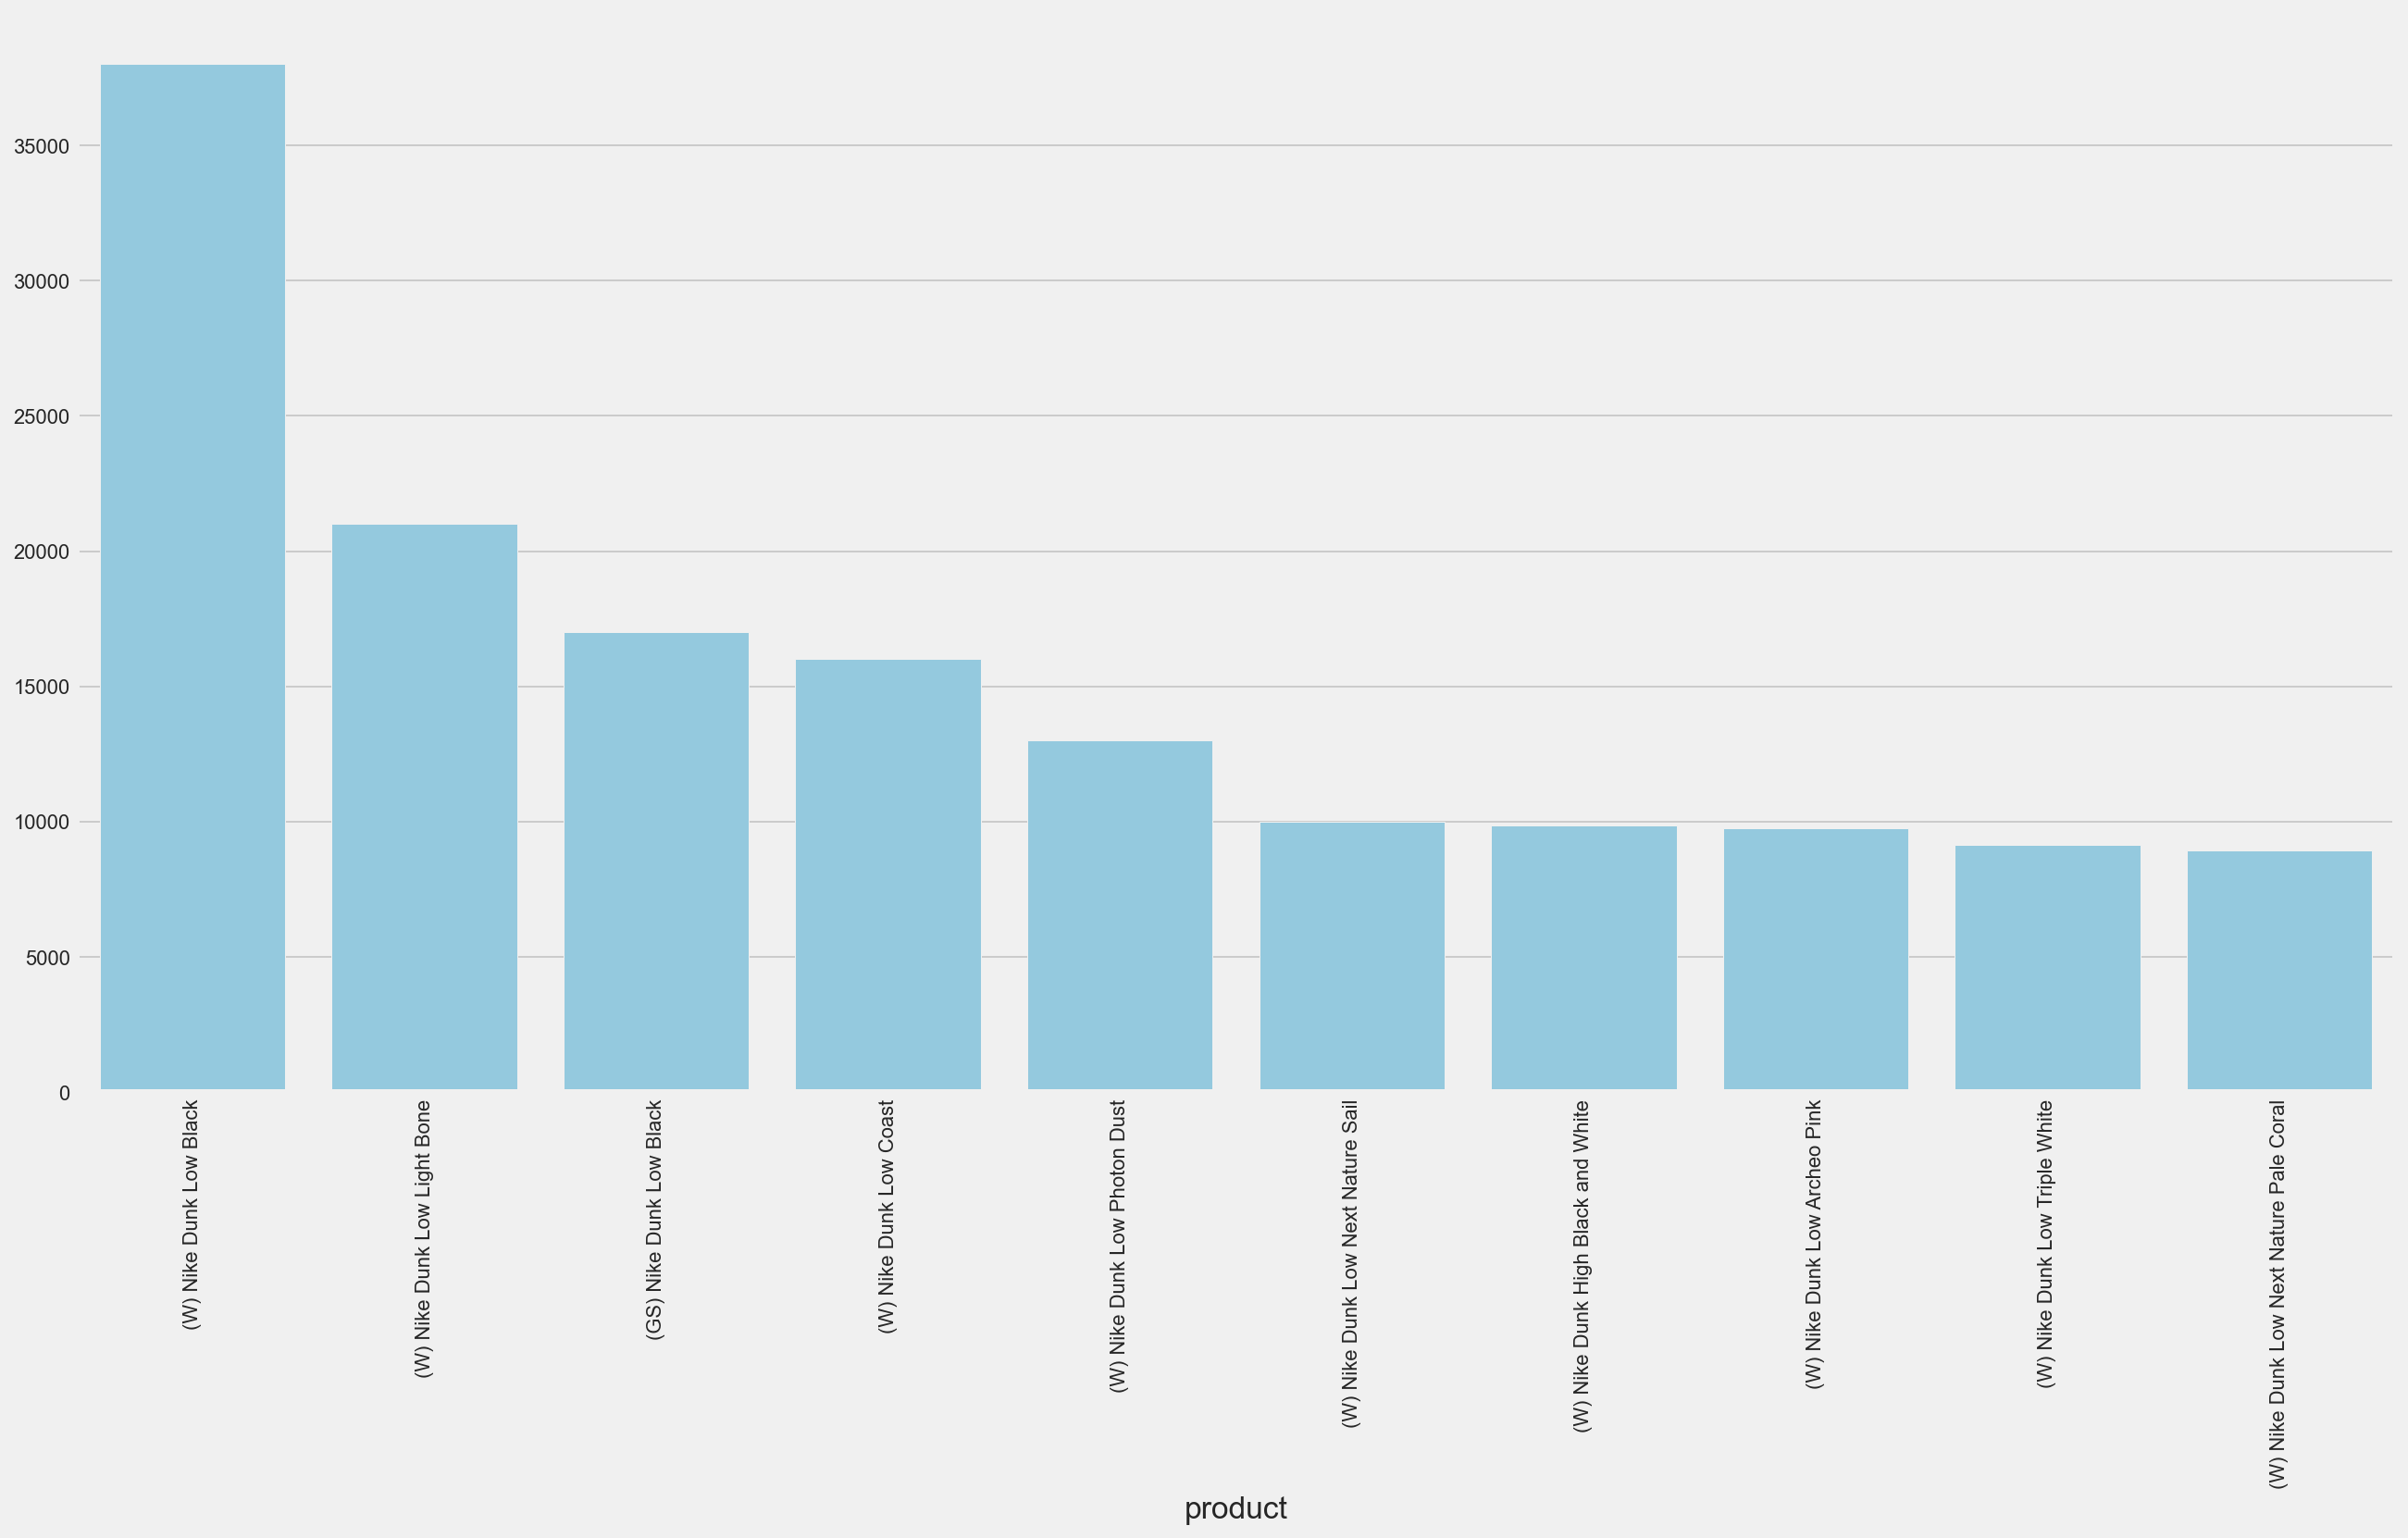

In [70]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.barplot(df_women.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).index,
            df_women.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).values , color = 'skyblue')
plt.xticks(rotation = 90 )
plt.show()